# <center><span style="color:Black; font-size:1.5em;"> Golden Delicious Apples  Regression 
</span>

Regression_AM3

<img src="https://producegeek.com/wp-content/uploads/2016/10/golden-delicious-apples-02.jpg" width="300" height="300" align="center"/>

## Overview

In this notebook, we illustrate the process involved in constructing an algorithm capabale of predicting the average price (in rands) of a kilogram Golden Delicious apples, given a number of attributes that describe the apples. Different regression algorithms are fit to the attributes in an attempt to find the model with best relative accuracy, and thus the model best suited for the task. The methods described aim to help the fresh produce industry optimise revenue, while reducing waste and adequately meeting consumer demand with each yield. 

## Context

### <center> EDSA Apple Prices Challenge

The Fresh Produce industry often need to figure out how much produce to source in order to maximise profits while maintaining customer satisfaction.  Fresh produce often does not have a long shelf life, hence it becomes very important for parties involved to correctly ascertain how much product needs to be available in stock, such that there is enough to meet demand, but not too much to risk spoilage - and customer dissatisfaction as a result - and ultimately wastage from having to discard of products which can no longer be sold, thus leading to a loss of profits. As a consequence the price at which a product is ultimately sold can change in response to conditions in a market.

Challenged by EDSA (Explore Data Science Academy), team **Regression_AM3** built a supervised machine learning model capable of predicting how much a kilogram of Golden Delicious apples will cost based off the province they were sourced from, the quality, and availability amongst other features. Supervised machine learning models, as we will come to learn, refer to models that improve automatically through experience. They are called "supervised", because they depend on some input to be able to produce a prediction.  

#### Problem Statement  
We aim to investigate how much of an effect, if any, the amount of stock on hand affects the price of a kilogram of apples.  We further aim to investigate how prices change during apple season compared to when they are out of season, does seasonality have an effect on the average price of a kilogram?  Other features investigated include source location, packaging, and overall quality.
Project overview found [here](https://www.kaggle.com/c/edsa-apple-prices-challenge/overview).


## Table of Contents  
<a id='toc'></a>
1. [Importing packages](#imp_pac)  


2. [Importing the data](#imp_dat)  
    
    
3. [Data description](#ddescribe)   
     
    
4. [Preprocessing](#the_prep)    
    4.1. Extra feature extraction  
    4.2. Data cleaning
    
    
5. [Exploratory data analysis](#eda)  
    5.1. General analysis  
    5.2. Target variable analysis  
    


6. [Feature extraction](#vect)  
    6.1.Commodities  
    6.2. Index 
    6.3. Date


7. [Model training](#train)  
    7.1. Stackingregressor with linear regression
    7.2. AdaBootsing with CatBoost
    7.3. ExtraTreesRegressor


8. [Evaluate model accuracy](#eval)  
    8.1. Make predictions  
    8.2 Kaggle scores


9. [Saving important data](#save)  
    9.1. Save the models  



10. [Conclusion](#conclude)


## 1. Installing Packages 
<a id='imp_pac'></a>
[Back to table of contents](#toc)

This notebook requires some packages that may not be installed on your local machine. Below we provide a list of packages to be installed (if they are not yet installed).  


In [199]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [218]:
# Import important base packages to load and perform mathematical transformations.
import pandas as pd 
import numpy as np
from scipy import stats

# Import packages used in data visualization.
import matplotlib.pyplot as plt
import seaborn as sns

# Import warning and display matplotlib in the notebook.
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Import packages used in data preprocessing. 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Import regression models
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR

# Import metrics used assessing model accuracy and performance.
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Packages for saving models
import pickle


## 2. Importing the data
<a id='imp_dat'></a>
[Back to table of contents](#toc)

In [201]:
# Import training dataset
df_train = pd.read_csv(r"C:\Users\Dineo\OneDrive\Documents\Coursework - Explore DataScience\Sprint 5 - May 2021\Predict\df-train_set.csv")

# Import testing dataset
df_test = pd.read_csv(r"C:\Users\Dineo\OneDrive\Documents\Coursework - Explore DataScience\Sprint 5 - May 2021\Predict\df-test_set.csv")

Using the head() method on our datasets we begin to get familiar with our data.

In [92]:
df_train.head() 

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


The training data appears to have more observations than what we are interested in, we will have to review that once we begin preprocessing our data

In [93]:
df_test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


## 3. Data Description
<a id='ddescribe'></a>
[Back to table of contents](#toc)

The original dataset consists of over 60 000 sales made by Durban Fresh Produce Market. For our purposes, we use a fraction of the data to predict the average price per kilogram of Golden Delicious apples. The training dataset consists of 13 columns, a description of each variable in the dataset is given below.  


### Training Set
**Variable definitions:**  

- **Province** - The province in which the produce was grown.
- **Container** - An object describing the code for the type of container used for holding or transporting the produce.      
- **Size_Grade** - The class of the produce according to their quality.
- **Weight_Kg** - The weight of the produce contained in kilograms.  
- **Commodities** - The different types of produce that can be bought and sold.  
- **Date** - The year, month, and day on which the sale was made.  
- **Low_Price** - The price where different produce they don't cost a lot of money.  
- **High_Price** - The price where different produce were expensive.  
- **Sales_Total** - The total sales price.  
- **Total_Qty_Sold** - Total number of produce sold.  
- **Total_Kg_Sold** - Total weight of produce sold in kilograms.  
- **Stock_On_Hand** - The total amount of produce in store.  
- **avg_price_per_kg** - The average price at which a kilogram of a given produce sells. 

### Testing Set  
The testing data column, **Commodities** is limited to Golden Delicious apples, while the column, **avg_price_per_kg**, our response variable has been removed to form an unseen test set. A column, index is also added to the testing set, which serves as the index when building the our submission file.


### Data Types 

Let's get quick a overview of the datasets we will be working with throughout the notebook. The output below contains the shape of the dataset, a list of all columns with their data types and the number of non-null values, if any, present in each column.  

**Train data** 

In [94]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


The train dataset has 64376 entries, contains no null entries, and has 3 data types for which 6 variables are of the type float, 2 are integers and and lastly 5 of them are objects.

**Test data** 

In [95]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           685 non-null    int64  
 1   Province        685 non-null    object 
 2   Container       685 non-null    object 
 3   Size_Grade      685 non-null    object 
 4   Weight_Kg       685 non-null    float64
 5   Commodities     685 non-null    object 
 6   Date            685 non-null    object 
 7   Low_Price       685 non-null    float64
 8   High_Price      685 non-null    float64
 9   Sales_Total     685 non-null    float64
 10  Total_Qty_Sold  685 non-null    int64  
 11  Total_Kg_Sold   685 non-null    float64
 12  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 69.7+ KB


The train dataset has 685 entries, contains no null entries, and have 3 data types for which 5 variables are of the type float, 3 are integers, and  lastly 5 of them are objects. 


## 4. Preprocessing
<a id='the_prep'></a>
[Back to table of contents](#toc)

As noted earlier, our training data lists many different types of produce under **Commodities**. Since it is Golden Delicious apples we are modelling, we will only select observations relating to them.

In [202]:
#Creating a new dataset containing only Golden Delicious apples.
df_trainset = df_train[df_train.Commodities == 'APPLE GOLDEN DELICIOUS']
df_trainset.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


### Extra Feature Extraction

The first feature we extract is the date the sale was made, where we set the **Date** column to `datetime`. We start by writing a function, (`to_season`), that takes the months of the year as input and return the corresponding southern hemisphere season, i.e. spring, summer, autumn, or winter. 

In [203]:
def month_to_season(month):
    """ A function that determines the corresponding southern hemisphere season to a given month of the year.

        Parameters
        ----------
        month: Month of the year, where 1 and 12 indicate January and December, respectively. Integer.

        Returns
        -------
        season:  String indicating the corresponding season.
    """
    if month >= 3 and month < 6: # if the month is either March, April or May the season is autumn.
        season = "Autumn"
        
    elif month >= 6 and month < 9: # if the month is either June, July or August the season is winter.
        season = "Winter"
        
    elif month >= 9 and month < 12: # if the month is either September, October or November the season is spring.
        season =  "Spring"
        
    else: # if none of the above conditions are met, the season is summer, for months January, February and December.
        season = 'Summer'
        
    return season # return the appropriate season as described above.

In [204]:
#Convert Date object in the training set to datetime.
import datetime #import datetime module.

df_trainset["Date"] = df_trainset["Date"].apply(pd.to_datetime)

In [205]:
#Adding new column, Season, to df_trainset.
df_trainset["Season"] = df_trainset["Date"].dt.month.map(month_to_season)

In [100]:
df_trainset.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Season
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,Spring
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,Autumn
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11,Autumn
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,Autumn
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50,Spring


### Data Cleaning

#### Remove Date and Commodities columns

In [206]:
train_df = df_trainset.drop(['Date','Commodities'], axis = 1) 
train_df.head()

,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Season
1,CAPE,M4183,1L,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,Spring
7,CAPE,JG110,2M,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,Autumn
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,Autumn
40,CAPE,M4183,1S,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,Autumn
69,EASTERN CAPE,IA400,1S,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,Spring


#### Seperate predictors from target variable (avg_price_per_kg)

In [102]:
y_train = train_df['avg_price_per_kg'] # target variable set to y_train.
X = train_df.drop('avg_price_per_kg', axis = 1) #we create a predictor variable dataframe by removing the target variable.

#### Encoding Categorical Variables

In order for us to be able to extract meaning from the categorical variables in our dataset we want to encode them such that each unique value within predictor variables is represented in it's own column, where '1' marks numerical variable observations matching the unique value. For this purpose we use `pd.get_dummies`. For each categorical variable we then drop one unique value columns so as to avoid the dummy trap, and in doing so reducing multicollinearity amongst variables.

In [207]:
X_train = pd.get_dummies(X, columns = ['Province', 'Container', 'Size_Grade', 'Season'], drop_first = True)

In [104]:
X_train.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,...,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_Spring,Season_Summer,Season_Winter
1,18.3,150.0,170.0,51710.0,332,6075.6,822,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,0,0,0,...,0,0,0,0,1,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [105]:
X_train.columns

Index(['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'Province_EASTERN CAPE',
       'Province_NATAL', 'Province_ORANGE FREE STATE', 'Province_TRANSVAAL',
       'Province_W.CAPE-BERGRIVER ETC', 'Province_WEST COAST',
       'Container_DT063', 'Container_EC120', 'Container_EF120',
       'Container_EG140', 'Container_IA400', 'Container_JE090',
       'Container_JG110', 'Container_M4183', 'Container_M6125',
       'Container_M9125', 'Size_Grade_1M', 'Size_Grade_1S', 'Size_Grade_1U',
       'Size_Grade_1X', 'Size_Grade_2L', 'Size_Grade_2M', 'Size_Grade_2S',
       'Size_Grade_2U', 'Size_Grade_2X', 'Season_Spring', 'Season_Summer',
       'Season_Winter'],
      dtype='object')

### Prepare Test Data

In [209]:
#Follow the same steps as was done for the train data.
df_test["Date"] = df_test["Date"].apply(pd.to_datetime) # we convert the Date column from dtype object to dtype datetime.

df_test["Season"] = df_test["Date"].dt.month.map(month_to_season) # using the get_season function we map the Date column to a column with the corresponding seasons.

df_test.drop(['Index','Commodities','Date'], axis = 1, inplace = True) # finally we drop the columns we no longer require. We drop index so as to avoid a mismatch between our training and testing data.

KeyError: 'Date'

In [184]:
# View the changes made to the test data set.
df_test.head()

,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Season
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,128.0,136.0,5008.0,38,456.0,0,Winter
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,220.0,220.0,1760.0,8,146.4,2,Summer
2,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,120.0,120.0,720.0,6,72.0,45,Winter
3,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,160.0,160.0,160.0,1,18.3,8,Autumn
4,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,140.0,160.0,14140.0,100,1830.0,19,Autumn


In [210]:
# Encode catergorical values within the test set.
X_test = pd.get_dummies(df_test, columns = ['Province', 'Container', 'Size_Grade', 'Season'], drop_first = True)

## 5. Exploratory Data Analysis
<a id='eda'></a>
[Back to table of contents](#toc)

### Objective:

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics. It is used to get context, understand data, variables and the relationships between them, and formulate hypotheses that could be useful when building predictive models.


### General Analysis

#### Missing Values

In the data description section we saw that the datasets had no missing values. For example, the train dataset has a total of **64376** rows, with an equal number of observations for each column.

We see then that imputation is not necessary for our data and can move on to the next step.

#### Duplicates

Another thing we need to look out for are duplicates. A large amount of duplicates in the data tend to increase the bias of the estimated coefficients and standard errors of the model.

In [211]:
#Checking duplicate rows
duplicate_rows_df_trainset = df_trainset[df_trainset.duplicated()]
print('number of duplicate rows:', duplicate_rows_df_trainset.shape)

number of duplicate rows: (0, 14)


The number of duplicated rows is empty, indicating that there are no repeated rows in the dataset  


### Target Variable Analysis

Our EDA objective as outlined in the previous step is to understand how the variables in the dataset relate to the average price per kilogram of the Golden Delicious apples. Before we do that we need to understand the target variable, (`avg_price_per_kg`)!

First thing to do is show the descriptive statistics.This allows us to get an understanding of the values this variable can take, as well as the distribution and dispersion.

The `describe()` method is used to calculate a statistical summary Series or DataFrame. By doing so we are trying to detect the outliers from the data and start selecting the limits and filtering them out.

In [111]:
# Get summary statistics for the Average Price Per Kg
df_trainset['avg_price_per_kg'].describe()

count    1952.000000
mean        6.778893
std         2.248744
min         0.250000
25%         5.460000
50%         6.670000
75%         8.280000
max        21.240000
Name: avg_price_per_kg, dtype: float64

### Descriptive Statistics 
- **Count** is the count of a given element in a list.
- **Mean** is the sum of data devided by the number of data points.
- **Standard deviation (std)** is the number that describes how spread out the data values are.
- **Minimum (min)** is the lowest value of the dataset.
- **Lower quartile (25%)** is the median of lower half of the dataset.
- **Median (50%)** is the middle value of a dataset.
- **Upper quartile (75%)** is the median of upper half of the dataset.
- **Maximum (max)** is the highest value of the dataset. 

From this we see that on average a kilogram of apples sells for R6.78, with a standard deviation of R2.25.The lowest price Golden Delicious apples have sold at in the dataset was R0.25 and the most expensive price was R21.24.

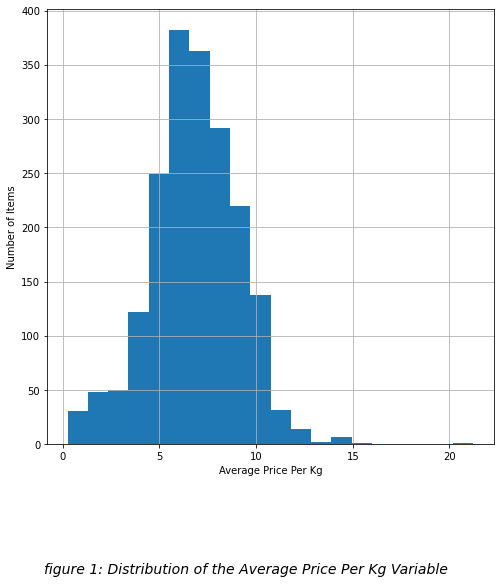

In [112]:
# Plot distribution of average price per kilogram using matplotlib
plt.figure(figsize=(8,8)) # draw the empty figure with its axis.

plt.hist(df_trainset['avg_price_per_kg'], bins = 20) # Add a histogram to the empty figure.
plt.xlabel('Average Price Per Kg') # Add a label to the x-axis
plt.ylabel('Number of Items') # Add a label to the y-axis
plt.grid(True) # Show a grid on the plot
plt.figtext(0.12, -0.1, 'figure 1: Distribution of the Average Price Per Kg Variable', horizontalalignment = 'left',fontsize = 14, style = 'italic') # Add a figure desciption
plt.show()

Taking a look at the histogram, we can see that very few Golden Delicious apples are priced below R2 per kg on average, most of the apples sold were priced between R6 and R7 per kg on average, and very few Golden Delicious apples sold for above R11 per kg on average.

###### Also taking a look at the distribution of Average Price, we can see that there is: 
- deviation from the normal distribution,
- an appreciable positive skewness and
- a slight heaviness in the tails.

We want to see how the distribution of the whole dataset compares to that of Average Price Per Kilogram so we evaluate the skewness and kurtosis of all the dimensions in the dataset.

In [113]:
df_trainset.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

All features in the dataset present with great kurtosis (>3 for the normal distribution), indicating that we have a lot of values which are further from the mean than normal in these features.
- Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.
- Kurtosis identifies whether the tails of a given distribution contain extreme values.

In [114]:
df_trainset.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

All features present a very large positive skew.
- Positive skew (or right-skew) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.

In [116]:
#Skewness and Kurtosis
print("Skewness: %f" % df_trainset['avg_price_per_kg'].skew())
print("Kurtosis: %f" % df_trainset['avg_price_per_kg'].kurt())

Skewness: 0.082452
Kurtosis: 1.042921


#### Density distribion of average price per kg
- Analysis of the skewness of target variable (`avg_price_per_kg`), shows that the distribution below has a moderate positive skew. 
- Analysis of the target variable kurtosis shows that the tails are slighlty heavier and the distribution is slighlty peaked than a normal distribution.

Both confirming what we saw in the histogram above.

### Analyzing Categorical Variables


We will only be working with some of the variables — let’s filter and store their names in two lists called `numerical` and `catagorical`, then redefine our `df_trainset` DataFrame to contain only these variables:


In [122]:
numerical = ['Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand', 'Weight_Kg']
catagorical = ['Container', 'Size_Grade', 'Province']

Categorical variables are those for which the values are labeled categories. The values, distribution, and dispersion of categorical variables are best understood with **bar plots**. Let’s analyze the (`Province`) variable. `seaborn` gives us a very simple method to show the counts of observations in each category: the `countplot`.


Text(0.12, -0.1, 'figure 3 :The bars in this plot represent the number of Apples produced for each province')

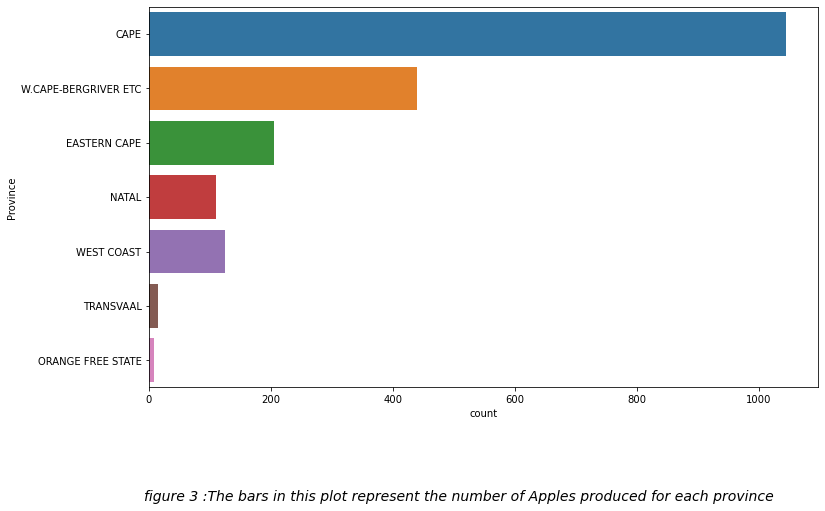

In [123]:
plt.figure(figsize = (12,7))
sns.countplot(y = 'Province', data = df_trainset)
plt.figtext(0.12, -0.1, 'figure 3 :The bars in this plot represent the number of Apples produced for each province', horizontalalignment = 'left',fontsize = 14, style = 'italic')


The `CAPE` is shown to be the largest producer of Golden Delicious apples in our dataset, while very few come from the `TRANSVAAL` and  the `ORANGE FREE STATE` provinces. An accurate representation of the South African market, as the Western Cape is by far South Africa's largest producer of apples due to temperate climate rightly suitable for orchards, while northern provinces tend to experience severe weather which is not suitable for apple growing.

Then we iterate over every categorical variable to create a countplot with seaborn:

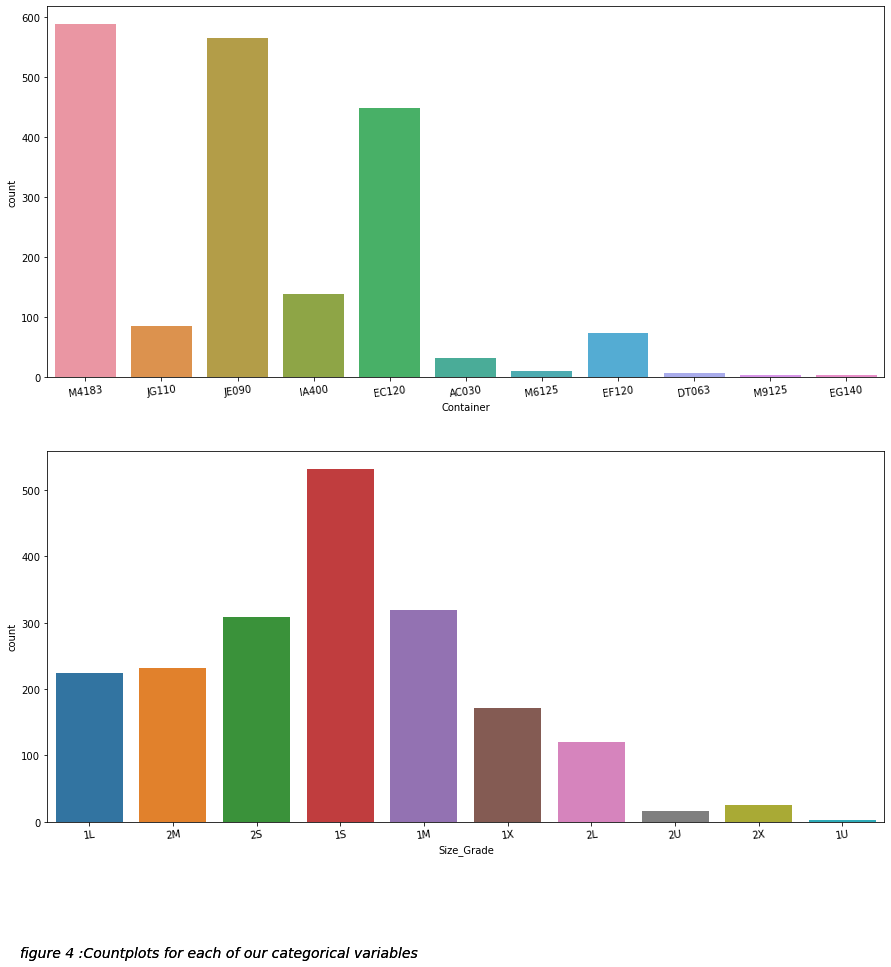

In [124]:
#Countplots for our categorical variables
fig, ax = plt.subplots(2, 1, figsize = (15, 15)) # Create an empty figure.
for variable, subplot in zip(catagorical, ax.flatten()):
    if variable != 'Province':
        sns.countplot(df_trainset[variable], ax=subplot)
        plt.figtext(0.10, -0.0, 'figure 4 :Countplots for each of our categorical variables', horizontalalignment = 'left', fontsize = 14, style = 'italic')
        for label in subplot.get_xticklabels():
            label.set_rotation(7)


Looking at the univariate analysis of the categorical data it appears there is not much to be gathered.  We see that `1S` **Size_Grade** is the most frequently occuring grade and `M4183` the most frequent **Container** code.  

### Analyzing Relationships Between Numerical and Categorical Variables


The box-and-whisker plot is commonly used for visualizing relationships between numerical variables and categorical variables, and **complex conditional plots** are used to visualize conditional relationships.


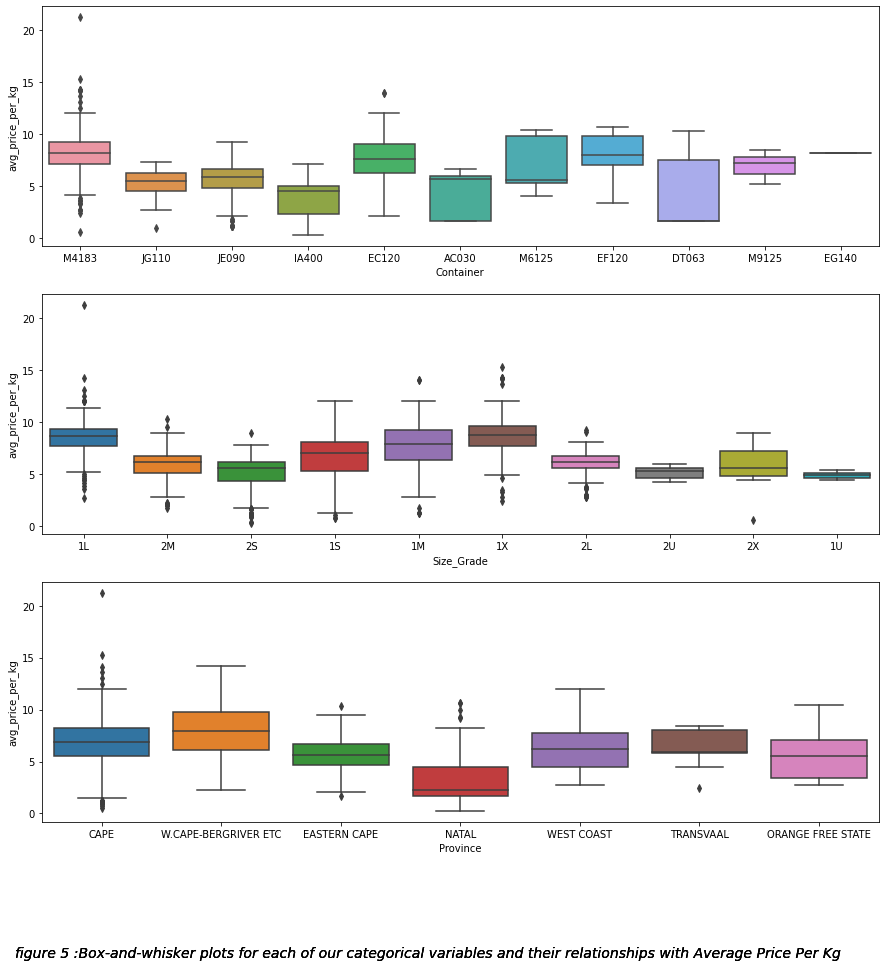

In [125]:
# plot the categorical features against the target variable.
fig, ax = plt.subplots(3, 1, figsize=(15, 15))# Create an empty figure with three rows and one column.
for var, subplot in zip(catagorical, ax.flatten()):
    sns.boxplot(x = var, y = 'avg_price_per_kg', data = df_trainset, ax = subplot) # on every figure plot a boxplot of caterogical values in each feature against avg_price_per_kg.
    plt.figtext(0.10, -0.0, 'figure 5 :Box-and-whisker plots for each of our categorical variables and their relationships with Average Price Per Kg', horizontalalignment = 'left', fontsize = 14, style = 'italic')


Here, we have iterated through every subplot to produce the visualization between all categorical variables and the avg_price_per_kg.

We can see that Apples produced from W.CAPE-BERGRIVER ETC province classification have a higher average price per kilogram than other province classifications, as do apples with M4183 container, and apples with 1L Size_grade. We can also see that there is significant difference variance in average price per Kilogram between apples with different all three categorical variables.


### Bivariate analysis

**Correlation Analysis** is statistical method that is used to discover if there is a relationship between two variables/ bivariet datasets, and how strong that relationship may be.


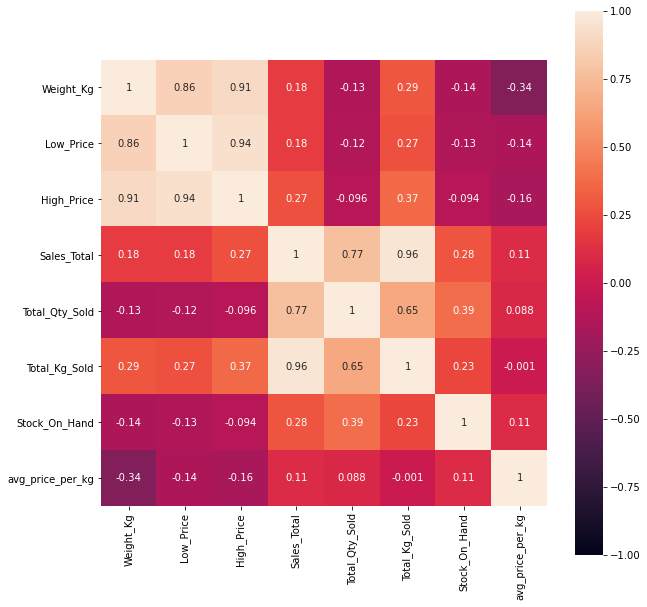

In [126]:
#Heat map for all numerical values in the dataset
f, ax = plt.subplots(figsize = (10, 10)) # plot an empty figure.
sns.heatmap(df_trainset.corr(), vmin = -1, vmax = 1, square = True, annot = True); # we add to the empty figure a correlation
#map between all numerical variables in our dataset.


Already we can see evidence of multicollinearity between some variables.  We would have to keep a watchful eye on these relationships.  None of the predictors have a relationship (positive or negative) with our response variable.  Perhaps once we deal with the outliers this will change.

Looking at the **Correlation coefficients** whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated. **Correlation coefficients** whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation. values from 0 to 0.25 or from 0 to -0.25 are commonly regarded to indicate the absence of correlation


## 6. Model training
<a id='train'></a>
[Back to table of contents](#toc)

Prior to making any predictions on average price we first have to train a set of models using known average prices as seen in training dataset. This way the model learns to recognize patterns and relationships between our predictor variables and the reponse variable average price per kilogram. We will look into three overall models use to fit the training data for future prediction. They are :

1. **StackingRegressor:**

    Meta Model:
    - LinearRegression 

    Base Learners:
    - RandomForestRegressor
    - Lasso
    - GradientBoostingRegressor
    - StochasticGradientBoostingRegressor
    
     
2. **AdaBoostingRegressor:**

    Base estimator:
    - CatBoostRegressor meta model
     
3. **ExtraTreesRegressor**



## A. Stacking Regressor

A stacking regressor describes an heterogeneous ensemble algorithm which uses a number of different 'weak learner' models, called meta learners in reducing the test error.  This model uses the trained meta learners, taking from each one the resulting predicting then produce a final prediction combines the strengths of the individual weak learners. 

In [212]:
SEED = 2 #we assign an arbitary number to SEED which will be used in hyperparameter tuning of our varibles.  This ensures that our results reproducible.
scaler = StandardScaler() # we assign our standardization function to scaler which we later use to transform our predictiors.

### Base Learners

#### 1. LASSO

##### The basic concept  
The “LASSO” stands for Least Absolute Shrinkage and Selection Operator. Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunken towards zero.  Lasso is a special regularization technique that allows for features to not only be shrunken towards zero but some of the features can equal zero exacly. And in so doing, Lasso has the ability to perform feature selection.

- **Pro:** As any regularization method, it can avoid overfitting
         - It can do feature selection.
         - It is fast in terms of inference and fitting.

- **Con:** The model selection result is not intuitive to interpret: for example, why does lasso select a feature?


In [141]:
#Lasso instantiation and training
lasso = Lasso(alpha = 0.001) # We set the penalty coefficent, which will determine how much shrinkage each variable gets in order to minimize outlier effects on the predicted function.
pipeline_lasso = Pipeline([('scaler', StandardScaler()), ('Lasso', lasso)]) #We create a pipeline which we will use to standardize our lasso function
model_lasso = pipeline_lasso.fit(X_train, y_train) #finally we fit the lasso model using our pipeline variable.

#### 2. RandomForestRegressor 

#### The basic concept  
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

- **Pro:** Robust to outliers.
- Works well with non-linear data.
- Lower risk of overfitting.

- **Con:** Random forests are found to be biased while dealing with categorical variables.


In [142]:
# We instantiate our random forest model by choosing the maximum number of nodes between the root and leaf nodes, the number of decision to be used, and a random_state.
rf = RandomForestRegressor(max_depth= 13, min_samples_leaf= 0.01, n_estimators= 100, n_jobs= -1, random_state= SEED) # n_jobs is set to negative one in order for our device to use as much processing power as it needs.
pipeline_rf = Pipeline([('scaler', StandardScaler()), ('rf', rf)]) #we use a pipeline for transforming our data.
model_rf = pipeline_rf.fit(X_train, y_train) #finally we train the random forest model

#### 3. GradientBoostRegressor

#### The basic concept  
Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. ... If a small change in the prediction for a case causes no change in error, then next target outcome of the case is zero.

- **Pro:** As an ensemble model, boosting comes with an easy to read and interpret algorithm, making its prediction interpretations easy to handle. The prediction capability is efficient through the use of its clone methods, such as bagging or random forest, and decision trees. Boosting is a resilient method that curbs over-fitting easily.


- **Con:** One disadvantage of boosting is that it is sensitive to outliers since every classifier is obliged to fix the errors in the predecessors. Thus, the method is too dependent on outliers. Another disadvantage is that the method is almost impossible to scale up. This is because every estimator bases its correctness on the previous predictors, thus making the procedure difficult to streamline.



In [146]:
# We instantiate the GradientBoosting model using much of the same hyperparameters as in random forest.
gbm = GradientBoostingRegressor(max_depth = 5, min_samples_leaf = 0.01, n_estimators = 900, random_state= SEED)
pipeline_gbm = Pipeline([('scaler', StandardScaler()), ('GBM', gbm)]) #create a transformation pipeline
model_gbm = pipeline_gbm.fit(X_train, y_train) #we train the model using out training data.

#### 4. Stochastic Gradient Boosting

Another form of boosting we will use is **Stochastic Gradient Boosting** which like it, learns from the mistakes of each homogeneous model fed into it, however unlike gradient boosting, stochastic gradient boosting only uses a subset of the data each time so as to reduce variance and avoid overfitting the training data.

In [147]:
# We instantiate it using much of the same hyperparameters  as gbm, however we also choose a subsample = 80% of the training data this is case and the maximum number of features that can be used.
sgbt = GradientBoostingRegressor(max_depth = 1, subsample = 0.8, max_features = 0.2, n_estimators = 100, random_state = SEED )
pipeline_sgb = Pipeline([('scaler', StandardScaler()), ('SGBT', sgbt)]) #create a pipeline for tranformation
model_sgb = pipeline_sgb.fit(X_train, y_train) #we train our model using our pipeline and training data.

### Meta Learner

We will now use a simple linear regression in order put together the final models which will be used on the testing data for the final prediction

In [148]:
# Import the model we need to stack our weak learner models.
from sklearn.ensemble import StackingRegressor

In [149]:
# Instantiate our linear regression model which serve as a final estimator
lm = LinearRegression()

In [150]:
models = [('Lasso',model_lasso),('RF', model_rf),('GB', model_gbm),('SG',model_sgb)]# we put together a list of tuples that will be used as the estimators in our final model.

s_reg = StackingRegressor(estimators=models, final_estimator=lm) #We instantiate the stacking regressor 

pipeline_meta = Pipeline([('scaler', StandardScaler()), ('Sred', s_reg)]) #we create a pipeline for data transformation.

meta_model = pipeline_meta.fit(X_train, y_train) #Using the pipeline we train our model on the training data.

y_pred = pipeline_meta.predict(X_test) #finally we use our test data set to make a prediction on X_test.

Kaggle Score sub: 0.44734

## Splitting the Data
<a id='eda'></a>
[Back to table of contents](#toc)

In order to train our next models, we decided to attempt a train test split which serves to create a validation set in between the model training and the model testing. 

In [213]:
X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, test_size = 0.25, random_state = SEED )

#### Standardizing Predictor Variables

When using models that are scaling variant and models that work by defeaning the weights of high variable coefficients, it is important that the predictor variables be represented on a similar scale such that each coefficient affects the model to a similar degree.  In this instance we standardize our predictor variables such that all the means are equal to zero and the standard deviations are equal to one.

In [220]:
# create scaled version of the predictors.
X_scaled = scaler.fit_transform(X_tr)

# create a dataframe of scaled X_tr
X_standardized = pd.DataFrame(X_scaled)
X_standardized.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.374103,-0.420452,-0.462131,-0.472906,-0.243474,-0.446640,-0.154851,-0.349055,-0.246718,-0.06415,...,-0.036986,-0.32131,-0.25289,-0.368462,-0.432837,-0.087009,-0.114668,-0.312172,-0.459258,1.152174
1,3.651242,4.305042,4.188276,-0.268949,-0.541319,-0.157288,-0.564775,-0.349055,-0.246718,-0.06415,...,-0.036986,-0.32131,-0.25289,-0.368462,2.310338,-0.087009,-0.114668,-0.312172,-0.459258,1.152174
2,-0.313267,-0.385998,-0.373016,-0.391065,-0.277961,-0.361366,-0.323980,-0.349055,-0.246718,-0.06415,...,-0.036986,-0.32131,-0.25289,-0.368462,2.310338,-0.087009,-0.114668,-0.312172,-0.459258,-0.867925
3,-0.218970,-0.094464,-0.173680,-0.339688,-0.403370,-0.345077,-0.437211,-0.349055,-0.246718,-0.06415,...,-0.036986,-0.32131,-0.25289,-0.368462,-0.432837,-0.087009,-0.114668,-0.312172,-0.459258,-0.867925
4,-0.313267,-0.412501,-0.455096,-0.506469,-0.494291,-0.467065,-0.581975,-0.349055,4.053217,-0.06415,...,-0.036986,-0.32131,-0.25289,-0.368462,2.310338,-0.087009,-0.114668,-0.312172,-0.459258,-0.867925


In [221]:
# Standardizing our predictor varibles once more. This time for the test data set.
scaler = StandardScaler() # Instantiate StandardScaler
X_scaledtest = scaler.fit_transform(X_te) # fit and transform predictor test data using the defined scaler.

# Convert the standardized predictor variable array to a dataframe so we can view it.
X_standardizetest = pd.DataFrame(X_scaledtest)
X_standardizetest.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.294014,-0.194412,-0.238896,-0.195984,-0.178064,-0.249716,-0.421268,-0.32646,-0.242009,-0.078648,...,0.0,-0.27366,-0.264906,-0.363663,-0.432837,-0.111571,-0.120636,-0.290593,2.007717,-0.826292
1,3.488930,1.741375,1.277147,-0.466748,-0.591748,-0.337899,-0.516424,-0.32646,4.132079,-0.078648,...,0.0,-0.27366,-0.264906,2.749801,-0.432837,-0.111571,-0.120636,-0.290593,-0.498078,1.210226
2,-0.323264,-0.305028,-0.331445,-0.503711,-0.591748,-0.454383,-0.506408,-0.32646,-0.242009,-0.078648,...,0.0,-0.27366,-0.264906,-0.363663,-0.432837,-0.111571,8.289408,-0.290593,-0.498078,1.210226
3,-0.232590,-0.028487,-0.133125,-0.390306,-0.493770,-0.378013,0.830781,-0.32646,-0.242009,-0.078648,...,0.0,-0.27366,-0.264906,-0.363663,-0.432837,-0.111571,-0.120636,-0.290593,-0.498078,-0.826292
4,-0.294014,-0.139104,-0.221267,-0.470771,-0.555460,-0.435615,-0.498895,-0.32646,-0.242009,-0.078648,...,0.0,-0.27366,-0.264906,-0.363663,-0.432837,-0.111571,-0.120636,-0.290593,-0.498078,1.210226


## B. AdaBoostRegressor with CatBoost

#### The basic concept  
An AdaBoost regressor. An AdaBoost [1] regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction.

- **Pro:** AdaBoost is like a boon to improve the accuracy of our classification algorithms if used accurately


In [223]:
# Instanstiate the model and assign a base eastimator.
cat = CatBoostRegressor()
ada = AdaBoostRegressor(base_estimator = cat)

# fit the model 
ada1= ada.fit(X_scaled, y_tr) # we fit out model on out training data.


Learning rate set to 0.04177
0:	learn: 2.1881650	total: 144ms	remaining: 2m 24s
1:	learn: 2.1288887	total: 146ms	remaining: 1m 12s
2:	learn: 2.0699950	total: 147ms	remaining: 48.9s
3:	learn: 2.0166084	total: 148ms	remaining: 37s
4:	learn: 1.9643104	total: 150ms	remaining: 29.8s
5:	learn: 1.9105648	total: 151ms	remaining: 25s
6:	learn: 1.8644152	total: 152ms	remaining: 21.6s
7:	learn: 1.8161650	total: 154ms	remaining: 19s
8:	learn: 1.7722456	total: 155ms	remaining: 17.1s
9:	learn: 1.7339905	total: 156ms	remaining: 15.5s
10:	learn: 1.6932175	total: 157ms	remaining: 14.2s
11:	learn: 1.6575621	total: 159ms	remaining: 13.1s
12:	learn: 1.6223391	total: 160ms	remaining: 12.1s
13:	learn: 1.5888535	total: 161ms	remaining: 11.3s
14:	learn: 1.5547171	total: 162ms	remaining: 10.7s
15:	learn: 1.5177252	total: 164ms	remaining: 10.1s
16:	learn: 1.4869741	total: 165ms	remaining: 9.54s
17:	learn: 1.4589676	total: 166ms	remaining: 9.07s
18:	learn: 1.4304769	total: 168ms	remaining: 8.65s
19:	learn: 1.406

169:	learn: 0.5095379	total: 339ms	remaining: 1.65s
170:	learn: 0.5074767	total: 341ms	remaining: 1.65s
171:	learn: 0.5065149	total: 342ms	remaining: 1.65s
172:	learn: 0.5042354	total: 343ms	remaining: 1.64s
173:	learn: 0.5025730	total: 344ms	remaining: 1.63s
174:	learn: 0.5015273	total: 345ms	remaining: 1.63s
175:	learn: 0.5002396	total: 347ms	remaining: 1.62s
176:	learn: 0.4985834	total: 348ms	remaining: 1.62s
177:	learn: 0.4974439	total: 349ms	remaining: 1.61s
178:	learn: 0.4963826	total: 350ms	remaining: 1.6s
179:	learn: 0.4946818	total: 351ms	remaining: 1.6s
180:	learn: 0.4933511	total: 352ms	remaining: 1.59s
181:	learn: 0.4926503	total: 354ms	remaining: 1.59s
182:	learn: 0.4920669	total: 355ms	remaining: 1.58s
183:	learn: 0.4915324	total: 356ms	remaining: 1.58s
184:	learn: 0.4905527	total: 357ms	remaining: 1.57s
185:	learn: 0.4888088	total: 358ms	remaining: 1.57s
186:	learn: 0.4884536	total: 360ms	remaining: 1.56s
187:	learn: 0.4871882	total: 361ms	remaining: 1.56s
188:	learn: 0.

454:	learn: 0.2969823	total: 658ms	remaining: 788ms
455:	learn: 0.2963680	total: 659ms	remaining: 787ms
456:	learn: 0.2957289	total: 660ms	remaining: 785ms
457:	learn: 0.2952704	total: 662ms	remaining: 783ms
458:	learn: 0.2948350	total: 663ms	remaining: 781ms
459:	learn: 0.2942011	total: 664ms	remaining: 779ms
460:	learn: 0.2939173	total: 665ms	remaining: 778ms
461:	learn: 0.2930769	total: 666ms	remaining: 776ms
462:	learn: 0.2928676	total: 668ms	remaining: 774ms
463:	learn: 0.2920685	total: 669ms	remaining: 773ms
464:	learn: 0.2916421	total: 670ms	remaining: 771ms
465:	learn: 0.2913078	total: 671ms	remaining: 769ms
466:	learn: 0.2907139	total: 672ms	remaining: 767ms
467:	learn: 0.2900090	total: 674ms	remaining: 766ms
468:	learn: 0.2893372	total: 675ms	remaining: 764ms
469:	learn: 0.2887744	total: 676ms	remaining: 763ms
470:	learn: 0.2881672	total: 677ms	remaining: 761ms
471:	learn: 0.2877465	total: 679ms	remaining: 759ms
472:	learn: 0.2876959	total: 680ms	remaining: 757ms
473:	learn: 

724:	learn: 0.2144114	total: 981ms	remaining: 372ms
725:	learn: 0.2143935	total: 982ms	remaining: 371ms
726:	learn: 0.2140682	total: 984ms	remaining: 369ms
727:	learn: 0.2139508	total: 985ms	remaining: 368ms
728:	learn: 0.2138756	total: 986ms	remaining: 367ms
729:	learn: 0.2138586	total: 987ms	remaining: 365ms
730:	learn: 0.2136649	total: 989ms	remaining: 364ms
731:	learn: 0.2134651	total: 990ms	remaining: 362ms
732:	learn: 0.2132239	total: 991ms	remaining: 361ms
733:	learn: 0.2130174	total: 992ms	remaining: 360ms
734:	learn: 0.2128583	total: 994ms	remaining: 358ms
735:	learn: 0.2125382	total: 995ms	remaining: 357ms
736:	learn: 0.2122244	total: 996ms	remaining: 356ms
737:	learn: 0.2120586	total: 998ms	remaining: 354ms
738:	learn: 0.2117448	total: 999ms	remaining: 353ms
739:	learn: 0.2117244	total: 1s	remaining: 352ms
740:	learn: 0.2116309	total: 1s	remaining: 350ms
741:	learn: 0.2116124	total: 1s	remaining: 349ms
742:	learn: 0.2111087	total: 1s	remaining: 347ms
743:	learn: 0.2108018	to

Learning rate set to 0.04177
0:	learn: 3.4095362	total: 1.52ms	remaining: 1.52s
1:	learn: 3.2995197	total: 2.72ms	remaining: 1.36s
2:	learn: 3.1922690	total: 3.87ms	remaining: 1.28s
3:	learn: 3.0898817	total: 4.98ms	remaining: 1.24s
4:	learn: 2.9903452	total: 6.09ms	remaining: 1.21s
5:	learn: 2.8980597	total: 7.34ms	remaining: 1.22s
6:	learn: 2.8092502	total: 8.6ms	remaining: 1.22s
7:	learn: 2.7214090	total: 9.83ms	remaining: 1.22s
8:	learn: 2.6406873	total: 11.1ms	remaining: 1.22s
9:	learn: 2.5587857	total: 12.7ms	remaining: 1.26s
10:	learn: 2.4807428	total: 14ms	remaining: 1.26s
11:	learn: 2.4109755	total: 15.1ms	remaining: 1.24s
12:	learn: 2.3404616	total: 16.1ms	remaining: 1.22s
13:	learn: 2.2764817	total: 17.1ms	remaining: 1.21s
14:	learn: 2.2108122	total: 18.3ms	remaining: 1.2s
15:	learn: 2.1591724	total: 19.4ms	remaining: 1.19s
16:	learn: 2.1047695	total: 20.5ms	remaining: 1.18s
17:	learn: 2.0507555	total: 21.5ms	remaining: 1.17s
18:	learn: 2.0132005	total: 22.5ms	remaining: 1.1

281:	learn: 0.3886691	total: 312ms	remaining: 795ms
282:	learn: 0.3875654	total: 314ms	remaining: 795ms
283:	learn: 0.3869538	total: 315ms	remaining: 794ms
284:	learn: 0.3866030	total: 316ms	remaining: 793ms
285:	learn: 0.3852030	total: 317ms	remaining: 792ms
286:	learn: 0.3848991	total: 318ms	remaining: 791ms
287:	learn: 0.3845147	total: 320ms	remaining: 790ms
288:	learn: 0.3832383	total: 321ms	remaining: 789ms
289:	learn: 0.3828505	total: 322ms	remaining: 788ms
290:	learn: 0.3824819	total: 323ms	remaining: 787ms
291:	learn: 0.3817521	total: 324ms	remaining: 786ms
292:	learn: 0.3810173	total: 325ms	remaining: 785ms
293:	learn: 0.3798736	total: 327ms	remaining: 784ms
294:	learn: 0.3785501	total: 328ms	remaining: 783ms
295:	learn: 0.3773649	total: 329ms	remaining: 782ms
296:	learn: 0.3763894	total: 330ms	remaining: 781ms
297:	learn: 0.3756848	total: 332ms	remaining: 781ms
298:	learn: 0.3746095	total: 333ms	remaining: 780ms
299:	learn: 0.3733212	total: 334ms	remaining: 779ms
300:	learn: 

579:	learn: 0.2385456	total: 640ms	remaining: 463ms
580:	learn: 0.2380176	total: 641ms	remaining: 462ms
581:	learn: 0.2375875	total: 642ms	remaining: 461ms
582:	learn: 0.2373866	total: 644ms	remaining: 460ms
583:	learn: 0.2370052	total: 645ms	remaining: 459ms
584:	learn: 0.2367433	total: 646ms	remaining: 459ms
585:	learn: 0.2363023	total: 648ms	remaining: 458ms
586:	learn: 0.2358948	total: 649ms	remaining: 457ms
587:	learn: 0.2356176	total: 651ms	remaining: 456ms
588:	learn: 0.2355052	total: 652ms	remaining: 455ms
589:	learn: 0.2351775	total: 653ms	remaining: 454ms
590:	learn: 0.2349577	total: 654ms	remaining: 453ms
591:	learn: 0.2346503	total: 655ms	remaining: 452ms
592:	learn: 0.2341999	total: 656ms	remaining: 450ms
593:	learn: 0.2339800	total: 657ms	remaining: 449ms
594:	learn: 0.2335724	total: 659ms	remaining: 448ms
595:	learn: 0.2332736	total: 660ms	remaining: 447ms
596:	learn: 0.2327016	total: 661ms	remaining: 446ms
597:	learn: 0.2322016	total: 662ms	remaining: 445ms
598:	learn: 

876:	learn: 0.1735612	total: 967ms	remaining: 136ms
877:	learn: 0.1734994	total: 969ms	remaining: 135ms
878:	learn: 0.1732520	total: 970ms	remaining: 133ms
879:	learn: 0.1730680	total: 971ms	remaining: 132ms
880:	learn: 0.1727760	total: 972ms	remaining: 131ms
881:	learn: 0.1725887	total: 973ms	remaining: 130ms
882:	learn: 0.1724055	total: 974ms	remaining: 129ms
883:	learn: 0.1722671	total: 975ms	remaining: 128ms
884:	learn: 0.1720066	total: 977ms	remaining: 127ms
885:	learn: 0.1718366	total: 978ms	remaining: 126ms
886:	learn: 0.1715611	total: 979ms	remaining: 125ms
887:	learn: 0.1715384	total: 980ms	remaining: 124ms
888:	learn: 0.1712928	total: 981ms	remaining: 123ms
889:	learn: 0.1710408	total: 982ms	remaining: 121ms
890:	learn: 0.1709773	total: 984ms	remaining: 120ms
891:	learn: 0.1707626	total: 985ms	remaining: 119ms
892:	learn: 0.1707155	total: 986ms	remaining: 118ms
893:	learn: 0.1705052	total: 1s	remaining: 119ms
894:	learn: 0.1702634	total: 1s	remaining: 118ms
895:	learn: 0.1701

140:	learn: 0.6578079	total: 158ms	remaining: 964ms
141:	learn: 0.6562656	total: 159ms	remaining: 963ms
142:	learn: 0.6547126	total: 160ms	remaining: 961ms
143:	learn: 0.6520243	total: 161ms	remaining: 960ms
144:	learn: 0.6475070	total: 163ms	remaining: 960ms
145:	learn: 0.6452191	total: 164ms	remaining: 958ms
146:	learn: 0.6422835	total: 165ms	remaining: 956ms
147:	learn: 0.6401168	total: 166ms	remaining: 955ms
148:	learn: 0.6381630	total: 167ms	remaining: 953ms
149:	learn: 0.6360224	total: 168ms	remaining: 951ms
150:	learn: 0.6324759	total: 169ms	remaining: 951ms
151:	learn: 0.6285883	total: 170ms	remaining: 950ms
152:	learn: 0.6270899	total: 171ms	remaining: 949ms
153:	learn: 0.6245734	total: 172ms	remaining: 947ms
154:	learn: 0.6225107	total: 174ms	remaining: 946ms
155:	learn: 0.6204060	total: 175ms	remaining: 947ms
156:	learn: 0.6181662	total: 176ms	remaining: 946ms
157:	learn: 0.6160625	total: 177ms	remaining: 945ms
158:	learn: 0.6144087	total: 178ms	remaining: 944ms
159:	learn: 

431:	learn: 0.3162437	total: 481ms	remaining: 632ms
432:	learn: 0.3154241	total: 482ms	remaining: 631ms
433:	learn: 0.3152753	total: 483ms	remaining: 630ms
434:	learn: 0.3143527	total: 484ms	remaining: 629ms
435:	learn: 0.3138425	total: 485ms	remaining: 628ms
436:	learn: 0.3135220	total: 486ms	remaining: 627ms
437:	learn: 0.3131224	total: 488ms	remaining: 626ms
438:	learn: 0.3124893	total: 489ms	remaining: 624ms
439:	learn: 0.3120249	total: 490ms	remaining: 623ms
440:	learn: 0.3106493	total: 491ms	remaining: 622ms
441:	learn: 0.3099291	total: 492ms	remaining: 621ms
442:	learn: 0.3095866	total: 493ms	remaining: 620ms
443:	learn: 0.3087363	total: 494ms	remaining: 619ms
444:	learn: 0.3083294	total: 495ms	remaining: 618ms
445:	learn: 0.3077074	total: 496ms	remaining: 617ms
446:	learn: 0.3074855	total: 498ms	remaining: 616ms
447:	learn: 0.3071669	total: 499ms	remaining: 615ms
448:	learn: 0.3069429	total: 500ms	remaining: 614ms
449:	learn: 0.3064000	total: 501ms	remaining: 613ms
450:	learn: 

742:	learn: 0.1929570	total: 809ms	remaining: 280ms
743:	learn: 0.1926677	total: 810ms	remaining: 279ms
744:	learn: 0.1923461	total: 811ms	remaining: 278ms
745:	learn: 0.1920858	total: 813ms	remaining: 277ms
746:	learn: 0.1917437	total: 814ms	remaining: 276ms
747:	learn: 0.1915093	total: 815ms	remaining: 274ms
748:	learn: 0.1913194	total: 816ms	remaining: 273ms
749:	learn: 0.1909618	total: 817ms	remaining: 272ms
750:	learn: 0.1906572	total: 818ms	remaining: 271ms
751:	learn: 0.1904403	total: 819ms	remaining: 270ms
752:	learn: 0.1901831	total: 820ms	remaining: 269ms
753:	learn: 0.1898295	total: 821ms	remaining: 268ms
754:	learn: 0.1896273	total: 822ms	remaining: 267ms
755:	learn: 0.1894133	total: 824ms	remaining: 266ms
756:	learn: 0.1890667	total: 825ms	remaining: 265ms
757:	learn: 0.1887058	total: 826ms	remaining: 264ms
758:	learn: 0.1886834	total: 826ms	remaining: 262ms
759:	learn: 0.1885043	total: 827ms	remaining: 261ms
760:	learn: 0.1882835	total: 829ms	remaining: 260ms
761:	learn: 

10:	learn: 2.2664696	total: 12.4ms	remaining: 1.11s
11:	learn: 2.2111632	total: 13.6ms	remaining: 1.12s
12:	learn: 2.1629720	total: 14.7ms	remaining: 1.12s
13:	learn: 2.1117290	total: 15.8ms	remaining: 1.12s
14:	learn: 2.0665169	total: 17.2ms	remaining: 1.13s
15:	learn: 2.0181775	total: 18.4ms	remaining: 1.13s
16:	learn: 1.9689859	total: 19.5ms	remaining: 1.13s
17:	learn: 1.9352357	total: 20.7ms	remaining: 1.13s
18:	learn: 1.8912519	total: 21.7ms	remaining: 1.12s
19:	learn: 1.8506057	total: 23.1ms	remaining: 1.13s
20:	learn: 1.8116613	total: 24.2ms	remaining: 1.13s
21:	learn: 1.7716146	total: 25.3ms	remaining: 1.12s
22:	learn: 1.7370929	total: 26.4ms	remaining: 1.12s
23:	learn: 1.7035247	total: 27.5ms	remaining: 1.12s
24:	learn: 1.6694319	total: 28.9ms	remaining: 1.13s
25:	learn: 1.6382825	total: 30ms	remaining: 1.12s
26:	learn: 1.6072379	total: 31.1ms	remaining: 1.12s
27:	learn: 1.5844419	total: 32.3ms	remaining: 1.12s
28:	learn: 1.5551438	total: 33.3ms	remaining: 1.11s
29:	learn: 1.5

294:	learn: 0.4156425	total: 341ms	remaining: 814ms
295:	learn: 0.4139724	total: 342ms	remaining: 813ms
296:	learn: 0.4135768	total: 343ms	remaining: 811ms
297:	learn: 0.4118298	total: 344ms	remaining: 811ms
298:	learn: 0.4112243	total: 345ms	remaining: 809ms
299:	learn: 0.4100837	total: 346ms	remaining: 808ms
300:	learn: 0.4091554	total: 347ms	remaining: 806ms
301:	learn: 0.4088974	total: 348ms	remaining: 805ms
302:	learn: 0.4077093	total: 349ms	remaining: 803ms
303:	learn: 0.4061938	total: 350ms	remaining: 802ms
304:	learn: 0.4049026	total: 351ms	remaining: 801ms
305:	learn: 0.4035191	total: 352ms	remaining: 799ms
306:	learn: 0.4025286	total: 353ms	remaining: 798ms
307:	learn: 0.4014515	total: 355ms	remaining: 797ms
308:	learn: 0.4011698	total: 356ms	remaining: 796ms
309:	learn: 0.3998928	total: 357ms	remaining: 794ms
310:	learn: 0.3985949	total: 358ms	remaining: 793ms
311:	learn: 0.3975032	total: 359ms	remaining: 792ms
312:	learn: 0.3964350	total: 360ms	remaining: 791ms
313:	learn: 

598:	learn: 0.2380095	total: 668ms	remaining: 447ms
599:	learn: 0.2378948	total: 669ms	remaining: 446ms
600:	learn: 0.2374693	total: 670ms	remaining: 445ms
601:	learn: 0.2370118	total: 672ms	remaining: 444ms
602:	learn: 0.2365185	total: 673ms	remaining: 443ms
603:	learn: 0.2360073	total: 674ms	remaining: 442ms
604:	learn: 0.2356870	total: 675ms	remaining: 441ms
605:	learn: 0.2353709	total: 676ms	remaining: 440ms
606:	learn: 0.2348557	total: 677ms	remaining: 438ms
607:	learn: 0.2343433	total: 678ms	remaining: 437ms
608:	learn: 0.2340677	total: 679ms	remaining: 436ms
609:	learn: 0.2335911	total: 680ms	remaining: 435ms
610:	learn: 0.2332412	total: 682ms	remaining: 434ms
611:	learn: 0.2331022	total: 683ms	remaining: 433ms
612:	learn: 0.2328526	total: 684ms	remaining: 432ms
613:	learn: 0.2323999	total: 685ms	remaining: 431ms
614:	learn: 0.2319966	total: 686ms	remaining: 430ms
615:	learn: 0.2315816	total: 687ms	remaining: 428ms
616:	learn: 0.2313761	total: 688ms	remaining: 427ms
617:	learn: 

914:	learn: 0.1640838	total: 998ms	remaining: 92.7ms
915:	learn: 0.1639103	total: 999ms	remaining: 91.6ms
916:	learn: 0.1639050	total: 1s	remaining: 90.5ms
917:	learn: 0.1635590	total: 1s	remaining: 89.4ms
918:	learn: 0.1635546	total: 1s	remaining: 88.4ms
919:	learn: 0.1632824	total: 1s	remaining: 87.3ms
920:	learn: 0.1630588	total: 1s	remaining: 86.2ms
921:	learn: 0.1630428	total: 1s	remaining: 85.1ms
922:	learn: 0.1628660	total: 1.01s	remaining: 84ms
923:	learn: 0.1625569	total: 1.01s	remaining: 82.9ms
924:	learn: 0.1625463	total: 1.01s	remaining: 81.8ms
925:	learn: 0.1622842	total: 1.01s	remaining: 80.7ms
926:	learn: 0.1621349	total: 1.01s	remaining: 79.6ms
927:	learn: 0.1619005	total: 1.01s	remaining: 78.5ms
928:	learn: 0.1618752	total: 1.01s	remaining: 77.4ms
929:	learn: 0.1616557	total: 1.01s	remaining: 76.4ms
930:	learn: 0.1614859	total: 1.01s	remaining: 75.3ms
931:	learn: 0.1613134	total: 1.02s	remaining: 74.2ms
932:	learn: 0.1613097	total: 1.02s	remaining: 73.1ms
933:	learn: 0

174:	learn: 0.6220382	total: 189ms	remaining: 891ms
175:	learn: 0.6200591	total: 190ms	remaining: 891ms
176:	learn: 0.6185001	total: 191ms	remaining: 890ms
177:	learn: 0.6171224	total: 193ms	remaining: 889ms
178:	learn: 0.6164888	total: 193ms	remaining: 887ms
179:	learn: 0.6153977	total: 194ms	remaining: 886ms
180:	learn: 0.6123097	total: 195ms	remaining: 885ms
181:	learn: 0.6108939	total: 197ms	remaining: 884ms
182:	learn: 0.6095000	total: 198ms	remaining: 883ms
183:	learn: 0.6082151	total: 199ms	remaining: 882ms
184:	learn: 0.6063856	total: 200ms	remaining: 881ms
185:	learn: 0.6056925	total: 201ms	remaining: 880ms
186:	learn: 0.6033126	total: 202ms	remaining: 879ms
187:	learn: 0.6015367	total: 203ms	remaining: 878ms
188:	learn: 0.6005381	total: 204ms	remaining: 877ms
189:	learn: 0.5997960	total: 206ms	remaining: 877ms
190:	learn: 0.5976607	total: 207ms	remaining: 876ms
191:	learn: 0.5968191	total: 208ms	remaining: 874ms
192:	learn: 0.5927356	total: 210ms	remaining: 876ms
193:	learn: 

333:	learn: 0.4146339	total: 354ms	remaining: 705ms
334:	learn: 0.4135287	total: 355ms	remaining: 705ms
335:	learn: 0.4117363	total: 356ms	remaining: 704ms
336:	learn: 0.4106587	total: 357ms	remaining: 703ms
337:	learn: 0.4101506	total: 359ms	remaining: 702ms
338:	learn: 0.4089956	total: 360ms	remaining: 702ms
339:	learn: 0.4077947	total: 361ms	remaining: 701ms
340:	learn: 0.4073185	total: 362ms	remaining: 700ms
341:	learn: 0.4063260	total: 363ms	remaining: 699ms
342:	learn: 0.4055442	total: 364ms	remaining: 698ms
343:	learn: 0.4048436	total: 366ms	remaining: 697ms
344:	learn: 0.4034206	total: 367ms	remaining: 696ms
345:	learn: 0.4016124	total: 368ms	remaining: 695ms
346:	learn: 0.4009568	total: 369ms	remaining: 694ms
347:	learn: 0.4003421	total: 370ms	remaining: 693ms
348:	learn: 0.3990981	total: 371ms	remaining: 692ms
349:	learn: 0.3987291	total: 372ms	remaining: 691ms
350:	learn: 0.3974018	total: 373ms	remaining: 690ms
351:	learn: 0.3969584	total: 374ms	remaining: 689ms
352:	learn: 

635:	learn: 0.2487697	total: 682ms	remaining: 390ms
636:	learn: 0.2483485	total: 683ms	remaining: 389ms
637:	learn: 0.2479049	total: 684ms	remaining: 388ms
638:	learn: 0.2475078	total: 686ms	remaining: 387ms
639:	learn: 0.2470774	total: 687ms	remaining: 386ms
640:	learn: 0.2470015	total: 688ms	remaining: 385ms
641:	learn: 0.2468089	total: 689ms	remaining: 384ms
642:	learn: 0.2463907	total: 690ms	remaining: 383ms
643:	learn: 0.2462932	total: 691ms	remaining: 382ms
644:	learn: 0.2461469	total: 692ms	remaining: 381ms
645:	learn: 0.2457870	total: 694ms	remaining: 380ms
646:	learn: 0.2456337	total: 695ms	remaining: 379ms
647:	learn: 0.2454786	total: 696ms	remaining: 378ms
648:	learn: 0.2451783	total: 697ms	remaining: 377ms
649:	learn: 0.2449554	total: 698ms	remaining: 376ms
650:	learn: 0.2446799	total: 699ms	remaining: 375ms
651:	learn: 0.2443115	total: 700ms	remaining: 374ms
652:	learn: 0.2439213	total: 702ms	remaining: 373ms
653:	learn: 0.2436363	total: 703ms	remaining: 372ms
654:	learn: 

927:	learn: 0.1742877	total: 1.01s	remaining: 78.2ms
928:	learn: 0.1740643	total: 1.01s	remaining: 77.1ms
929:	learn: 0.1737776	total: 1.01s	remaining: 76.1ms
930:	learn: 0.1736017	total: 1.01s	remaining: 75ms
931:	learn: 0.1733918	total: 1.01s	remaining: 73.9ms
932:	learn: 0.1732386	total: 1.01s	remaining: 72.8ms
933:	learn: 0.1728970	total: 1.01s	remaining: 71.7ms
934:	learn: 0.1726157	total: 1.02s	remaining: 70.6ms
935:	learn: 0.1723325	total: 1.02s	remaining: 69.6ms
936:	learn: 0.1722007	total: 1.02s	remaining: 68.5ms
937:	learn: 0.1719837	total: 1.02s	remaining: 67.4ms
938:	learn: 0.1717263	total: 1.02s	remaining: 66.3ms
939:	learn: 0.1714822	total: 1.02s	remaining: 65.2ms
940:	learn: 0.1713008	total: 1.02s	remaining: 64.2ms
941:	learn: 0.1711453	total: 1.02s	remaining: 63.1ms
942:	learn: 0.1708878	total: 1.02s	remaining: 62ms
943:	learn: 0.1707286	total: 1.03s	remaining: 60.9ms
944:	learn: 0.1707106	total: 1.03s	remaining: 59.8ms
945:	learn: 0.1704487	total: 1.03s	remaining: 58.8

176:	learn: 0.5994795	total: 199ms	remaining: 924ms
177:	learn: 0.5979950	total: 200ms	remaining: 924ms
178:	learn: 0.5963896	total: 201ms	remaining: 922ms
179:	learn: 0.5945709	total: 202ms	remaining: 921ms
180:	learn: 0.5930814	total: 203ms	remaining: 919ms
181:	learn: 0.5916156	total: 205ms	remaining: 919ms
182:	learn: 0.5899467	total: 206ms	remaining: 919ms
183:	learn: 0.5881408	total: 207ms	remaining: 917ms
184:	learn: 0.5863451	total: 208ms	remaining: 916ms
185:	learn: 0.5854985	total: 209ms	remaining: 915ms
186:	learn: 0.5847279	total: 210ms	remaining: 913ms
187:	learn: 0.5836410	total: 211ms	remaining: 913ms
188:	learn: 0.5822616	total: 212ms	remaining: 912ms
189:	learn: 0.5812838	total: 214ms	remaining: 910ms
190:	learn: 0.5801651	total: 215ms	remaining: 909ms
191:	learn: 0.5769765	total: 216ms	remaining: 908ms
192:	learn: 0.5754774	total: 217ms	remaining: 907ms
193:	learn: 0.5739993	total: 218ms	remaining: 907ms
194:	learn: 0.5725079	total: 219ms	remaining: 906ms
195:	learn: 

457:	learn: 0.3103985	total: 522ms	remaining: 617ms
458:	learn: 0.3096484	total: 523ms	remaining: 616ms
459:	learn: 0.3090019	total: 524ms	remaining: 616ms
460:	learn: 0.3087204	total: 526ms	remaining: 615ms
461:	learn: 0.3081561	total: 527ms	remaining: 614ms
462:	learn: 0.3075855	total: 528ms	remaining: 613ms
463:	learn: 0.3072418	total: 530ms	remaining: 612ms
464:	learn: 0.3064849	total: 531ms	remaining: 611ms
465:	learn: 0.3054387	total: 533ms	remaining: 610ms
466:	learn: 0.3051085	total: 534ms	remaining: 609ms
467:	learn: 0.3042648	total: 535ms	remaining: 608ms
468:	learn: 0.3037413	total: 537ms	remaining: 608ms
469:	learn: 0.3030878	total: 538ms	remaining: 607ms
470:	learn: 0.3025323	total: 539ms	remaining: 606ms
471:	learn: 0.3022733	total: 541ms	remaining: 605ms
472:	learn: 0.3016100	total: 542ms	remaining: 604ms
473:	learn: 0.3011841	total: 543ms	remaining: 603ms
474:	learn: 0.3007869	total: 545ms	remaining: 602ms
475:	learn: 0.3001278	total: 546ms	remaining: 601ms
476:	learn: 

727:	learn: 0.2081920	total: 853ms	remaining: 319ms
728:	learn: 0.2078818	total: 855ms	remaining: 318ms
729:	learn: 0.2076267	total: 856ms	remaining: 317ms
730:	learn: 0.2073488	total: 857ms	remaining: 315ms
731:	learn: 0.2069990	total: 858ms	remaining: 314ms
732:	learn: 0.2065676	total: 859ms	remaining: 313ms
733:	learn: 0.2063171	total: 860ms	remaining: 312ms
734:	learn: 0.2061218	total: 861ms	remaining: 311ms
735:	learn: 0.2056773	total: 862ms	remaining: 309ms
736:	learn: 0.2052667	total: 863ms	remaining: 308ms
737:	learn: 0.2051105	total: 864ms	remaining: 307ms
738:	learn: 0.2049133	total: 866ms	remaining: 306ms
739:	learn: 0.2046872	total: 867ms	remaining: 305ms
740:	learn: 0.2045533	total: 868ms	remaining: 303ms
741:	learn: 0.2040950	total: 869ms	remaining: 302ms
742:	learn: 0.2038147	total: 870ms	remaining: 301ms
743:	learn: 0.2033523	total: 871ms	remaining: 300ms
744:	learn: 0.2030815	total: 872ms	remaining: 299ms
745:	learn: 0.2027960	total: 873ms	remaining: 297ms
746:	learn: 

Learning rate set to 0.04177
0:	learn: 2.9955093	total: 1.58ms	remaining: 1.57s
1:	learn: 2.9131072	total: 2.92ms	remaining: 1.46s
2:	learn: 2.8331542	total: 4.12ms	remaining: 1.37s
3:	learn: 2.7605662	total: 5.4ms	remaining: 1.34s
4:	learn: 2.6933101	total: 6.77ms	remaining: 1.35s
5:	learn: 2.6232387	total: 8.03ms	remaining: 1.33s
6:	learn: 2.5700221	total: 9.34ms	remaining: 1.32s
7:	learn: 2.5028452	total: 10.7ms	remaining: 1.33s
8:	learn: 2.4452303	total: 11.9ms	remaining: 1.31s
9:	learn: 2.3902719	total: 13.2ms	remaining: 1.31s
10:	learn: 2.3351496	total: 14.4ms	remaining: 1.29s
11:	learn: 2.2765354	total: 15.8ms	remaining: 1.3s
12:	learn: 2.2232044	total: 16.9ms	remaining: 1.29s
13:	learn: 2.1708247	total: 18.1ms	remaining: 1.27s
14:	learn: 2.1233282	total: 19.2ms	remaining: 1.26s
15:	learn: 2.0755094	total: 20.5ms	remaining: 1.26s
16:	learn: 2.0343075	total: 21.8ms	remaining: 1.26s
17:	learn: 1.9968435	total: 23ms	remaining: 1.25s
18:	learn: 1.9606653	total: 24ms	remaining: 1.24s

270:	learn: 0.4608845	total: 313ms	remaining: 843ms
271:	learn: 0.4590888	total: 315ms	remaining: 842ms
272:	learn: 0.4587214	total: 316ms	remaining: 841ms
273:	learn: 0.4575221	total: 317ms	remaining: 840ms
274:	learn: 0.4564023	total: 318ms	remaining: 839ms
275:	learn: 0.4538010	total: 319ms	remaining: 838ms
276:	learn: 0.4526496	total: 321ms	remaining: 837ms
277:	learn: 0.4521206	total: 322ms	remaining: 836ms
278:	learn: 0.4513045	total: 323ms	remaining: 835ms
279:	learn: 0.4504766	total: 324ms	remaining: 834ms
280:	learn: 0.4494070	total: 326ms	remaining: 834ms
281:	learn: 0.4471489	total: 327ms	remaining: 833ms
282:	learn: 0.4465790	total: 328ms	remaining: 832ms
283:	learn: 0.4460345	total: 329ms	remaining: 831ms
284:	learn: 0.4441981	total: 331ms	remaining: 829ms
285:	learn: 0.4429068	total: 332ms	remaining: 829ms
286:	learn: 0.4414235	total: 334ms	remaining: 829ms
287:	learn: 0.4405632	total: 335ms	remaining: 828ms
288:	learn: 0.4400028	total: 336ms	remaining: 827ms
289:	learn: 

516:	learn: 0.2643743	total: 628ms	remaining: 587ms
517:	learn: 0.2640338	total: 629ms	remaining: 586ms
518:	learn: 0.2635663	total: 630ms	remaining: 584ms
519:	learn: 0.2630022	total: 632ms	remaining: 583ms
520:	learn: 0.2623861	total: 633ms	remaining: 582ms
521:	learn: 0.2619741	total: 634ms	remaining: 581ms
522:	learn: 0.2614930	total: 635ms	remaining: 580ms
523:	learn: 0.2608523	total: 637ms	remaining: 578ms
524:	learn: 0.2602597	total: 638ms	remaining: 577ms
525:	learn: 0.2599153	total: 639ms	remaining: 576ms
526:	learn: 0.2593292	total: 640ms	remaining: 575ms
527:	learn: 0.2585472	total: 641ms	remaining: 573ms
528:	learn: 0.2581599	total: 643ms	remaining: 572ms
529:	learn: 0.2578660	total: 644ms	remaining: 571ms
530:	learn: 0.2572275	total: 645ms	remaining: 570ms
531:	learn: 0.2568890	total: 646ms	remaining: 569ms
532:	learn: 0.2564062	total: 648ms	remaining: 567ms
533:	learn: 0.2559487	total: 649ms	remaining: 566ms
534:	learn: 0.2553695	total: 650ms	remaining: 565ms
535:	learn: 

798:	learn: 0.1749134	total: 953ms	remaining: 240ms
799:	learn: 0.1747673	total: 954ms	remaining: 238ms
800:	learn: 0.1745498	total: 955ms	remaining: 237ms
801:	learn: 0.1743392	total: 956ms	remaining: 236ms
802:	learn: 0.1742326	total: 958ms	remaining: 235ms
803:	learn: 0.1739598	total: 959ms	remaining: 234ms
804:	learn: 0.1737645	total: 960ms	remaining: 233ms
805:	learn: 0.1735276	total: 961ms	remaining: 231ms
806:	learn: 0.1732618	total: 962ms	remaining: 230ms
807:	learn: 0.1731688	total: 963ms	remaining: 229ms
808:	learn: 0.1729832	total: 965ms	remaining: 228ms
809:	learn: 0.1727680	total: 966ms	remaining: 227ms
810:	learn: 0.1725750	total: 967ms	remaining: 225ms
811:	learn: 0.1724604	total: 968ms	remaining: 224ms
812:	learn: 0.1723780	total: 969ms	remaining: 223ms
813:	learn: 0.1722997	total: 971ms	remaining: 222ms
814:	learn: 0.1720197	total: 972ms	remaining: 221ms
815:	learn: 0.1718807	total: 973ms	remaining: 219ms
816:	learn: 0.1718300	total: 974ms	remaining: 218ms
817:	learn: 

46:	learn: 1.3349958	total: 54.7ms	remaining: 1.11s
47:	learn: 1.3176272	total: 56.1ms	remaining: 1.11s
48:	learn: 1.3095709	total: 57.3ms	remaining: 1.11s
49:	learn: 1.2930226	total: 58.5ms	remaining: 1.11s
50:	learn: 1.2784390	total: 59.8ms	remaining: 1.11s
51:	learn: 1.2671407	total: 61ms	remaining: 1.11s
52:	learn: 1.2565377	total: 62.3ms	remaining: 1.11s
53:	learn: 1.2496694	total: 63.5ms	remaining: 1.11s
54:	learn: 1.2313889	total: 64.8ms	remaining: 1.11s
55:	learn: 1.2199398	total: 66ms	remaining: 1.11s
56:	learn: 1.2100345	total: 67.2ms	remaining: 1.11s
57:	learn: 1.2030148	total: 68.5ms	remaining: 1.11s
58:	learn: 1.1947609	total: 69.7ms	remaining: 1.11s
59:	learn: 1.1883774	total: 71ms	remaining: 1.11s
60:	learn: 1.1769370	total: 72.3ms	remaining: 1.11s
61:	learn: 1.1631463	total: 73.6ms	remaining: 1.11s
62:	learn: 1.1523971	total: 75ms	remaining: 1.12s
63:	learn: 1.1452510	total: 76.4ms	remaining: 1.12s
64:	learn: 1.1385160	total: 77.5ms	remaining: 1.11s
65:	learn: 1.1314846

319:	learn: 0.3988973	total: 381ms	remaining: 809ms
320:	learn: 0.3983533	total: 382ms	remaining: 808ms
321:	learn: 0.3974305	total: 383ms	remaining: 807ms
322:	learn: 0.3964505	total: 384ms	remaining: 806ms
323:	learn: 0.3954469	total: 386ms	remaining: 805ms
324:	learn: 0.3947922	total: 387ms	remaining: 803ms
325:	learn: 0.3938893	total: 388ms	remaining: 802ms
326:	learn: 0.3934600	total: 389ms	remaining: 801ms
327:	learn: 0.3929714	total: 391ms	remaining: 800ms
328:	learn: 0.3913086	total: 392ms	remaining: 799ms
329:	learn: 0.3903842	total: 393ms	remaining: 798ms
330:	learn: 0.3894693	total: 394ms	remaining: 797ms
331:	learn: 0.3883841	total: 396ms	remaining: 796ms
332:	learn: 0.3876720	total: 397ms	remaining: 795ms
333:	learn: 0.3860042	total: 398ms	remaining: 794ms
334:	learn: 0.3852286	total: 400ms	remaining: 793ms
335:	learn: 0.3838303	total: 401ms	remaining: 792ms
336:	learn: 0.3821456	total: 402ms	remaining: 791ms
337:	learn: 0.3804783	total: 403ms	remaining: 790ms
338:	learn: 

605:	learn: 0.2288950	total: 705ms	remaining: 459ms
606:	learn: 0.2284512	total: 706ms	remaining: 457ms
607:	learn: 0.2283842	total: 708ms	remaining: 456ms
608:	learn: 0.2281252	total: 709ms	remaining: 455ms
609:	learn: 0.2276350	total: 710ms	remaining: 454ms
610:	learn: 0.2273529	total: 711ms	remaining: 453ms
611:	learn: 0.2269917	total: 712ms	remaining: 451ms
612:	learn: 0.2269637	total: 713ms	remaining: 450ms
613:	learn: 0.2266137	total: 714ms	remaining: 449ms
614:	learn: 0.2259886	total: 715ms	remaining: 448ms
615:	learn: 0.2256282	total: 717ms	remaining: 447ms
616:	learn: 0.2254225	total: 718ms	remaining: 446ms
617:	learn: 0.2250288	total: 719ms	remaining: 444ms
618:	learn: 0.2243605	total: 720ms	remaining: 443ms
619:	learn: 0.2240526	total: 721ms	remaining: 442ms
620:	learn: 0.2235913	total: 722ms	remaining: 441ms
621:	learn: 0.2231831	total: 724ms	remaining: 440ms
622:	learn: 0.2227757	total: 725ms	remaining: 439ms
623:	learn: 0.2224694	total: 726ms	remaining: 437ms
624:	learn: 

912:	learn: 0.1523563	total: 1.03s	remaining: 98.6ms
913:	learn: 0.1521713	total: 1.04s	remaining: 97.5ms
914:	learn: 0.1520724	total: 1.04s	remaining: 96.4ms
915:	learn: 0.1518868	total: 1.04s	remaining: 95.3ms
916:	learn: 0.1517928	total: 1.04s	remaining: 94.1ms
917:	learn: 0.1516255	total: 1.04s	remaining: 93ms
918:	learn: 0.1514495	total: 1.04s	remaining: 91.8ms
919:	learn: 0.1513790	total: 1.04s	remaining: 90.7ms
920:	learn: 0.1511160	total: 1.04s	remaining: 89.5ms
921:	learn: 0.1509120	total: 1.04s	remaining: 88.4ms
922:	learn: 0.1507859	total: 1.05s	remaining: 87.3ms
923:	learn: 0.1507713	total: 1.05s	remaining: 86.1ms
924:	learn: 0.1505812	total: 1.05s	remaining: 85ms
925:	learn: 0.1503268	total: 1.05s	remaining: 83.9ms
926:	learn: 0.1500615	total: 1.05s	remaining: 82.7ms
927:	learn: 0.1498661	total: 1.05s	remaining: 81.6ms
928:	learn: 0.1498011	total: 1.05s	remaining: 80.5ms
929:	learn: 0.1496566	total: 1.05s	remaining: 79.3ms
930:	learn: 0.1493791	total: 1.05s	remaining: 78.2

138:	learn: 0.7461509	total: 180ms	remaining: 1.11s
139:	learn: 0.7426778	total: 181ms	remaining: 1.11s
140:	learn: 0.7403757	total: 183ms	remaining: 1.11s
141:	learn: 0.7378487	total: 185ms	remaining: 1.11s
142:	learn: 0.7368072	total: 186ms	remaining: 1.11s
143:	learn: 0.7342939	total: 188ms	remaining: 1.12s
144:	learn: 0.7306478	total: 189ms	remaining: 1.12s
145:	learn: 0.7277713	total: 191ms	remaining: 1.12s
146:	learn: 0.7259540	total: 192ms	remaining: 1.12s
147:	learn: 0.7228264	total: 194ms	remaining: 1.11s
148:	learn: 0.7194851	total: 195ms	remaining: 1.11s
149:	learn: 0.7172985	total: 197ms	remaining: 1.11s
150:	learn: 0.7148528	total: 198ms	remaining: 1.11s
151:	learn: 0.7106226	total: 199ms	remaining: 1.11s
152:	learn: 0.7090982	total: 201ms	remaining: 1.11s
153:	learn: 0.7052815	total: 202ms	remaining: 1.11s
154:	learn: 0.7040113	total: 203ms	remaining: 1.11s
155:	learn: 0.6991800	total: 205ms	remaining: 1.11s
156:	learn: 0.6975690	total: 206ms	remaining: 1.1s
157:	learn: 0

401:	learn: 0.3467987	total: 506ms	remaining: 752ms
402:	learn: 0.3459215	total: 507ms	remaining: 751ms
403:	learn: 0.3449943	total: 508ms	remaining: 750ms
404:	learn: 0.3446694	total: 509ms	remaining: 748ms
405:	learn: 0.3439055	total: 510ms	remaining: 746ms
406:	learn: 0.3428529	total: 511ms	remaining: 745ms
407:	learn: 0.3424534	total: 513ms	remaining: 744ms
408:	learn: 0.3421638	total: 514ms	remaining: 742ms
409:	learn: 0.3414028	total: 515ms	remaining: 741ms
410:	learn: 0.3402793	total: 516ms	remaining: 739ms
411:	learn: 0.3394812	total: 517ms	remaining: 738ms
412:	learn: 0.3384474	total: 518ms	remaining: 736ms
413:	learn: 0.3377265	total: 519ms	remaining: 735ms
414:	learn: 0.3369693	total: 520ms	remaining: 733ms
415:	learn: 0.3369126	total: 521ms	remaining: 731ms
416:	learn: 0.3362347	total: 522ms	remaining: 730ms
417:	learn: 0.3354667	total: 523ms	remaining: 728ms
418:	learn: 0.3344423	total: 525ms	remaining: 728ms
419:	learn: 0.3336867	total: 526ms	remaining: 726ms
420:	learn: 

718:	learn: 0.2092934	total: 834ms	remaining: 326ms
719:	learn: 0.2091559	total: 835ms	remaining: 325ms
720:	learn: 0.2088980	total: 836ms	remaining: 324ms
721:	learn: 0.2086757	total: 837ms	remaining: 322ms
722:	learn: 0.2083144	total: 839ms	remaining: 321ms
723:	learn: 0.2079289	total: 840ms	remaining: 320ms
724:	learn: 0.2076404	total: 841ms	remaining: 319ms
725:	learn: 0.2072971	total: 842ms	remaining: 318ms
726:	learn: 0.2070287	total: 843ms	remaining: 317ms
727:	learn: 0.2068147	total: 845ms	remaining: 316ms
728:	learn: 0.2067558	total: 846ms	remaining: 314ms
729:	learn: 0.2063418	total: 847ms	remaining: 313ms
730:	learn: 0.2063258	total: 848ms	remaining: 312ms
731:	learn: 0.2059668	total: 849ms	remaining: 311ms
732:	learn: 0.2058437	total: 851ms	remaining: 310ms
733:	learn: 0.2056596	total: 852ms	remaining: 309ms
734:	learn: 0.2051142	total: 853ms	remaining: 308ms
735:	learn: 0.2050783	total: 854ms	remaining: 306ms
736:	learn: 0.2046292	total: 855ms	remaining: 305ms
737:	learn: 

0:	learn: 2.6482349	total: 1.63ms	remaining: 1.63s
1:	learn: 2.5858189	total: 2.93ms	remaining: 1.46s
2:	learn: 2.5299966	total: 4.08ms	remaining: 1.36s
3:	learn: 2.4711498	total: 5.24ms	remaining: 1.3s
4:	learn: 2.4202848	total: 6.56ms	remaining: 1.3s
5:	learn: 2.3678764	total: 7.83ms	remaining: 1.3s
6:	learn: 2.3187000	total: 8.98ms	remaining: 1.27s
7:	learn: 2.2712924	total: 10.1ms	remaining: 1.26s
8:	learn: 2.2277397	total: 11.5ms	remaining: 1.26s
9:	learn: 2.1846753	total: 12.6ms	remaining: 1.25s
10:	learn: 2.1433432	total: 13.8ms	remaining: 1.24s
11:	learn: 2.0979156	total: 14.9ms	remaining: 1.23s
12:	learn: 2.0621880	total: 16ms	remaining: 1.21s
13:	learn: 2.0259353	total: 17.2ms	remaining: 1.21s
14:	learn: 1.9923338	total: 18.6ms	remaining: 1.22s
15:	learn: 1.9590169	total: 20ms	remaining: 1.23s
16:	learn: 1.9259299	total: 21.4ms	remaining: 1.24s
17:	learn: 1.8949179	total: 22.5ms	remaining: 1.23s
18:	learn: 1.8614138	total: 23.7ms	remaining: 1.22s
19:	learn: 1.8331002	total: 2

291:	learn: 0.4644364	total: 319ms	remaining: 772ms
292:	learn: 0.4626584	total: 320ms	remaining: 771ms
293:	learn: 0.4607520	total: 321ms	remaining: 771ms
294:	learn: 0.4603106	total: 322ms	remaining: 769ms
295:	learn: 0.4599833	total: 323ms	remaining: 768ms
296:	learn: 0.4584611	total: 324ms	remaining: 768ms
297:	learn: 0.4576422	total: 326ms	remaining: 767ms
298:	learn: 0.4562876	total: 327ms	remaining: 766ms
299:	learn: 0.4560113	total: 328ms	remaining: 765ms
300:	learn: 0.4546817	total: 329ms	remaining: 764ms
301:	learn: 0.4540033	total: 330ms	remaining: 763ms
302:	learn: 0.4527916	total: 331ms	remaining: 762ms
303:	learn: 0.4517914	total: 332ms	remaining: 761ms
304:	learn: 0.4513253	total: 333ms	remaining: 759ms
305:	learn: 0.4502166	total: 334ms	remaining: 759ms
306:	learn: 0.4493089	total: 336ms	remaining: 758ms
307:	learn: 0.4473907	total: 337ms	remaining: 757ms
308:	learn: 0.4471383	total: 338ms	remaining: 756ms
309:	learn: 0.4450680	total: 339ms	remaining: 755ms
310:	learn: 

600:	learn: 0.2341094	total: 648ms	remaining: 430ms
601:	learn: 0.2335388	total: 649ms	remaining: 429ms
602:	learn: 0.2332252	total: 650ms	remaining: 428ms
603:	learn: 0.2329060	total: 652ms	remaining: 427ms
604:	learn: 0.2326375	total: 653ms	remaining: 426ms
605:	learn: 0.2323547	total: 654ms	remaining: 425ms
606:	learn: 0.2319722	total: 655ms	remaining: 424ms
607:	learn: 0.2319045	total: 656ms	remaining: 423ms
608:	learn: 0.2314350	total: 657ms	remaining: 422ms
609:	learn: 0.2311989	total: 658ms	remaining: 421ms
610:	learn: 0.2307262	total: 659ms	remaining: 420ms
611:	learn: 0.2301270	total: 661ms	remaining: 419ms
612:	learn: 0.2297452	total: 662ms	remaining: 418ms
613:	learn: 0.2292380	total: 663ms	remaining: 417ms
614:	learn: 0.2289314	total: 664ms	remaining: 416ms
615:	learn: 0.2284982	total: 665ms	remaining: 415ms
616:	learn: 0.2284358	total: 666ms	remaining: 414ms
617:	learn: 0.2279759	total: 667ms	remaining: 413ms
618:	learn: 0.2274786	total: 669ms	remaining: 412ms
619:	learn: 

905:	learn: 0.1499374	total: 976ms	remaining: 101ms
906:	learn: 0.1497346	total: 977ms	remaining: 100ms
907:	learn: 0.1496063	total: 978ms	remaining: 99.1ms
908:	learn: 0.1494333	total: 979ms	remaining: 98ms
909:	learn: 0.1492760	total: 981ms	remaining: 97ms
910:	learn: 0.1490566	total: 982ms	remaining: 95.9ms
911:	learn: 0.1489569	total: 983ms	remaining: 94.8ms
912:	learn: 0.1489338	total: 984ms	remaining: 93.8ms
913:	learn: 0.1486552	total: 985ms	remaining: 92.7ms
914:	learn: 0.1483556	total: 986ms	remaining: 91.6ms
915:	learn: 0.1481239	total: 987ms	remaining: 90.5ms
916:	learn: 0.1481016	total: 989ms	remaining: 89.5ms
917:	learn: 0.1478809	total: 990ms	remaining: 88.4ms
918:	learn: 0.1476688	total: 991ms	remaining: 87.4ms
919:	learn: 0.1474004	total: 992ms	remaining: 86.3ms
920:	learn: 0.1473671	total: 993ms	remaining: 85.2ms
921:	learn: 0.1471745	total: 995ms	remaining: 84.1ms
922:	learn: 0.1470847	total: 996ms	remaining: 83.1ms
923:	learn: 0.1470527	total: 997ms	remaining: 82ms
9

165:	learn: 0.6617255	total: 176ms	remaining: 884ms
166:	learn: 0.6593049	total: 177ms	remaining: 884ms
167:	learn: 0.6577528	total: 178ms	remaining: 883ms
168:	learn: 0.6556220	total: 179ms	remaining: 882ms
169:	learn: 0.6544401	total: 181ms	remaining: 882ms
170:	learn: 0.6533442	total: 182ms	remaining: 881ms
171:	learn: 0.6514330	total: 183ms	remaining: 880ms
172:	learn: 0.6492781	total: 184ms	remaining: 879ms
173:	learn: 0.6476161	total: 185ms	remaining: 878ms
174:	learn: 0.6457027	total: 186ms	remaining: 877ms
175:	learn: 0.6442254	total: 187ms	remaining: 877ms
176:	learn: 0.6414564	total: 188ms	remaining: 876ms
177:	learn: 0.6387098	total: 189ms	remaining: 875ms
178:	learn: 0.6369950	total: 191ms	remaining: 874ms
179:	learn: 0.6342014	total: 192ms	remaining: 873ms
180:	learn: 0.6308622	total: 193ms	remaining: 873ms
181:	learn: 0.6281505	total: 194ms	remaining: 872ms
182:	learn: 0.6258549	total: 195ms	remaining: 871ms
183:	learn: 0.6245423	total: 196ms	remaining: 870ms
184:	learn: 

324:	learn: 0.4146803	total: 341ms	remaining: 708ms
325:	learn: 0.4139034	total: 342ms	remaining: 707ms
326:	learn: 0.4129233	total: 343ms	remaining: 706ms
327:	learn: 0.4122040	total: 344ms	remaining: 705ms
328:	learn: 0.4106440	total: 345ms	remaining: 704ms
329:	learn: 0.4091473	total: 346ms	remaining: 703ms
330:	learn: 0.4080033	total: 348ms	remaining: 702ms
331:	learn: 0.4070732	total: 349ms	remaining: 702ms
332:	learn: 0.4060109	total: 350ms	remaining: 701ms
333:	learn: 0.4050534	total: 351ms	remaining: 700ms
334:	learn: 0.4036918	total: 352ms	remaining: 699ms
335:	learn: 0.4029576	total: 353ms	remaining: 698ms
336:	learn: 0.4021513	total: 354ms	remaining: 697ms
337:	learn: 0.4006552	total: 355ms	remaining: 696ms
338:	learn: 0.4001645	total: 356ms	remaining: 695ms
339:	learn: 0.3987165	total: 358ms	remaining: 694ms
340:	learn: 0.3979326	total: 359ms	remaining: 693ms
341:	learn: 0.3972723	total: 360ms	remaining: 692ms
342:	learn: 0.3958830	total: 361ms	remaining: 691ms
343:	learn: 

635:	learn: 0.2258917	total: 669ms	remaining: 383ms
636:	learn: 0.2255899	total: 671ms	remaining: 382ms
637:	learn: 0.2254473	total: 672ms	remaining: 381ms
638:	learn: 0.2251220	total: 673ms	remaining: 380ms
639:	learn: 0.2247611	total: 674ms	remaining: 379ms
640:	learn: 0.2243516	total: 675ms	remaining: 378ms
641:	learn: 0.2240767	total: 677ms	remaining: 377ms
642:	learn: 0.2236058	total: 678ms	remaining: 376ms
643:	learn: 0.2232191	total: 679ms	remaining: 375ms
644:	learn: 0.2227156	total: 680ms	remaining: 374ms
645:	learn: 0.2223158	total: 681ms	remaining: 373ms
646:	learn: 0.2219485	total: 683ms	remaining: 372ms
647:	learn: 0.2218550	total: 684ms	remaining: 371ms
648:	learn: 0.2215221	total: 685ms	remaining: 370ms
649:	learn: 0.2212845	total: 686ms	remaining: 369ms
650:	learn: 0.2207711	total: 687ms	remaining: 368ms
651:	learn: 0.2204741	total: 689ms	remaining: 368ms
652:	learn: 0.2200887	total: 690ms	remaining: 367ms
653:	learn: 0.2198371	total: 692ms	remaining: 366ms
654:	learn: 

929:	learn: 0.1538576	total: 998ms	remaining: 75.1ms
930:	learn: 0.1536537	total: 1000ms	remaining: 74.1ms
931:	learn: 0.1536400	total: 1s	remaining: 73ms
932:	learn: 0.1533484	total: 1s	remaining: 71.9ms
933:	learn: 0.1533070	total: 1s	remaining: 70.9ms
934:	learn: 0.1531180	total: 1s	remaining: 69.8ms
935:	learn: 0.1528900	total: 1s	remaining: 68.7ms
936:	learn: 0.1526769	total: 1.01s	remaining: 67.7ms
937:	learn: 0.1524796	total: 1.01s	remaining: 66.6ms
938:	learn: 0.1524658	total: 1.01s	remaining: 65.5ms
939:	learn: 0.1522734	total: 1.01s	remaining: 64.4ms
940:	learn: 0.1520162	total: 1.01s	remaining: 63.4ms
941:	learn: 0.1517916	total: 1.01s	remaining: 62.3ms
942:	learn: 0.1515010	total: 1.01s	remaining: 61.2ms
943:	learn: 0.1512741	total: 1.01s	remaining: 60.2ms
944:	learn: 0.1511074	total: 1.01s	remaining: 59.1ms
945:	learn: 0.1509383	total: 1.02s	remaining: 58ms
946:	learn: 0.1508040	total: 1.02s	remaining: 57ms
947:	learn: 0.1505925	total: 1.02s	remaining: 55.9ms
948:	learn: 0

171:	learn: 0.6559843	total: 199ms	remaining: 960ms
172:	learn: 0.6523907	total: 201ms	remaining: 959ms
173:	learn: 0.6488298	total: 202ms	remaining: 957ms
174:	learn: 0.6467805	total: 203ms	remaining: 956ms
175:	learn: 0.6457627	total: 204ms	remaining: 955ms
176:	learn: 0.6440914	total: 205ms	remaining: 953ms
177:	learn: 0.6422890	total: 206ms	remaining: 952ms
178:	learn: 0.6384901	total: 207ms	remaining: 950ms
179:	learn: 0.6364184	total: 208ms	remaining: 948ms
180:	learn: 0.6346917	total: 209ms	remaining: 947ms
181:	learn: 0.6328514	total: 210ms	remaining: 946ms
182:	learn: 0.6307758	total: 212ms	remaining: 944ms
183:	learn: 0.6283827	total: 213ms	remaining: 943ms
184:	learn: 0.6267168	total: 214ms	remaining: 942ms
185:	learn: 0.6248642	total: 215ms	remaining: 940ms
186:	learn: 0.6218333	total: 216ms	remaining: 939ms
187:	learn: 0.6199625	total: 217ms	remaining: 938ms
188:	learn: 0.6184592	total: 219ms	remaining: 938ms
189:	learn: 0.6159194	total: 220ms	remaining: 936ms
190:	learn: 

476:	learn: 0.2865837	total: 528ms	remaining: 579ms
477:	learn: 0.2858685	total: 529ms	remaining: 578ms
478:	learn: 0.2850877	total: 530ms	remaining: 576ms
479:	learn: 0.2844928	total: 531ms	remaining: 575ms
480:	learn: 0.2842657	total: 532ms	remaining: 574ms
481:	learn: 0.2837700	total: 533ms	remaining: 573ms
482:	learn: 0.2833057	total: 534ms	remaining: 572ms
483:	learn: 0.2828620	total: 535ms	remaining: 571ms
484:	learn: 0.2819834	total: 537ms	remaining: 570ms
485:	learn: 0.2809991	total: 538ms	remaining: 569ms
486:	learn: 0.2806311	total: 539ms	remaining: 567ms
487:	learn: 0.2799154	total: 540ms	remaining: 566ms
488:	learn: 0.2792196	total: 541ms	remaining: 565ms
489:	learn: 0.2784116	total: 542ms	remaining: 564ms
490:	learn: 0.2774696	total: 543ms	remaining: 563ms
491:	learn: 0.2770130	total: 544ms	remaining: 562ms
492:	learn: 0.2765607	total: 545ms	remaining: 561ms
493:	learn: 0.2757773	total: 547ms	remaining: 560ms
494:	learn: 0.2749568	total: 548ms	remaining: 559ms
495:	learn: 

635:	learn: 0.2093595	total: 692ms	remaining: 396ms
636:	learn: 0.2089660	total: 694ms	remaining: 395ms
637:	learn: 0.2086286	total: 695ms	remaining: 394ms
638:	learn: 0.2082331	total: 696ms	remaining: 393ms
639:	learn: 0.2078986	total: 697ms	remaining: 392ms
640:	learn: 0.2073796	total: 698ms	remaining: 391ms
641:	learn: 0.2070330	total: 699ms	remaining: 390ms
642:	learn: 0.2068630	total: 701ms	remaining: 389ms
643:	learn: 0.2064687	total: 702ms	remaining: 388ms
644:	learn: 0.2061340	total: 703ms	remaining: 387ms
645:	learn: 0.2058125	total: 704ms	remaining: 386ms
646:	learn: 0.2054829	total: 705ms	remaining: 385ms
647:	learn: 0.2052865	total: 706ms	remaining: 384ms
648:	learn: 0.2049491	total: 707ms	remaining: 383ms
649:	learn: 0.2047382	total: 708ms	remaining: 381ms
650:	learn: 0.2045105	total: 709ms	remaining: 380ms
651:	learn: 0.2041414	total: 710ms	remaining: 379ms
652:	learn: 0.2039469	total: 712ms	remaining: 378ms
653:	learn: 0.2036446	total: 713ms	remaining: 377ms
654:	learn: 

943:	learn: 0.1365074	total: 1.02s	remaining: 60.4ms
944:	learn: 0.1362877	total: 1.02s	remaining: 59.4ms
945:	learn: 0.1360524	total: 1.02s	remaining: 58.3ms
946:	learn: 0.1358325	total: 1.02s	remaining: 57.2ms
947:	learn: 0.1356415	total: 1.02s	remaining: 56.1ms
948:	learn: 0.1354148	total: 1.02s	remaining: 55.1ms
949:	learn: 0.1351695	total: 1.02s	remaining: 54ms
950:	learn: 0.1349624	total: 1.03s	remaining: 52.9ms
951:	learn: 0.1346803	total: 1.03s	remaining: 51.8ms
952:	learn: 0.1344566	total: 1.03s	remaining: 50.7ms
953:	learn: 0.1342506	total: 1.03s	remaining: 49.7ms
954:	learn: 0.1340144	total: 1.03s	remaining: 48.6ms
955:	learn: 0.1338096	total: 1.03s	remaining: 47.5ms
956:	learn: 0.1335421	total: 1.03s	remaining: 46.4ms
957:	learn: 0.1334016	total: 1.03s	remaining: 45.4ms
958:	learn: 0.1332845	total: 1.03s	remaining: 44.3ms
959:	learn: 0.1332203	total: 1.04s	remaining: 43.2ms
960:	learn: 0.1330116	total: 1.04s	remaining: 42.1ms
961:	learn: 0.1329111	total: 1.04s	remaining: 41

206:	learn: 0.6116376	total: 220ms	remaining: 841ms
207:	learn: 0.6092169	total: 221ms	remaining: 841ms
208:	learn: 0.6079207	total: 222ms	remaining: 840ms
209:	learn: 0.6047408	total: 223ms	remaining: 839ms
210:	learn: 0.6031679	total: 224ms	remaining: 838ms
211:	learn: 0.6008445	total: 225ms	remaining: 837ms
212:	learn: 0.5989513	total: 226ms	remaining: 836ms
213:	learn: 0.5973740	total: 227ms	remaining: 835ms
214:	learn: 0.5961916	total: 229ms	remaining: 835ms
215:	learn: 0.5942349	total: 230ms	remaining: 834ms
216:	learn: 0.5905659	total: 231ms	remaining: 833ms
217:	learn: 0.5883608	total: 232ms	remaining: 832ms
218:	learn: 0.5858783	total: 233ms	remaining: 831ms
219:	learn: 0.5842475	total: 234ms	remaining: 830ms
220:	learn: 0.5818590	total: 235ms	remaining: 830ms
221:	learn: 0.5810368	total: 237ms	remaining: 829ms
222:	learn: 0.5787491	total: 238ms	remaining: 829ms
223:	learn: 0.5760207	total: 239ms	remaining: 828ms
224:	learn: 0.5730438	total: 240ms	remaining: 827ms
225:	learn: 

470:	learn: 0.3032905	total: 550ms	remaining: 618ms
471:	learn: 0.3026801	total: 551ms	remaining: 617ms
472:	learn: 0.3023364	total: 552ms	remaining: 615ms
473:	learn: 0.3020554	total: 553ms	remaining: 614ms
474:	learn: 0.3015153	total: 555ms	remaining: 613ms
475:	learn: 0.3009032	total: 556ms	remaining: 612ms
476:	learn: 0.3001647	total: 557ms	remaining: 610ms
477:	learn: 0.2998710	total: 558ms	remaining: 609ms
478:	learn: 0.2995089	total: 559ms	remaining: 608ms
479:	learn: 0.2987971	total: 560ms	remaining: 606ms
480:	learn: 0.2977794	total: 561ms	remaining: 605ms
481:	learn: 0.2974693	total: 562ms	remaining: 604ms
482:	learn: 0.2964154	total: 563ms	remaining: 603ms
483:	learn: 0.2960047	total: 564ms	remaining: 601ms
484:	learn: 0.2955893	total: 565ms	remaining: 600ms
485:	learn: 0.2951071	total: 566ms	remaining: 599ms
486:	learn: 0.2945830	total: 568ms	remaining: 598ms
487:	learn: 0.2942366	total: 569ms	remaining: 597ms
488:	learn: 0.2933136	total: 570ms	remaining: 595ms
489:	learn: 

761:	learn: 0.1871975	total: 878ms	remaining: 274ms
762:	learn: 0.1868695	total: 879ms	remaining: 273ms
763:	learn: 0.1866957	total: 880ms	remaining: 272ms
764:	learn: 0.1863936	total: 882ms	remaining: 271ms
765:	learn: 0.1861181	total: 883ms	remaining: 270ms
766:	learn: 0.1856939	total: 884ms	remaining: 269ms
767:	learn: 0.1855840	total: 885ms	remaining: 267ms
768:	learn: 0.1852073	total: 886ms	remaining: 266ms
769:	learn: 0.1849221	total: 887ms	remaining: 265ms
770:	learn: 0.1846790	total: 889ms	remaining: 264ms
771:	learn: 0.1843189	total: 890ms	remaining: 263ms
772:	learn: 0.1838296	total: 891ms	remaining: 262ms
773:	learn: 0.1834142	total: 892ms	remaining: 260ms
774:	learn: 0.1830569	total: 893ms	remaining: 259ms
775:	learn: 0.1829999	total: 894ms	remaining: 258ms
776:	learn: 0.1827766	total: 896ms	remaining: 257ms
777:	learn: 0.1826491	total: 897ms	remaining: 256ms
778:	learn: 0.1824757	total: 898ms	remaining: 255ms
779:	learn: 0.1822643	total: 899ms	remaining: 254ms
780:	learn: 

16:	learn: 1.9117785	total: 19.6ms	remaining: 1.14s
17:	learn: 1.8825580	total: 20.9ms	remaining: 1.14s
18:	learn: 1.8512787	total: 22ms	remaining: 1.14s
19:	learn: 1.8277669	total: 23.2ms	remaining: 1.14s
20:	learn: 1.8001091	total: 24.6ms	remaining: 1.14s
21:	learn: 1.7773438	total: 25.7ms	remaining: 1.14s
22:	learn: 1.7505322	total: 26.8ms	remaining: 1.14s
23:	learn: 1.7296230	total: 27.9ms	remaining: 1.13s
24:	learn: 1.7050282	total: 29ms	remaining: 1.13s
25:	learn: 1.6823882	total: 30.3ms	remaining: 1.13s
26:	learn: 1.6602817	total: 31.5ms	remaining: 1.13s
27:	learn: 1.6390780	total: 32.6ms	remaining: 1.13s
28:	learn: 1.6156384	total: 33.7ms	remaining: 1.13s
29:	learn: 1.5921451	total: 34.9ms	remaining: 1.13s
30:	learn: 1.5682036	total: 36.2ms	remaining: 1.13s
31:	learn: 1.5517073	total: 37.6ms	remaining: 1.14s
32:	learn: 1.5325707	total: 39ms	remaining: 1.14s
33:	learn: 1.5121636	total: 40.3ms	remaining: 1.14s
34:	learn: 1.5005443	total: 41.5ms	remaining: 1.14s
35:	learn: 1.48415

305:	learn: 0.4370086	total: 345ms	remaining: 782ms
306:	learn: 0.4366738	total: 346ms	remaining: 782ms
307:	learn: 0.4357196	total: 347ms	remaining: 781ms
308:	learn: 0.4353634	total: 349ms	remaining: 780ms
309:	learn: 0.4334725	total: 350ms	remaining: 779ms
310:	learn: 0.4323974	total: 351ms	remaining: 778ms
311:	learn: 0.4309424	total: 352ms	remaining: 777ms
312:	learn: 0.4291962	total: 353ms	remaining: 776ms
313:	learn: 0.4282334	total: 355ms	remaining: 775ms
314:	learn: 0.4274095	total: 356ms	remaining: 773ms
315:	learn: 0.4256413	total: 357ms	remaining: 772ms
316:	learn: 0.4249018	total: 358ms	remaining: 771ms
317:	learn: 0.4238037	total: 359ms	remaining: 770ms
318:	learn: 0.4222213	total: 360ms	remaining: 769ms
319:	learn: 0.4209700	total: 361ms	remaining: 768ms
320:	learn: 0.4190960	total: 362ms	remaining: 767ms
321:	learn: 0.4178055	total: 364ms	remaining: 765ms
322:	learn: 0.4171553	total: 365ms	remaining: 765ms
323:	learn: 0.4162272	total: 366ms	remaining: 764ms
324:	learn: 

589:	learn: 0.2422819	total: 675ms	remaining: 469ms
590:	learn: 0.2422305	total: 676ms	remaining: 468ms
591:	learn: 0.2414017	total: 677ms	remaining: 467ms
592:	learn: 0.2412959	total: 678ms	remaining: 466ms
593:	learn: 0.2407171	total: 679ms	remaining: 464ms
594:	learn: 0.2406176	total: 680ms	remaining: 463ms
595:	learn: 0.2401909	total: 682ms	remaining: 462ms
596:	learn: 0.2400365	total: 683ms	remaining: 461ms
597:	learn: 0.2398171	total: 684ms	remaining: 460ms
598:	learn: 0.2396517	total: 685ms	remaining: 459ms
599:	learn: 0.2393831	total: 686ms	remaining: 457ms
600:	learn: 0.2388057	total: 687ms	remaining: 456ms
601:	learn: 0.2386322	total: 688ms	remaining: 455ms
602:	learn: 0.2378761	total: 690ms	remaining: 454ms
603:	learn: 0.2378393	total: 691ms	remaining: 453ms
604:	learn: 0.2372707	total: 692ms	remaining: 452ms
605:	learn: 0.2364676	total: 693ms	remaining: 451ms
606:	learn: 0.2358399	total: 694ms	remaining: 450ms
607:	learn: 0.2351537	total: 696ms	remaining: 449ms
608:	learn: 

882:	learn: 0.1565449	total: 999ms	remaining: 132ms
883:	learn: 0.1565372	total: 1000ms	remaining: 131ms
884:	learn: 0.1563391	total: 1s	remaining: 130ms
885:	learn: 0.1561221	total: 1s	remaining: 129ms
886:	learn: 0.1558546	total: 1s	remaining: 128ms
887:	learn: 0.1557140	total: 1s	remaining: 127ms
888:	learn: 0.1554272	total: 1s	remaining: 126ms
889:	learn: 0.1554203	total: 1.01s	remaining: 124ms
890:	learn: 0.1553004	total: 1.01s	remaining: 123ms
891:	learn: 0.1550175	total: 1.01s	remaining: 122ms
892:	learn: 0.1546457	total: 1.01s	remaining: 121ms
893:	learn: 0.1543692	total: 1.01s	remaining: 120ms
894:	learn: 0.1541858	total: 1.01s	remaining: 119ms
895:	learn: 0.1539055	total: 1.01s	remaining: 118ms
896:	learn: 0.1538925	total: 1.01s	remaining: 117ms
897:	learn: 0.1536388	total: 1.01s	remaining: 115ms
898:	learn: 0.1533795	total: 1.02s	remaining: 114ms
899:	learn: 0.1530698	total: 1.02s	remaining: 113ms
900:	learn: 0.1529509	total: 1.02s	remaining: 112ms
901:	learn: 0.1524905	tota

137:	learn: 0.7675366	total: 159ms	remaining: 993ms
138:	learn: 0.7651609	total: 160ms	remaining: 992ms
139:	learn: 0.7627168	total: 161ms	remaining: 992ms
140:	learn: 0.7580552	total: 163ms	remaining: 990ms
141:	learn: 0.7568415	total: 164ms	remaining: 989ms
142:	learn: 0.7552235	total: 165ms	remaining: 988ms
143:	learn: 0.7536267	total: 166ms	remaining: 986ms
144:	learn: 0.7503979	total: 167ms	remaining: 987ms
145:	learn: 0.7483961	total: 169ms	remaining: 986ms
146:	learn: 0.7451143	total: 170ms	remaining: 984ms
147:	learn: 0.7414460	total: 171ms	remaining: 983ms
148:	learn: 0.7385103	total: 172ms	remaining: 982ms
149:	learn: 0.7365405	total: 173ms	remaining: 982ms
150:	learn: 0.7325243	total: 174ms	remaining: 981ms
151:	learn: 0.7307060	total: 176ms	remaining: 979ms
152:	learn: 0.7278584	total: 177ms	remaining: 978ms
153:	learn: 0.7243213	total: 178ms	remaining: 977ms
154:	learn: 0.7190172	total: 179ms	remaining: 977ms
155:	learn: 0.7148610	total: 180ms	remaining: 976ms
156:	learn: 

435:	learn: 0.3228048	total: 488ms	remaining: 631ms
436:	learn: 0.3221255	total: 490ms	remaining: 631ms
437:	learn: 0.3214566	total: 491ms	remaining: 630ms
438:	learn: 0.3206061	total: 492ms	remaining: 628ms
439:	learn: 0.3196104	total: 493ms	remaining: 627ms
440:	learn: 0.3188275	total: 494ms	remaining: 626ms
441:	learn: 0.3178996	total: 495ms	remaining: 625ms
442:	learn: 0.3170729	total: 497ms	remaining: 624ms
443:	learn: 0.3159878	total: 498ms	remaining: 623ms
444:	learn: 0.3152397	total: 499ms	remaining: 622ms
445:	learn: 0.3139542	total: 500ms	remaining: 621ms
446:	learn: 0.3134641	total: 501ms	remaining: 620ms
447:	learn: 0.3133278	total: 502ms	remaining: 619ms
448:	learn: 0.3126367	total: 504ms	remaining: 618ms
449:	learn: 0.3119764	total: 505ms	remaining: 617ms
450:	learn: 0.3109400	total: 506ms	remaining: 616ms
451:	learn: 0.3101017	total: 507ms	remaining: 615ms
452:	learn: 0.3096281	total: 508ms	remaining: 614ms
453:	learn: 0.3085533	total: 509ms	remaining: 613ms
454:	learn: 

706:	learn: 0.1881402	total: 819ms	remaining: 340ms
707:	learn: 0.1877417	total: 821ms	remaining: 339ms
708:	learn: 0.1874277	total: 822ms	remaining: 337ms
709:	learn: 0.1870574	total: 823ms	remaining: 336ms
710:	learn: 0.1866462	total: 824ms	remaining: 335ms
711:	learn: 0.1862761	total: 826ms	remaining: 334ms
712:	learn: 0.1859034	total: 827ms	remaining: 333ms
713:	learn: 0.1857445	total: 828ms	remaining: 332ms
714:	learn: 0.1854209	total: 829ms	remaining: 330ms
715:	learn: 0.1853773	total: 830ms	remaining: 329ms
716:	learn: 0.1849992	total: 832ms	remaining: 328ms
717:	learn: 0.1847457	total: 833ms	remaining: 327ms
718:	learn: 0.1843928	total: 834ms	remaining: 326ms
719:	learn: 0.1840690	total: 835ms	remaining: 325ms
720:	learn: 0.1838375	total: 836ms	remaining: 324ms
721:	learn: 0.1835005	total: 838ms	remaining: 323ms
722:	learn: 0.1834252	total: 839ms	remaining: 321ms
723:	learn: 0.1833227	total: 840ms	remaining: 320ms
724:	learn: 0.1832264	total: 841ms	remaining: 319ms
725:	learn: 

992:	learn: 0.1271867	total: 1.15s	remaining: 8.08ms
993:	learn: 0.1270126	total: 1.15s	remaining: 6.92ms
994:	learn: 0.1269039	total: 1.15s	remaining: 5.77ms
995:	learn: 0.1267245	total: 1.15s	remaining: 4.62ms
996:	learn: 0.1265261	total: 1.15s	remaining: 3.46ms
997:	learn: 0.1263858	total: 1.15s	remaining: 2.31ms
998:	learn: 0.1262115	total: 1.15s	remaining: 1.15ms
999:	learn: 0.1261173	total: 1.15s	remaining: 0us
Learning rate set to 0.04177
0:	learn: 2.5893902	total: 1.52ms	remaining: 1.52s
1:	learn: 2.5358201	total: 2.85ms	remaining: 1.42s
2:	learn: 2.4780971	total: 4.07ms	remaining: 1.35s
3:	learn: 2.4257434	total: 5.17ms	remaining: 1.29s
4:	learn: 2.3762734	total: 6.34ms	remaining: 1.26s
5:	learn: 2.3222196	total: 7.57ms	remaining: 1.25s
6:	learn: 2.2808155	total: 8.65ms	remaining: 1.23s
7:	learn: 2.2327880	total: 9.71ms	remaining: 1.2s
8:	learn: 2.1885289	total: 10.8ms	remaining: 1.18s
9:	learn: 2.1434888	total: 11.8ms	remaining: 1.17s
10:	learn: 2.1063415	total: 12.9ms	remain

247:	learn: 0.5443317	total: 273ms	remaining: 827ms
248:	learn: 0.5427763	total: 274ms	remaining: 826ms
249:	learn: 0.5409572	total: 275ms	remaining: 826ms
250:	learn: 0.5396245	total: 276ms	remaining: 825ms
251:	learn: 0.5380288	total: 278ms	remaining: 824ms
252:	learn: 0.5355827	total: 279ms	remaining: 823ms
253:	learn: 0.5343420	total: 280ms	remaining: 822ms
254:	learn: 0.5325542	total: 281ms	remaining: 821ms
255:	learn: 0.5299532	total: 282ms	remaining: 820ms
256:	learn: 0.5285653	total: 283ms	remaining: 819ms
257:	learn: 0.5270851	total: 284ms	remaining: 818ms
258:	learn: 0.5254576	total: 286ms	remaining: 817ms
259:	learn: 0.5230136	total: 287ms	remaining: 817ms
260:	learn: 0.5218344	total: 288ms	remaining: 816ms
261:	learn: 0.5195322	total: 289ms	remaining: 815ms
262:	learn: 0.5181212	total: 290ms	remaining: 814ms
263:	learn: 0.5159530	total: 291ms	remaining: 813ms
264:	learn: 0.5138174	total: 293ms	remaining: 814ms
265:	learn: 0.5126656	total: 295ms	remaining: 813ms
266:	learn: 

537:	learn: 0.2694701	total: 604ms	remaining: 519ms
538:	learn: 0.2687366	total: 606ms	remaining: 518ms
539:	learn: 0.2682386	total: 607ms	remaining: 517ms
540:	learn: 0.2675769	total: 608ms	remaining: 516ms
541:	learn: 0.2674690	total: 609ms	remaining: 514ms
542:	learn: 0.2671599	total: 610ms	remaining: 513ms
543:	learn: 0.2665825	total: 611ms	remaining: 512ms
544:	learn: 0.2661095	total: 612ms	remaining: 511ms
545:	learn: 0.2657582	total: 613ms	remaining: 510ms
546:	learn: 0.2654795	total: 615ms	remaining: 509ms
547:	learn: 0.2650400	total: 616ms	remaining: 508ms
548:	learn: 0.2641273	total: 617ms	remaining: 507ms
549:	learn: 0.2639092	total: 618ms	remaining: 506ms
550:	learn: 0.2634738	total: 619ms	remaining: 505ms
551:	learn: 0.2633209	total: 621ms	remaining: 504ms
552:	learn: 0.2626585	total: 622ms	remaining: 503ms
553:	learn: 0.2622614	total: 623ms	remaining: 502ms
554:	learn: 0.2617647	total: 624ms	remaining: 500ms
555:	learn: 0.2611961	total: 625ms	remaining: 499ms
556:	learn: 

834:	learn: 0.1712497	total: 928ms	remaining: 183ms
835:	learn: 0.1707684	total: 930ms	remaining: 182ms
836:	learn: 0.1705285	total: 931ms	remaining: 181ms
837:	learn: 0.1702897	total: 932ms	remaining: 180ms
838:	learn: 0.1701776	total: 933ms	remaining: 179ms
839:	learn: 0.1700149	total: 934ms	remaining: 178ms
840:	learn: 0.1696912	total: 935ms	remaining: 177ms
841:	learn: 0.1692808	total: 937ms	remaining: 176ms
842:	learn: 0.1690828	total: 938ms	remaining: 175ms
843:	learn: 0.1688974	total: 939ms	remaining: 174ms
844:	learn: 0.1685601	total: 940ms	remaining: 172ms
845:	learn: 0.1684043	total: 941ms	remaining: 171ms
846:	learn: 0.1681893	total: 942ms	remaining: 170ms
847:	learn: 0.1678964	total: 944ms	remaining: 169ms
848:	learn: 0.1675165	total: 945ms	remaining: 168ms
849:	learn: 0.1674091	total: 946ms	remaining: 167ms
850:	learn: 0.1671761	total: 947ms	remaining: 166ms
851:	learn: 0.1671443	total: 948ms	remaining: 165ms
852:	learn: 0.1671300	total: 949ms	remaining: 164ms
853:	learn: 

89:	learn: 1.0043902	total: 101ms	remaining: 1.02s
90:	learn: 0.9996898	total: 102ms	remaining: 1.02s
91:	learn: 0.9971947	total: 103ms	remaining: 1.02s
92:	learn: 0.9902235	total: 105ms	remaining: 1.02s
93:	learn: 0.9837166	total: 106ms	remaining: 1.02s
94:	learn: 0.9801014	total: 107ms	remaining: 1.02s
95:	learn: 0.9749793	total: 108ms	remaining: 1.02s
96:	learn: 0.9716148	total: 109ms	remaining: 1.02s
97:	learn: 0.9647536	total: 110ms	remaining: 1.01s
98:	learn: 0.9611283	total: 111ms	remaining: 1.01s
99:	learn: 0.9552299	total: 113ms	remaining: 1.01s
100:	learn: 0.9467463	total: 114ms	remaining: 1.01s
101:	learn: 0.9408726	total: 115ms	remaining: 1.01s
102:	learn: 0.9380772	total: 116ms	remaining: 1.01s
103:	learn: 0.9310132	total: 118ms	remaining: 1.01s
104:	learn: 0.9242279	total: 119ms	remaining: 1.01s
105:	learn: 0.9180957	total: 120ms	remaining: 1.01s
106:	learn: 0.9144329	total: 121ms	remaining: 1.01s
107:	learn: 0.9114260	total: 122ms	remaining: 1.01s
108:	learn: 0.9088566	t

385:	learn: 0.3712561	total: 429ms	remaining: 683ms
386:	learn: 0.3700728	total: 431ms	remaining: 682ms
387:	learn: 0.3691524	total: 432ms	remaining: 682ms
388:	learn: 0.3680055	total: 433ms	remaining: 681ms
389:	learn: 0.3670457	total: 434ms	remaining: 679ms
390:	learn: 0.3655991	total: 435ms	remaining: 678ms
391:	learn: 0.3649740	total: 437ms	remaining: 678ms
392:	learn: 0.3644115	total: 438ms	remaining: 677ms
393:	learn: 0.3634095	total: 439ms	remaining: 676ms
394:	learn: 0.3623630	total: 440ms	remaining: 674ms
395:	learn: 0.3613600	total: 441ms	remaining: 673ms
396:	learn: 0.3607319	total: 443ms	remaining: 672ms
397:	learn: 0.3602189	total: 444ms	remaining: 672ms
398:	learn: 0.3595173	total: 445ms	remaining: 670ms
399:	learn: 0.3594241	total: 446ms	remaining: 669ms
400:	learn: 0.3584597	total: 447ms	remaining: 668ms
401:	learn: 0.3578094	total: 449ms	remaining: 667ms
402:	learn: 0.3576642	total: 450ms	remaining: 667ms
403:	learn: 0.3570119	total: 451ms	remaining: 666ms
404:	learn: 

669:	learn: 0.2129192	total: 758ms	remaining: 373ms
670:	learn: 0.2126985	total: 759ms	remaining: 372ms
671:	learn: 0.2122330	total: 760ms	remaining: 371ms
672:	learn: 0.2121363	total: 762ms	remaining: 370ms
673:	learn: 0.2119868	total: 763ms	remaining: 369ms
674:	learn: 0.2115393	total: 764ms	remaining: 368ms
675:	learn: 0.2110319	total: 765ms	remaining: 367ms
676:	learn: 0.2106953	total: 766ms	remaining: 366ms
677:	learn: 0.2106423	total: 768ms	remaining: 365ms
678:	learn: 0.2102689	total: 769ms	remaining: 363ms
679:	learn: 0.2097222	total: 770ms	remaining: 362ms
680:	learn: 0.2094217	total: 771ms	remaining: 361ms
681:	learn: 0.2088804	total: 773ms	remaining: 360ms
682:	learn: 0.2084703	total: 774ms	remaining: 359ms
683:	learn: 0.2080394	total: 775ms	remaining: 358ms
684:	learn: 0.2079270	total: 776ms	remaining: 357ms
685:	learn: 0.2076154	total: 777ms	remaining: 356ms
686:	learn: 0.2072960	total: 778ms	remaining: 355ms
687:	learn: 0.2069632	total: 779ms	remaining: 353ms
688:	learn: 

961:	learn: 0.1415174	total: 1.08s	remaining: 42.9ms
962:	learn: 0.1413804	total: 1.09s	remaining: 41.8ms
963:	learn: 0.1410833	total: 1.09s	remaining: 40.6ms
964:	learn: 0.1409126	total: 1.09s	remaining: 39.5ms
965:	learn: 0.1406000	total: 1.09s	remaining: 38.4ms
966:	learn: 0.1403143	total: 1.09s	remaining: 37.3ms
967:	learn: 0.1401245	total: 1.09s	remaining: 36.1ms
968:	learn: 0.1399760	total: 1.09s	remaining: 35ms
969:	learn: 0.1397253	total: 1.09s	remaining: 33.9ms
970:	learn: 0.1394732	total: 1.1s	remaining: 32.7ms
971:	learn: 0.1394445	total: 1.1s	remaining: 31.6ms
972:	learn: 0.1391544	total: 1.1s	remaining: 30.5ms
973:	learn: 0.1388968	total: 1.1s	remaining: 29.4ms
974:	learn: 0.1386864	total: 1.1s	remaining: 28.2ms
975:	learn: 0.1384311	total: 1.1s	remaining: 27.1ms
976:	learn: 0.1383404	total: 1.1s	remaining: 26ms
977:	learn: 0.1380594	total: 1.1s	remaining: 24.9ms
978:	learn: 0.1380170	total: 1.11s	remaining: 23.7ms
979:	learn: 0.1379717	total: 1.11s	remaining: 22.6ms
980:	

203:	learn: 0.6127765	total: 229ms	remaining: 892ms
204:	learn: 0.6103588	total: 230ms	remaining: 892ms
205:	learn: 0.6085263	total: 231ms	remaining: 891ms
206:	learn: 0.6067998	total: 232ms	remaining: 890ms
207:	learn: 0.6056546	total: 233ms	remaining: 889ms
208:	learn: 0.6032037	total: 235ms	remaining: 888ms
209:	learn: 0.6007015	total: 236ms	remaining: 887ms
210:	learn: 0.5992783	total: 237ms	remaining: 886ms
211:	learn: 0.5977344	total: 238ms	remaining: 885ms
212:	learn: 0.5952921	total: 239ms	remaining: 885ms
213:	learn: 0.5938921	total: 241ms	remaining: 884ms
214:	learn: 0.5920161	total: 242ms	remaining: 882ms
215:	learn: 0.5898867	total: 243ms	remaining: 881ms
216:	learn: 0.5874532	total: 244ms	remaining: 881ms
217:	learn: 0.5849890	total: 245ms	remaining: 880ms
218:	learn: 0.5817196	total: 247ms	remaining: 879ms
219:	learn: 0.5801537	total: 248ms	remaining: 879ms
220:	learn: 0.5795255	total: 249ms	remaining: 878ms
221:	learn: 0.5776889	total: 250ms	remaining: 877ms
222:	learn: 

471:	learn: 0.2948171	total: 550ms	remaining: 615ms
472:	learn: 0.2946325	total: 551ms	remaining: 614ms
473:	learn: 0.2945418	total: 553ms	remaining: 613ms
474:	learn: 0.2944547	total: 554ms	remaining: 613ms
475:	learn: 0.2941350	total: 556ms	remaining: 612ms
476:	learn: 0.2938022	total: 557ms	remaining: 611ms
477:	learn: 0.2934299	total: 558ms	remaining: 609ms
478:	learn: 0.2929054	total: 559ms	remaining: 608ms
479:	learn: 0.2922356	total: 561ms	remaining: 608ms
480:	learn: 0.2915426	total: 562ms	remaining: 606ms
481:	learn: 0.2905173	total: 563ms	remaining: 605ms
482:	learn: 0.2898188	total: 565ms	remaining: 604ms
483:	learn: 0.2890597	total: 566ms	remaining: 603ms
484:	learn: 0.2883599	total: 567ms	remaining: 603ms
485:	learn: 0.2874584	total: 569ms	remaining: 601ms
486:	learn: 0.2873067	total: 570ms	remaining: 600ms
487:	learn: 0.2869307	total: 571ms	remaining: 599ms
488:	learn: 0.2864683	total: 572ms	remaining: 598ms
489:	learn: 0.2857961	total: 574ms	remaining: 597ms
490:	learn: 

762:	learn: 0.1868015	total: 876ms	remaining: 272ms
763:	learn: 0.1865093	total: 877ms	remaining: 271ms
764:	learn: 0.1862067	total: 878ms	remaining: 270ms
765:	learn: 0.1858417	total: 880ms	remaining: 269ms
766:	learn: 0.1855441	total: 881ms	remaining: 268ms
767:	learn: 0.1855210	total: 882ms	remaining: 266ms
768:	learn: 0.1853312	total: 883ms	remaining: 265ms
769:	learn: 0.1848800	total: 884ms	remaining: 264ms
770:	learn: 0.1845100	total: 886ms	remaining: 263ms
771:	learn: 0.1843777	total: 887ms	remaining: 262ms
772:	learn: 0.1840478	total: 888ms	remaining: 261ms
773:	learn: 0.1835680	total: 889ms	remaining: 260ms
774:	learn: 0.1833227	total: 891ms	remaining: 259ms
775:	learn: 0.1830004	total: 892ms	remaining: 257ms
776:	learn: 0.1825929	total: 893ms	remaining: 256ms
777:	learn: 0.1823506	total: 894ms	remaining: 255ms
778:	learn: 0.1819970	total: 896ms	remaining: 254ms
779:	learn: 0.1816844	total: 897ms	remaining: 253ms
780:	learn: 0.1813772	total: 898ms	remaining: 252ms
781:	learn: 

3:	learn: 2.3850335	total: 5.59ms	remaining: 1.39s
4:	learn: 2.3355981	total: 7.01ms	remaining: 1.4s
5:	learn: 2.2912197	total: 8.62ms	remaining: 1.43s
6:	learn: 2.2475801	total: 9.85ms	remaining: 1.4s
7:	learn: 2.2037546	total: 11.1ms	remaining: 1.38s
8:	learn: 2.1626694	total: 12.4ms	remaining: 1.36s
9:	learn: 2.1244464	total: 13.6ms	remaining: 1.35s
10:	learn: 2.0854606	total: 15.1ms	remaining: 1.36s
11:	learn: 2.0497336	total: 16.7ms	remaining: 1.37s
12:	learn: 2.0144908	total: 17.9ms	remaining: 1.36s
13:	learn: 1.9766051	total: 19.4ms	remaining: 1.37s
14:	learn: 1.9421829	total: 20.8ms	remaining: 1.36s
15:	learn: 1.9111577	total: 22.2ms	remaining: 1.37s
16:	learn: 1.8820474	total: 23.5ms	remaining: 1.36s
17:	learn: 1.8567724	total: 24.8ms	remaining: 1.35s
18:	learn: 1.8282436	total: 26.4ms	remaining: 1.36s
19:	learn: 1.8049506	total: 27.6ms	remaining: 1.35s
20:	learn: 1.7755273	total: 28.9ms	remaining: 1.34s
21:	learn: 1.7543157	total: 30ms	remaining: 1.33s
22:	learn: 1.7308541	to

274:	learn: 0.4895111	total: 331ms	remaining: 873ms
275:	learn: 0.4879455	total: 333ms	remaining: 872ms
276:	learn: 0.4867032	total: 334ms	remaining: 872ms
277:	learn: 0.4856258	total: 335ms	remaining: 871ms
278:	learn: 0.4833554	total: 337ms	remaining: 870ms
279:	learn: 0.4817432	total: 338ms	remaining: 870ms
280:	learn: 0.4803126	total: 340ms	remaining: 870ms
281:	learn: 0.4792181	total: 341ms	remaining: 869ms
282:	learn: 0.4777349	total: 343ms	remaining: 868ms
283:	learn: 0.4758129	total: 344ms	remaining: 866ms
284:	learn: 0.4740145	total: 345ms	remaining: 865ms
285:	learn: 0.4728435	total: 346ms	remaining: 864ms
286:	learn: 0.4720389	total: 347ms	remaining: 863ms
287:	learn: 0.4711966	total: 348ms	remaining: 861ms
288:	learn: 0.4700467	total: 349ms	remaining: 860ms
289:	learn: 0.4680725	total: 351ms	remaining: 859ms
290:	learn: 0.4664487	total: 352ms	remaining: 858ms
291:	learn: 0.4646882	total: 353ms	remaining: 857ms
292:	learn: 0.4637670	total: 354ms	remaining: 855ms
293:	learn: 

558:	learn: 0.2531538	total: 658ms	remaining: 519ms
559:	learn: 0.2524078	total: 660ms	remaining: 518ms
560:	learn: 0.2523466	total: 661ms	remaining: 517ms
561:	learn: 0.2517226	total: 662ms	remaining: 516ms
562:	learn: 0.2513555	total: 663ms	remaining: 515ms
563:	learn: 0.2508097	total: 664ms	remaining: 514ms
564:	learn: 0.2503310	total: 666ms	remaining: 512ms
565:	learn: 0.2497199	total: 667ms	remaining: 511ms
566:	learn: 0.2494972	total: 668ms	remaining: 510ms
567:	learn: 0.2489090	total: 669ms	remaining: 509ms
568:	learn: 0.2481113	total: 670ms	remaining: 508ms
569:	learn: 0.2478181	total: 671ms	remaining: 506ms
570:	learn: 0.2474300	total: 672ms	remaining: 505ms
571:	learn: 0.2470491	total: 674ms	remaining: 504ms
572:	learn: 0.2462699	total: 675ms	remaining: 503ms
573:	learn: 0.2458504	total: 676ms	remaining: 502ms
574:	learn: 0.2454119	total: 677ms	remaining: 500ms
575:	learn: 0.2450767	total: 679ms	remaining: 500ms
576:	learn: 0.2444938	total: 680ms	remaining: 498ms
577:	learn: 

857:	learn: 0.1577982	total: 987ms	remaining: 163ms
858:	learn: 0.1575911	total: 988ms	remaining: 162ms
859:	learn: 0.1574171	total: 989ms	remaining: 161ms
860:	learn: 0.1570308	total: 991ms	remaining: 160ms
861:	learn: 0.1568319	total: 992ms	remaining: 159ms
862:	learn: 0.1566200	total: 993ms	remaining: 158ms
863:	learn: 0.1563553	total: 994ms	remaining: 156ms
864:	learn: 0.1561235	total: 996ms	remaining: 155ms
865:	learn: 0.1559493	total: 997ms	remaining: 154ms
866:	learn: 0.1556267	total: 998ms	remaining: 153ms
867:	learn: 0.1553863	total: 999ms	remaining: 152ms
868:	learn: 0.1552840	total: 1s	remaining: 151ms
869:	learn: 0.1550722	total: 1s	remaining: 150ms
870:	learn: 0.1548332	total: 1s	remaining: 149ms
871:	learn: 0.1545044	total: 1s	remaining: 147ms
872:	learn: 0.1544707	total: 1s	remaining: 146ms
873:	learn: 0.1541791	total: 1.01s	remaining: 145ms
874:	learn: 0.1539784	total: 1.01s	remaining: 144ms
875:	learn: 0.1537959	total: 1.01s	remaining: 143ms
876:	learn: 0.1534677	total

85:	learn: 0.9095254	total: 157ms	remaining: 1.67s
86:	learn: 0.9047051	total: 158ms	remaining: 1.66s
87:	learn: 0.8974834	total: 159ms	remaining: 1.65s
88:	learn: 0.8909960	total: 160ms	remaining: 1.64s
89:	learn: 0.8873037	total: 162ms	remaining: 1.64s
90:	learn: 0.8804519	total: 163ms	remaining: 1.63s
91:	learn: 0.8769339	total: 164ms	remaining: 1.62s
92:	learn: 0.8731052	total: 165ms	remaining: 1.61s
93:	learn: 0.8673185	total: 166ms	remaining: 1.6s
94:	learn: 0.8639965	total: 168ms	remaining: 1.6s
95:	learn: 0.8598452	total: 169ms	remaining: 1.59s
96:	learn: 0.8556753	total: 170ms	remaining: 1.58s
97:	learn: 0.8497345	total: 171ms	remaining: 1.57s
98:	learn: 0.8450949	total: 172ms	remaining: 1.57s
99:	learn: 0.8396475	total: 173ms	remaining: 1.56s
100:	learn: 0.8363564	total: 175ms	remaining: 1.55s
101:	learn: 0.8334936	total: 176ms	remaining: 1.55s
102:	learn: 0.8271291	total: 177ms	remaining: 1.54s
103:	learn: 0.8241581	total: 178ms	remaining: 1.53s
104:	learn: 0.8207257	total: 

383:	learn: 0.3451831	total: 485ms	remaining: 778ms
384:	learn: 0.3441648	total: 486ms	remaining: 777ms
385:	learn: 0.3432304	total: 487ms	remaining: 775ms
386:	learn: 0.3421618	total: 489ms	remaining: 774ms
387:	learn: 0.3411019	total: 490ms	remaining: 773ms
388:	learn: 0.3400242	total: 491ms	remaining: 771ms
389:	learn: 0.3394391	total: 492ms	remaining: 770ms
390:	learn: 0.3384444	total: 493ms	remaining: 768ms
391:	learn: 0.3376512	total: 494ms	remaining: 767ms
392:	learn: 0.3371329	total: 496ms	remaining: 766ms
393:	learn: 0.3358991	total: 497ms	remaining: 764ms
394:	learn: 0.3348134	total: 498ms	remaining: 763ms
395:	learn: 0.3340516	total: 499ms	remaining: 761ms
396:	learn: 0.3334135	total: 500ms	remaining: 760ms
397:	learn: 0.3325853	total: 501ms	remaining: 758ms
398:	learn: 0.3320172	total: 503ms	remaining: 757ms
399:	learn: 0.3318885	total: 504ms	remaining: 755ms
400:	learn: 0.3310186	total: 505ms	remaining: 754ms
401:	learn: 0.3303035	total: 506ms	remaining: 753ms
402:	learn: 

685:	learn: 0.1967315	total: 814ms	remaining: 373ms
686:	learn: 0.1963498	total: 815ms	remaining: 371ms
687:	learn: 0.1960097	total: 816ms	remaining: 370ms
688:	learn: 0.1955946	total: 817ms	remaining: 369ms
689:	learn: 0.1952593	total: 819ms	remaining: 368ms
690:	learn: 0.1949611	total: 820ms	remaining: 367ms
691:	learn: 0.1945550	total: 821ms	remaining: 365ms
692:	learn: 0.1942463	total: 822ms	remaining: 364ms
693:	learn: 0.1938047	total: 823ms	remaining: 363ms
694:	learn: 0.1934977	total: 825ms	remaining: 362ms
695:	learn: 0.1931882	total: 826ms	remaining: 361ms
696:	learn: 0.1927074	total: 827ms	remaining: 359ms
697:	learn: 0.1924055	total: 828ms	remaining: 358ms
698:	learn: 0.1921815	total: 829ms	remaining: 357ms
699:	learn: 0.1917013	total: 830ms	remaining: 356ms
700:	learn: 0.1911727	total: 832ms	remaining: 355ms
701:	learn: 0.1907559	total: 833ms	remaining: 354ms
702:	learn: 0.1906184	total: 834ms	remaining: 352ms
703:	learn: 0.1902952	total: 835ms	remaining: 351ms
704:	learn: 

986:	learn: 0.1306620	total: 1.14s	remaining: 15.1ms
987:	learn: 0.1304551	total: 1.14s	remaining: 13.9ms
988:	learn: 0.1303142	total: 1.14s	remaining: 12.7ms
989:	learn: 0.1301288	total: 1.15s	remaining: 11.6ms
990:	learn: 0.1299761	total: 1.15s	remaining: 10.4ms
991:	learn: 0.1298087	total: 1.15s	remaining: 9.26ms
992:	learn: 0.1297500	total: 1.15s	remaining: 8.1ms
993:	learn: 0.1297210	total: 1.15s	remaining: 6.94ms
994:	learn: 0.1295825	total: 1.15s	remaining: 5.79ms
995:	learn: 0.1292079	total: 1.15s	remaining: 4.63ms
996:	learn: 0.1290315	total: 1.15s	remaining: 3.47ms
997:	learn: 0.1290192	total: 1.15s	remaining: 2.31ms
998:	learn: 0.1289159	total: 1.16s	remaining: 1.16ms
999:	learn: 0.1286372	total: 1.16s	remaining: 0us
Learning rate set to 0.04177
0:	learn: 4.4371796	total: 1.36ms	remaining: 1.36s
1:	learn: 4.2880252	total: 2.57ms	remaining: 1.28s
2:	learn: 4.1460423	total: 3.91ms	remaining: 1.3s
3:	learn: 4.0021288	total: 5.07ms	remaining: 1.26s
4:	learn: 3.8864245	total: 5.8

242:	learn: 0.5334918	total: 266ms	remaining: 829ms
243:	learn: 0.5317351	total: 267ms	remaining: 828ms
244:	learn: 0.5296182	total: 269ms	remaining: 828ms
245:	learn: 0.5288126	total: 270ms	remaining: 827ms
246:	learn: 0.5280822	total: 271ms	remaining: 826ms
247:	learn: 0.5264620	total: 272ms	remaining: 825ms
248:	learn: 0.5248851	total: 273ms	remaining: 824ms
249:	learn: 0.5232261	total: 275ms	remaining: 824ms
250:	learn: 0.5210212	total: 276ms	remaining: 823ms
251:	learn: 0.5202674	total: 277ms	remaining: 822ms
252:	learn: 0.5184731	total: 278ms	remaining: 821ms
253:	learn: 0.5161894	total: 279ms	remaining: 819ms
254:	learn: 0.5141824	total: 280ms	remaining: 818ms
255:	learn: 0.5123471	total: 281ms	remaining: 818ms
256:	learn: 0.5111256	total: 282ms	remaining: 817ms
257:	learn: 0.5095579	total: 284ms	remaining: 815ms
258:	learn: 0.5080098	total: 285ms	remaining: 814ms
259:	learn: 0.5067006	total: 286ms	remaining: 815ms
260:	learn: 0.5054870	total: 288ms	remaining: 814ms
261:	learn: 

510:	learn: 0.2711320	total: 596ms	remaining: 570ms
511:	learn: 0.2705191	total: 597ms	remaining: 569ms
512:	learn: 0.2698016	total: 598ms	remaining: 568ms
513:	learn: 0.2693822	total: 599ms	remaining: 566ms
514:	learn: 0.2691686	total: 600ms	remaining: 565ms
515:	learn: 0.2684908	total: 601ms	remaining: 564ms
516:	learn: 0.2682340	total: 602ms	remaining: 563ms
517:	learn: 0.2676038	total: 604ms	remaining: 562ms
518:	learn: 0.2669854	total: 605ms	remaining: 560ms
519:	learn: 0.2664405	total: 606ms	remaining: 559ms
520:	learn: 0.2654548	total: 607ms	remaining: 558ms
521:	learn: 0.2648221	total: 608ms	remaining: 557ms
522:	learn: 0.2641656	total: 609ms	remaining: 555ms
523:	learn: 0.2637226	total: 610ms	remaining: 554ms
524:	learn: 0.2633250	total: 611ms	remaining: 553ms
525:	learn: 0.2626830	total: 612ms	remaining: 552ms
526:	learn: 0.2621038	total: 614ms	remaining: 551ms
527:	learn: 0.2616745	total: 615ms	remaining: 550ms
528:	learn: 0.2615260	total: 616ms	remaining: 548ms
529:	learn: 

668:	learn: 0.2023138	total: 760ms	remaining: 376ms
669:	learn: 0.2022769	total: 762ms	remaining: 375ms
670:	learn: 0.2018545	total: 763ms	remaining: 374ms
671:	learn: 0.2016092	total: 764ms	remaining: 373ms
672:	learn: 0.2013511	total: 765ms	remaining: 372ms
673:	learn: 0.2009317	total: 766ms	remaining: 371ms
674:	learn: 0.2007694	total: 768ms	remaining: 370ms
675:	learn: 0.2007349	total: 769ms	remaining: 368ms
676:	learn: 0.2007017	total: 770ms	remaining: 367ms
677:	learn: 0.2002539	total: 771ms	remaining: 366ms
678:	learn: 0.2000126	total: 773ms	remaining: 365ms
679:	learn: 0.1998034	total: 774ms	remaining: 364ms
680:	learn: 0.1997101	total: 775ms	remaining: 363ms
681:	learn: 0.1995102	total: 776ms	remaining: 362ms
682:	learn: 0.1990551	total: 777ms	remaining: 361ms
683:	learn: 0.1987938	total: 779ms	remaining: 360ms
684:	learn: 0.1983773	total: 780ms	remaining: 359ms
685:	learn: 0.1980290	total: 781ms	remaining: 358ms
686:	learn: 0.1978441	total: 782ms	remaining: 356ms
687:	learn: 

966:	learn: 0.1338049	total: 1.09s	remaining: 37.1ms
967:	learn: 0.1335094	total: 1.09s	remaining: 35.9ms
968:	learn: 0.1332937	total: 1.09s	remaining: 34.8ms
969:	learn: 0.1330703	total: 1.09s	remaining: 33.7ms
970:	learn: 0.1329225	total: 1.09s	remaining: 32.6ms
971:	learn: 0.1327939	total: 1.09s	remaining: 31.5ms
972:	learn: 0.1327129	total: 1.09s	remaining: 30.3ms
973:	learn: 0.1324949	total: 1.09s	remaining: 29.2ms
974:	learn: 0.1323805	total: 1.09s	remaining: 28.1ms
975:	learn: 0.1322809	total: 1.1s	remaining: 27ms
976:	learn: 0.1320032	total: 1.1s	remaining: 25.8ms
977:	learn: 0.1317979	total: 1.1s	remaining: 24.7ms
978:	learn: 0.1316057	total: 1.1s	remaining: 23.6ms
979:	learn: 0.1314491	total: 1.1s	remaining: 22.5ms
980:	learn: 0.1311979	total: 1.1s	remaining: 21.4ms
981:	learn: 0.1310379	total: 1.1s	remaining: 20.2ms
982:	learn: 0.1309055	total: 1.1s	remaining: 19.1ms
983:	learn: 0.1307475	total: 1.11s	remaining: 18ms
984:	learn: 0.1306267	total: 1.11s	remaining: 16.9ms
985:	

215:	learn: 0.5668914	total: 242ms	remaining: 877ms
216:	learn: 0.5647959	total: 243ms	remaining: 876ms
217:	learn: 0.5640609	total: 244ms	remaining: 876ms
218:	learn: 0.5627690	total: 245ms	remaining: 875ms
219:	learn: 0.5612848	total: 246ms	remaining: 874ms
220:	learn: 0.5600101	total: 248ms	remaining: 873ms
221:	learn: 0.5589508	total: 249ms	remaining: 871ms
222:	learn: 0.5567490	total: 250ms	remaining: 870ms
223:	learn: 0.5554706	total: 251ms	remaining: 869ms
224:	learn: 0.5531301	total: 252ms	remaining: 869ms
225:	learn: 0.5515824	total: 253ms	remaining: 868ms
226:	learn: 0.5496752	total: 254ms	remaining: 866ms
227:	learn: 0.5485270	total: 256ms	remaining: 865ms
228:	learn: 0.5471137	total: 257ms	remaining: 865ms
229:	learn: 0.5441269	total: 258ms	remaining: 864ms
230:	learn: 0.5424554	total: 259ms	remaining: 863ms
231:	learn: 0.5392049	total: 260ms	remaining: 862ms
232:	learn: 0.5383738	total: 262ms	remaining: 861ms
233:	learn: 0.5362530	total: 263ms	remaining: 861ms
234:	learn: 

509:	learn: 0.2838073	total: 569ms	remaining: 547ms
510:	learn: 0.2832171	total: 570ms	remaining: 546ms
511:	learn: 0.2831113	total: 572ms	remaining: 545ms
512:	learn: 0.2829241	total: 573ms	remaining: 544ms
513:	learn: 0.2824510	total: 574ms	remaining: 543ms
514:	learn: 0.2823290	total: 575ms	remaining: 542ms
515:	learn: 0.2815705	total: 576ms	remaining: 541ms
516:	learn: 0.2815373	total: 577ms	remaining: 539ms
517:	learn: 0.2811381	total: 578ms	remaining: 538ms
518:	learn: 0.2804601	total: 579ms	remaining: 537ms
519:	learn: 0.2797538	total: 580ms	remaining: 536ms
520:	learn: 0.2790880	total: 582ms	remaining: 535ms
521:	learn: 0.2783972	total: 583ms	remaining: 534ms
522:	learn: 0.2776247	total: 584ms	remaining: 533ms
523:	learn: 0.2772065	total: 585ms	remaining: 531ms
524:	learn: 0.2768743	total: 586ms	remaining: 530ms
525:	learn: 0.2761315	total: 587ms	remaining: 529ms
526:	learn: 0.2760669	total: 588ms	remaining: 528ms
527:	learn: 0.2759415	total: 590ms	remaining: 527ms
528:	learn: 

804:	learn: 0.1779504	total: 897ms	remaining: 217ms
805:	learn: 0.1777544	total: 898ms	remaining: 216ms
806:	learn: 0.1777207	total: 899ms	remaining: 215ms
807:	learn: 0.1774534	total: 901ms	remaining: 214ms
808:	learn: 0.1771323	total: 902ms	remaining: 213ms
809:	learn: 0.1768897	total: 903ms	remaining: 212ms
810:	learn: 0.1766225	total: 904ms	remaining: 211ms
811:	learn: 0.1763429	total: 905ms	remaining: 210ms
812:	learn: 0.1760266	total: 906ms	remaining: 208ms
813:	learn: 0.1757014	total: 907ms	remaining: 207ms
814:	learn: 0.1756808	total: 908ms	remaining: 206ms
815:	learn: 0.1753685	total: 909ms	remaining: 205ms
816:	learn: 0.1750052	total: 910ms	remaining: 204ms
817:	learn: 0.1747987	total: 912ms	remaining: 203ms
818:	learn: 0.1745749	total: 913ms	remaining: 202ms
819:	learn: 0.1742367	total: 914ms	remaining: 201ms
820:	learn: 0.1739855	total: 915ms	remaining: 200ms
821:	learn: 0.1737437	total: 916ms	remaining: 198ms
822:	learn: 0.1733600	total: 918ms	remaining: 197ms
823:	learn: 

60:	learn: 1.1346123	total: 64.6ms	remaining: 994ms
61:	learn: 1.1240341	total: 65.8ms	remaining: 996ms
62:	learn: 1.1160142	total: 67ms	remaining: 997ms
63:	learn: 1.1073879	total: 68.2ms	remaining: 997ms
64:	learn: 1.0996599	total: 69.3ms	remaining: 997ms
65:	learn: 1.0895459	total: 70.4ms	remaining: 996ms
66:	learn: 1.0833969	total: 71.5ms	remaining: 996ms
67:	learn: 1.0740995	total: 72.6ms	remaining: 995ms
68:	learn: 1.0686619	total: 73.8ms	remaining: 995ms
69:	learn: 1.0599354	total: 74.9ms	remaining: 995ms
70:	learn: 1.0505609	total: 76.1ms	remaining: 995ms
71:	learn: 1.0446653	total: 77.2ms	remaining: 995ms
72:	learn: 1.0378045	total: 78.3ms	remaining: 995ms
73:	learn: 1.0304265	total: 79.5ms	remaining: 995ms
74:	learn: 1.0226485	total: 80.6ms	remaining: 994ms
75:	learn: 1.0151402	total: 81.7ms	remaining: 993ms
76:	learn: 1.0089001	total: 82.9ms	remaining: 993ms
77:	learn: 1.0002323	total: 84.2ms	remaining: 995ms
78:	learn: 0.9930736	total: 85.3ms	remaining: 995ms
79:	learn: 0.9

365:	learn: 0.3774739	total: 392ms	remaining: 678ms
366:	learn: 0.3763287	total: 393ms	remaining: 677ms
367:	learn: 0.3755861	total: 394ms	remaining: 676ms
368:	learn: 0.3749557	total: 395ms	remaining: 675ms
369:	learn: 0.3734949	total: 396ms	remaining: 674ms
370:	learn: 0.3723181	total: 397ms	remaining: 673ms
371:	learn: 0.3720751	total: 398ms	remaining: 672ms
372:	learn: 0.3706079	total: 399ms	remaining: 671ms
373:	learn: 0.3698725	total: 401ms	remaining: 670ms
374:	learn: 0.3688878	total: 402ms	remaining: 669ms
375:	learn: 0.3682656	total: 403ms	remaining: 668ms
376:	learn: 0.3676556	total: 404ms	remaining: 667ms
377:	learn: 0.3673706	total: 405ms	remaining: 666ms
378:	learn: 0.3665819	total: 406ms	remaining: 665ms
379:	learn: 0.3655801	total: 407ms	remaining: 664ms
380:	learn: 0.3648030	total: 408ms	remaining: 663ms
381:	learn: 0.3637445	total: 409ms	remaining: 662ms
382:	learn: 0.3629730	total: 411ms	remaining: 661ms
383:	learn: 0.3625349	total: 412ms	remaining: 660ms
384:	learn: 

674:	learn: 0.2036637	total: 719ms	remaining: 346ms
675:	learn: 0.2031494	total: 720ms	remaining: 345ms
676:	learn: 0.2026823	total: 722ms	remaining: 344ms
677:	learn: 0.2020618	total: 723ms	remaining: 343ms
678:	learn: 0.2015994	total: 724ms	remaining: 342ms
679:	learn: 0.2013412	total: 725ms	remaining: 341ms
680:	learn: 0.2009068	total: 726ms	remaining: 340ms
681:	learn: 0.2008806	total: 727ms	remaining: 339ms
682:	learn: 0.2005721	total: 728ms	remaining: 338ms
683:	learn: 0.2002807	total: 729ms	remaining: 337ms
684:	learn: 0.1998116	total: 731ms	remaining: 336ms
685:	learn: 0.1994149	total: 732ms	remaining: 335ms
686:	learn: 0.1990473	total: 733ms	remaining: 334ms
687:	learn: 0.1986277	total: 734ms	remaining: 333ms
688:	learn: 0.1981858	total: 735ms	remaining: 332ms
689:	learn: 0.1977715	total: 736ms	remaining: 331ms
690:	learn: 0.1974478	total: 737ms	remaining: 330ms
691:	learn: 0.1971823	total: 739ms	remaining: 329ms
692:	learn: 0.1969014	total: 740ms	remaining: 328ms
693:	learn: 

976:	learn: 0.1295059	total: 1.04s	remaining: 24.6ms
977:	learn: 0.1292914	total: 1.04s	remaining: 23.5ms
978:	learn: 0.1292735	total: 1.05s	remaining: 22.5ms
979:	learn: 0.1290679	total: 1.05s	remaining: 21.4ms
980:	learn: 0.1287708	total: 1.05s	remaining: 20.3ms
981:	learn: 0.1286136	total: 1.05s	remaining: 19.2ms
982:	learn: 0.1283379	total: 1.05s	remaining: 18.2ms
983:	learn: 0.1282291	total: 1.05s	remaining: 17.1ms
984:	learn: 0.1281970	total: 1.05s	remaining: 16ms
985:	learn: 0.1280183	total: 1.05s	remaining: 15ms
986:	learn: 0.1278584	total: 1.05s	remaining: 13.9ms
987:	learn: 0.1276833	total: 1.06s	remaining: 12.8ms
988:	learn: 0.1273794	total: 1.06s	remaining: 11.8ms
989:	learn: 0.1272140	total: 1.06s	remaining: 10.7ms
990:	learn: 0.1270082	total: 1.06s	remaining: 9.63ms
991:	learn: 0.1267996	total: 1.06s	remaining: 8.56ms
992:	learn: 0.1266415	total: 1.06s	remaining: 7.49ms
993:	learn: 0.1263048	total: 1.06s	remaining: 6.42ms
994:	learn: 0.1262208	total: 1.06s	remaining: 5.35

241:	learn: 0.5315382	total: 254ms	remaining: 795ms
242:	learn: 0.5299808	total: 255ms	remaining: 794ms
243:	learn: 0.5283477	total: 256ms	remaining: 793ms
244:	learn: 0.5259679	total: 257ms	remaining: 793ms
245:	learn: 0.5236465	total: 258ms	remaining: 792ms
246:	learn: 0.5225171	total: 260ms	remaining: 792ms
247:	learn: 0.5216511	total: 261ms	remaining: 791ms
248:	learn: 0.5197020	total: 262ms	remaining: 790ms
249:	learn: 0.5181192	total: 263ms	remaining: 789ms
250:	learn: 0.5172342	total: 264ms	remaining: 788ms
251:	learn: 0.5163223	total: 265ms	remaining: 787ms
252:	learn: 0.5132919	total: 266ms	remaining: 787ms
253:	learn: 0.5118682	total: 268ms	remaining: 786ms
254:	learn: 0.5109945	total: 269ms	remaining: 785ms
255:	learn: 0.5092453	total: 270ms	remaining: 784ms
256:	learn: 0.5081907	total: 271ms	remaining: 783ms
257:	learn: 0.5062223	total: 272ms	remaining: 783ms
258:	learn: 0.5038883	total: 273ms	remaining: 782ms
259:	learn: 0.5027517	total: 275ms	remaining: 782ms
260:	learn: 

555:	learn: 0.2475785	total: 582ms	remaining: 465ms
556:	learn: 0.2475217	total: 583ms	remaining: 464ms
557:	learn: 0.2472158	total: 584ms	remaining: 463ms
558:	learn: 0.2469754	total: 585ms	remaining: 462ms
559:	learn: 0.2462054	total: 586ms	remaining: 461ms
560:	learn: 0.2456158	total: 588ms	remaining: 460ms
561:	learn: 0.2450542	total: 589ms	remaining: 459ms
562:	learn: 0.2443934	total: 590ms	remaining: 458ms
563:	learn: 0.2440595	total: 591ms	remaining: 457ms
564:	learn: 0.2438736	total: 592ms	remaining: 456ms
565:	learn: 0.2434224	total: 593ms	remaining: 455ms
566:	learn: 0.2429988	total: 594ms	remaining: 454ms
567:	learn: 0.2429446	total: 595ms	remaining: 453ms
568:	learn: 0.2426634	total: 597ms	remaining: 452ms
569:	learn: 0.2421760	total: 598ms	remaining: 451ms
570:	learn: 0.2421246	total: 599ms	remaining: 450ms
571:	learn: 0.2416194	total: 600ms	remaining: 449ms
572:	learn: 0.2412506	total: 601ms	remaining: 448ms
573:	learn: 0.2408732	total: 602ms	remaining: 447ms
574:	learn: 

865:	learn: 0.1560481	total: 909ms	remaining: 141ms
866:	learn: 0.1560207	total: 910ms	remaining: 140ms
867:	learn: 0.1558744	total: 912ms	remaining: 139ms
868:	learn: 0.1555574	total: 913ms	remaining: 138ms
869:	learn: 0.1553003	total: 914ms	remaining: 137ms
870:	learn: 0.1552335	total: 915ms	remaining: 136ms
871:	learn: 0.1549030	total: 916ms	remaining: 134ms
872:	learn: 0.1546925	total: 917ms	remaining: 133ms
873:	learn: 0.1543412	total: 918ms	remaining: 132ms
874:	learn: 0.1542316	total: 919ms	remaining: 131ms
875:	learn: 0.1539900	total: 920ms	remaining: 130ms
876:	learn: 0.1537750	total: 922ms	remaining: 129ms
877:	learn: 0.1535766	total: 923ms	remaining: 128ms
878:	learn: 0.1533522	total: 924ms	remaining: 127ms
879:	learn: 0.1532408	total: 925ms	remaining: 126ms
880:	learn: 0.1529194	total: 926ms	remaining: 125ms
881:	learn: 0.1527406	total: 927ms	remaining: 124ms
882:	learn: 0.1526284	total: 928ms	remaining: 123ms
883:	learn: 0.1523879	total: 929ms	remaining: 122ms
884:	learn: 

146:	learn: 0.7326124	total: 157ms	remaining: 911ms
147:	learn: 0.7295694	total: 158ms	remaining: 910ms
148:	learn: 0.7265895	total: 159ms	remaining: 909ms
149:	learn: 0.7247603	total: 160ms	remaining: 908ms
150:	learn: 0.7221027	total: 161ms	remaining: 906ms
151:	learn: 0.7198317	total: 162ms	remaining: 905ms
152:	learn: 0.7158462	total: 163ms	remaining: 904ms
153:	learn: 0.7118317	total: 164ms	remaining: 903ms
154:	learn: 0.7085742	total: 165ms	remaining: 901ms
155:	learn: 0.7039969	total: 166ms	remaining: 900ms
156:	learn: 0.7011186	total: 167ms	remaining: 898ms
157:	learn: 0.6998183	total: 168ms	remaining: 897ms
158:	learn: 0.6973534	total: 170ms	remaining: 897ms
159:	learn: 0.6948832	total: 171ms	remaining: 896ms
160:	learn: 0.6922355	total: 172ms	remaining: 895ms
161:	learn: 0.6905153	total: 173ms	remaining: 894ms
162:	learn: 0.6886140	total: 174ms	remaining: 893ms
163:	learn: 0.6858983	total: 175ms	remaining: 892ms
164:	learn: 0.6835015	total: 176ms	remaining: 891ms
165:	learn: 

448:	learn: 0.3092624	total: 482ms	remaining: 592ms
449:	learn: 0.3088015	total: 483ms	remaining: 591ms
450:	learn: 0.3078418	total: 484ms	remaining: 590ms
451:	learn: 0.3072466	total: 485ms	remaining: 589ms
452:	learn: 0.3071469	total: 486ms	remaining: 587ms
453:	learn: 0.3063477	total: 488ms	remaining: 587ms
454:	learn: 0.3060727	total: 489ms	remaining: 586ms
455:	learn: 0.3050704	total: 490ms	remaining: 584ms
456:	learn: 0.3043271	total: 491ms	remaining: 583ms
457:	learn: 0.3040185	total: 492ms	remaining: 582ms
458:	learn: 0.3029170	total: 493ms	remaining: 581ms
459:	learn: 0.3022651	total: 494ms	remaining: 580ms
460:	learn: 0.3016599	total: 495ms	remaining: 579ms
461:	learn: 0.3007959	total: 497ms	remaining: 578ms
462:	learn: 0.3002159	total: 498ms	remaining: 577ms
463:	learn: 0.2990682	total: 499ms	remaining: 576ms
464:	learn: 0.2983940	total: 500ms	remaining: 575ms
465:	learn: 0.2979322	total: 501ms	remaining: 574ms
466:	learn: 0.2972345	total: 502ms	remaining: 573ms
467:	learn: 

745:	learn: 0.1907583	total: 808ms	remaining: 275ms
746:	learn: 0.1906136	total: 809ms	remaining: 274ms
747:	learn: 0.1904739	total: 810ms	remaining: 273ms
748:	learn: 0.1902280	total: 811ms	remaining: 272ms
749:	learn: 0.1899840	total: 813ms	remaining: 271ms
750:	learn: 0.1896635	total: 814ms	remaining: 270ms
751:	learn: 0.1893655	total: 815ms	remaining: 269ms
752:	learn: 0.1890275	total: 816ms	remaining: 268ms
753:	learn: 0.1889228	total: 817ms	remaining: 267ms
754:	learn: 0.1885781	total: 818ms	remaining: 266ms
755:	learn: 0.1883381	total: 820ms	remaining: 265ms
756:	learn: 0.1883098	total: 821ms	remaining: 263ms
757:	learn: 0.1881323	total: 822ms	remaining: 262ms
758:	learn: 0.1877212	total: 823ms	remaining: 261ms
759:	learn: 0.1874158	total: 824ms	remaining: 260ms
760:	learn: 0.1872508	total: 825ms	remaining: 259ms
761:	learn: 0.1869748	total: 826ms	remaining: 258ms
762:	learn: 0.1864160	total: 828ms	remaining: 257ms
763:	learn: 0.1860672	total: 829ms	remaining: 256ms
764:	learn: 

0:	learn: 3.2763015	total: 1.51ms	remaining: 1.51s
1:	learn: 3.1851400	total: 3ms	remaining: 1.5s
2:	learn: 3.0957271	total: 4.16ms	remaining: 1.38s
3:	learn: 3.0201136	total: 5.23ms	remaining: 1.3s
4:	learn: 2.9378117	total: 6.35ms	remaining: 1.26s
5:	learn: 2.8580137	total: 7.48ms	remaining: 1.24s
6:	learn: 2.7817015	total: 8.57ms	remaining: 1.22s
7:	learn: 2.7118961	total: 9.67ms	remaining: 1.2s
8:	learn: 2.6435852	total: 10.8ms	remaining: 1.19s
9:	learn: 2.5757406	total: 12ms	remaining: 1.19s
10:	learn: 2.5085882	total: 13.1ms	remaining: 1.18s
11:	learn: 2.4459039	total: 14.2ms	remaining: 1.17s
12:	learn: 2.3914341	total: 15.3ms	remaining: 1.16s
13:	learn: 2.3340308	total: 16.5ms	remaining: 1.16s
14:	learn: 2.2883933	total: 17.7ms	remaining: 1.16s
15:	learn: 2.2396804	total: 18.9ms	remaining: 1.16s
16:	learn: 2.1923214	total: 20.1ms	remaining: 1.16s
17:	learn: 2.1464528	total: 21.3ms	remaining: 1.16s
18:	learn: 2.0991779	total: 22.4ms	remaining: 1.16s
19:	learn: 2.0602510	total: 23

303:	learn: 0.4355109	total: 325ms	remaining: 743ms
304:	learn: 0.4345235	total: 326ms	remaining: 742ms
305:	learn: 0.4329362	total: 327ms	remaining: 741ms
306:	learn: 0.4309744	total: 328ms	remaining: 740ms
307:	learn: 0.4300787	total: 329ms	remaining: 740ms
308:	learn: 0.4291095	total: 330ms	remaining: 739ms
309:	learn: 0.4283038	total: 331ms	remaining: 737ms
310:	learn: 0.4269555	total: 333ms	remaining: 737ms
311:	learn: 0.4262181	total: 334ms	remaining: 736ms
312:	learn: 0.4256240	total: 335ms	remaining: 735ms
313:	learn: 0.4251832	total: 336ms	remaining: 734ms
314:	learn: 0.4240018	total: 337ms	remaining: 733ms
315:	learn: 0.4233141	total: 338ms	remaining: 732ms
316:	learn: 0.4213680	total: 339ms	remaining: 731ms
317:	learn: 0.4200176	total: 341ms	remaining: 730ms
318:	learn: 0.4192754	total: 342ms	remaining: 730ms
319:	learn: 0.4183462	total: 343ms	remaining: 729ms
320:	learn: 0.4175965	total: 344ms	remaining: 728ms
321:	learn: 0.4159094	total: 346ms	remaining: 728ms
322:	learn: 

602:	learn: 0.2385356	total: 650ms	remaining: 428ms
603:	learn: 0.2379709	total: 651ms	remaining: 427ms
604:	learn: 0.2374423	total: 652ms	remaining: 426ms
605:	learn: 0.2368955	total: 653ms	remaining: 425ms
606:	learn: 0.2367945	total: 654ms	remaining: 424ms
607:	learn: 0.2363605	total: 655ms	remaining: 423ms
608:	learn: 0.2361185	total: 657ms	remaining: 422ms
609:	learn: 0.2360892	total: 658ms	remaining: 421ms
610:	learn: 0.2360456	total: 659ms	remaining: 419ms
611:	learn: 0.2356124	total: 660ms	remaining: 418ms
612:	learn: 0.2352866	total: 661ms	remaining: 417ms
613:	learn: 0.2350220	total: 662ms	remaining: 416ms
614:	learn: 0.2345597	total: 663ms	remaining: 415ms
615:	learn: 0.2339772	total: 664ms	remaining: 414ms
616:	learn: 0.2331957	total: 666ms	remaining: 413ms
617:	learn: 0.2324089	total: 667ms	remaining: 412ms
618:	learn: 0.2320754	total: 668ms	remaining: 411ms
619:	learn: 0.2317022	total: 669ms	remaining: 410ms
620:	learn: 0.2313907	total: 670ms	remaining: 409ms
621:	learn: 

908:	learn: 0.1538414	total: 974ms	remaining: 97.5ms
909:	learn: 0.1538202	total: 976ms	remaining: 96.5ms
910:	learn: 0.1533230	total: 977ms	remaining: 95.4ms
911:	learn: 0.1530053	total: 978ms	remaining: 94.3ms
912:	learn: 0.1528628	total: 979ms	remaining: 93.3ms
913:	learn: 0.1526475	total: 980ms	remaining: 92.2ms
914:	learn: 0.1526325	total: 981ms	remaining: 91.1ms
915:	learn: 0.1526190	total: 982ms	remaining: 90.1ms
916:	learn: 0.1522795	total: 983ms	remaining: 89ms
917:	learn: 0.1518872	total: 984ms	remaining: 87.9ms
918:	learn: 0.1518762	total: 985ms	remaining: 86.8ms
919:	learn: 0.1517662	total: 986ms	remaining: 85.8ms
920:	learn: 0.1515879	total: 988ms	remaining: 84.7ms
921:	learn: 0.1513126	total: 989ms	remaining: 83.7ms
922:	learn: 0.1510835	total: 990ms	remaining: 82.6ms
923:	learn: 0.1507936	total: 992ms	remaining: 81.6ms
924:	learn: 0.1506819	total: 993ms	remaining: 80.5ms
925:	learn: 0.1504370	total: 994ms	remaining: 79.4ms
926:	learn: 0.1502707	total: 995ms	remaining: 78

167:	learn: 0.6762087	total: 182ms	remaining: 901ms
168:	learn: 0.6737918	total: 183ms	remaining: 900ms
169:	learn: 0.6725673	total: 184ms	remaining: 899ms
170:	learn: 0.6714754	total: 186ms	remaining: 899ms
171:	learn: 0.6694282	total: 187ms	remaining: 898ms
172:	learn: 0.6680450	total: 188ms	remaining: 897ms
173:	learn: 0.6661362	total: 189ms	remaining: 896ms
174:	learn: 0.6640962	total: 190ms	remaining: 895ms
175:	learn: 0.6623437	total: 191ms	remaining: 894ms
176:	learn: 0.6589229	total: 192ms	remaining: 893ms
177:	learn: 0.6570709	total: 193ms	remaining: 892ms
178:	learn: 0.6562514	total: 194ms	remaining: 891ms
179:	learn: 0.6552402	total: 195ms	remaining: 890ms
180:	learn: 0.6523161	total: 197ms	remaining: 889ms
181:	learn: 0.6513064	total: 198ms	remaining: 888ms
182:	learn: 0.6487039	total: 199ms	remaining: 887ms
183:	learn: 0.6461886	total: 200ms	remaining: 886ms
184:	learn: 0.6429368	total: 201ms	remaining: 885ms
185:	learn: 0.6395710	total: 202ms	remaining: 885ms
186:	learn: 

476:	learn: 0.2904859	total: 509ms	remaining: 558ms
477:	learn: 0.2895462	total: 510ms	remaining: 557ms
478:	learn: 0.2888620	total: 511ms	remaining: 556ms
479:	learn: 0.2883785	total: 512ms	remaining: 555ms
480:	learn: 0.2874115	total: 514ms	remaining: 554ms
481:	learn: 0.2870258	total: 515ms	remaining: 553ms
482:	learn: 0.2863093	total: 516ms	remaining: 552ms
483:	learn: 0.2852385	total: 517ms	remaining: 551ms
484:	learn: 0.2850524	total: 518ms	remaining: 550ms
485:	learn: 0.2842201	total: 519ms	remaining: 549ms
486:	learn: 0.2833859	total: 520ms	remaining: 548ms
487:	learn: 0.2830458	total: 521ms	remaining: 547ms
488:	learn: 0.2824167	total: 522ms	remaining: 546ms
489:	learn: 0.2818852	total: 524ms	remaining: 545ms
490:	learn: 0.2810833	total: 525ms	remaining: 544ms
491:	learn: 0.2806994	total: 526ms	remaining: 543ms
492:	learn: 0.2802624	total: 527ms	remaining: 542ms
493:	learn: 0.2798704	total: 528ms	remaining: 541ms
494:	learn: 0.2792089	total: 529ms	remaining: 540ms
495:	learn: 

789:	learn: 0.1744806	total: 837ms	remaining: 223ms
790:	learn: 0.1741355	total: 839ms	remaining: 222ms
791:	learn: 0.1739455	total: 840ms	remaining: 221ms
792:	learn: 0.1737019	total: 841ms	remaining: 220ms
793:	learn: 0.1733563	total: 842ms	remaining: 218ms
794:	learn: 0.1730499	total: 843ms	remaining: 217ms
795:	learn: 0.1725944	total: 844ms	remaining: 216ms
796:	learn: 0.1722711	total: 846ms	remaining: 215ms
797:	learn: 0.1721156	total: 847ms	remaining: 214ms
798:	learn: 0.1718700	total: 848ms	remaining: 213ms
799:	learn: 0.1717874	total: 849ms	remaining: 212ms
800:	learn: 0.1717558	total: 850ms	remaining: 211ms
801:	learn: 0.1713765	total: 851ms	remaining: 210ms
802:	learn: 0.1712215	total: 852ms	remaining: 209ms
803:	learn: 0.1711947	total: 853ms	remaining: 208ms
804:	learn: 0.1710088	total: 854ms	remaining: 207ms
805:	learn: 0.1708445	total: 855ms	remaining: 206ms
806:	learn: 0.1704456	total: 857ms	remaining: 205ms
807:	learn: 0.1702165	total: 858ms	remaining: 204ms
808:	learn: 

58:	learn: 1.1648721	total: 63ms	remaining: 1s
59:	learn: 1.1527719	total: 64.2ms	remaining: 1.01s
60:	learn: 1.1463651	total: 65.3ms	remaining: 1s
61:	learn: 1.1351570	total: 66.4ms	remaining: 1s
62:	learn: 1.1283744	total: 67.5ms	remaining: 1s
63:	learn: 1.1191245	total: 68.7ms	remaining: 1s
64:	learn: 1.1129443	total: 69.8ms	remaining: 1s
65:	learn: 1.1071787	total: 70.9ms	remaining: 1s
66:	learn: 1.0985277	total: 72ms	remaining: 1s
67:	learn: 1.0852121	total: 73.1ms	remaining: 1s
68:	learn: 1.0796271	total: 74.3ms	remaining: 1s
69:	learn: 1.0747414	total: 75.4ms	remaining: 1s
70:	learn: 1.0699383	total: 76.5ms	remaining: 1s
71:	learn: 1.0623010	total: 77.7ms	remaining: 1s
72:	learn: 1.0584886	total: 78.5ms	remaining: 997ms
73:	learn: 1.0532601	total: 79.7ms	remaining: 997ms
74:	learn: 1.0510438	total: 80.5ms	remaining: 993ms
75:	learn: 1.0389396	total: 81.6ms	remaining: 992ms
76:	learn: 1.0315192	total: 82.8ms	remaining: 993ms
77:	learn: 1.0250780	total: 84.1ms	remaining: 994ms
78:

218:	learn: 0.5800376	total: 227ms	remaining: 810ms
219:	learn: 0.5774159	total: 228ms	remaining: 810ms
220:	learn: 0.5751820	total: 230ms	remaining: 809ms
221:	learn: 0.5719723	total: 231ms	remaining: 809ms
222:	learn: 0.5693349	total: 232ms	remaining: 808ms
223:	learn: 0.5689738	total: 233ms	remaining: 807ms
224:	learn: 0.5672864	total: 234ms	remaining: 806ms
225:	learn: 0.5647254	total: 235ms	remaining: 805ms
226:	learn: 0.5645048	total: 236ms	remaining: 804ms
227:	learn: 0.5623870	total: 237ms	remaining: 804ms
228:	learn: 0.5601356	total: 239ms	remaining: 803ms
229:	learn: 0.5585389	total: 240ms	remaining: 802ms
230:	learn: 0.5577518	total: 241ms	remaining: 802ms
231:	learn: 0.5572110	total: 242ms	remaining: 801ms
232:	learn: 0.5559151	total: 243ms	remaining: 800ms
233:	learn: 0.5555135	total: 244ms	remaining: 797ms
234:	learn: 0.5553115	total: 245ms	remaining: 796ms
235:	learn: 0.5539096	total: 246ms	remaining: 795ms
236:	learn: 0.5535909	total: 247ms	remaining: 795ms
237:	learn: 

376:	learn: 0.3789915	total: 391ms	remaining: 647ms
377:	learn: 0.3786798	total: 393ms	remaining: 646ms
378:	learn: 0.3771910	total: 394ms	remaining: 645ms
379:	learn: 0.3758496	total: 395ms	remaining: 644ms
380:	learn: 0.3748687	total: 396ms	remaining: 643ms
381:	learn: 0.3739196	total: 397ms	remaining: 642ms
382:	learn: 0.3728722	total: 398ms	remaining: 641ms
383:	learn: 0.3717562	total: 399ms	remaining: 640ms
384:	learn: 0.3708820	total: 400ms	remaining: 639ms
385:	learn: 0.3694933	total: 401ms	remaining: 638ms
386:	learn: 0.3682671	total: 402ms	remaining: 637ms
387:	learn: 0.3675131	total: 404ms	remaining: 637ms
388:	learn: 0.3669422	total: 405ms	remaining: 636ms
389:	learn: 0.3657842	total: 406ms	remaining: 635ms
390:	learn: 0.3650819	total: 407ms	remaining: 634ms
391:	learn: 0.3648964	total: 408ms	remaining: 633ms
392:	learn: 0.3637767	total: 409ms	remaining: 632ms
393:	learn: 0.3628744	total: 410ms	remaining: 631ms
394:	learn: 0.3619895	total: 411ms	remaining: 630ms
395:	learn: 

685:	learn: 0.2198096	total: 719ms	remaining: 329ms
686:	learn: 0.2192801	total: 721ms	remaining: 328ms
687:	learn: 0.2187805	total: 722ms	remaining: 327ms
688:	learn: 0.2184046	total: 723ms	remaining: 326ms
689:	learn: 0.2178936	total: 724ms	remaining: 325ms
690:	learn: 0.2178440	total: 725ms	remaining: 324ms
691:	learn: 0.2173306	total: 726ms	remaining: 323ms
692:	learn: 0.2170286	total: 727ms	remaining: 322ms
693:	learn: 0.2169920	total: 728ms	remaining: 321ms
694:	learn: 0.2165268	total: 729ms	remaining: 320ms
695:	learn: 0.2161288	total: 730ms	remaining: 319ms
696:	learn: 0.2156261	total: 731ms	remaining: 318ms
697:	learn: 0.2152538	total: 732ms	remaining: 317ms
698:	learn: 0.2150633	total: 733ms	remaining: 316ms
699:	learn: 0.2148072	total: 734ms	remaining: 315ms
700:	learn: 0.2143467	total: 736ms	remaining: 314ms
701:	learn: 0.2141285	total: 737ms	remaining: 313ms
702:	learn: 0.2136939	total: 738ms	remaining: 312ms
703:	learn: 0.2136450	total: 739ms	remaining: 311ms
704:	learn: 

989:	learn: 0.1491132	total: 1.04s	remaining: 10.5ms
990:	learn: 0.1488204	total: 1.04s	remaining: 9.49ms
991:	learn: 0.1488098	total: 1.04s	remaining: 8.44ms
992:	learn: 0.1486750	total: 1.05s	remaining: 7.38ms
993:	learn: 0.1486653	total: 1.05s	remaining: 6.33ms
994:	learn: 0.1486017	total: 1.05s	remaining: 5.27ms
995:	learn: 0.1484556	total: 1.05s	remaining: 4.22ms
996:	learn: 0.1484154	total: 1.05s	remaining: 3.16ms
997:	learn: 0.1481270	total: 1.05s	remaining: 2.11ms
998:	learn: 0.1479580	total: 1.05s	remaining: 1.05ms
999:	learn: 0.1479428	total: 1.05s	remaining: 0us
Learning rate set to 0.04177
0:	learn: 3.1866727	total: 1.54ms	remaining: 1.54s
1:	learn: 3.1153311	total: 3.05ms	remaining: 1.52s
2:	learn: 3.0445636	total: 4.4ms	remaining: 1.46s
3:	learn: 2.9604211	total: 5.63ms	remaining: 1.4s
4:	learn: 2.9033096	total: 6.9ms	remaining: 1.37s
5:	learn: 2.8307357	total: 8.81ms	remaining: 1.46s
6:	learn: 2.7585368	total: 9.96ms	remaining: 1.41s
7:	learn: 2.7051151	total: 11.2ms	rem

244:	learn: 0.5274578	total: 267ms	remaining: 821ms
245:	learn: 0.5257562	total: 268ms	remaining: 820ms
246:	learn: 0.5252341	total: 269ms	remaining: 820ms
247:	learn: 0.5234664	total: 270ms	remaining: 819ms
248:	learn: 0.5212629	total: 271ms	remaining: 818ms
249:	learn: 0.5184862	total: 272ms	remaining: 817ms
250:	learn: 0.5157002	total: 274ms	remaining: 816ms
251:	learn: 0.5140517	total: 275ms	remaining: 815ms
252:	learn: 0.5132069	total: 276ms	remaining: 814ms
253:	learn: 0.5120388	total: 277ms	remaining: 813ms
254:	learn: 0.5096851	total: 278ms	remaining: 812ms
255:	learn: 0.5071192	total: 279ms	remaining: 811ms
256:	learn: 0.5056187	total: 280ms	remaining: 811ms
257:	learn: 0.5043465	total: 282ms	remaining: 810ms
258:	learn: 0.5015897	total: 283ms	remaining: 809ms
259:	learn: 0.5005857	total: 284ms	remaining: 808ms
260:	learn: 0.4998074	total: 285ms	remaining: 807ms
261:	learn: 0.4991862	total: 286ms	remaining: 806ms
262:	learn: 0.4967072	total: 287ms	remaining: 805ms
263:	learn: 

555:	learn: 0.2533210	total: 595ms	remaining: 475ms
556:	learn: 0.2526661	total: 597ms	remaining: 475ms
557:	learn: 0.2519985	total: 598ms	remaining: 474ms
558:	learn: 0.2513903	total: 599ms	remaining: 472ms
559:	learn: 0.2506579	total: 600ms	remaining: 471ms
560:	learn: 0.2500217	total: 601ms	remaining: 470ms
561:	learn: 0.2495735	total: 602ms	remaining: 470ms
562:	learn: 0.2490091	total: 604ms	remaining: 469ms
563:	learn: 0.2487372	total: 605ms	remaining: 467ms
564:	learn: 0.2482874	total: 606ms	remaining: 466ms
565:	learn: 0.2475252	total: 607ms	remaining: 465ms
566:	learn: 0.2470312	total: 608ms	remaining: 464ms
567:	learn: 0.2469396	total: 609ms	remaining: 463ms
568:	learn: 0.2465834	total: 610ms	remaining: 462ms
569:	learn: 0.2460798	total: 611ms	remaining: 461ms
570:	learn: 0.2459756	total: 612ms	remaining: 460ms
571:	learn: 0.2453106	total: 613ms	remaining: 459ms
572:	learn: 0.2447069	total: 615ms	remaining: 458ms
573:	learn: 0.2445435	total: 616ms	remaining: 457ms
574:	learn: 

861:	learn: 0.1608444	total: 921ms	remaining: 147ms
862:	learn: 0.1607205	total: 922ms	remaining: 146ms
863:	learn: 0.1605105	total: 923ms	remaining: 145ms
864:	learn: 0.1604574	total: 924ms	remaining: 144ms
865:	learn: 0.1603085	total: 925ms	remaining: 143ms
866:	learn: 0.1598983	total: 926ms	remaining: 142ms
867:	learn: 0.1598653	total: 927ms	remaining: 141ms
868:	learn: 0.1595515	total: 928ms	remaining: 140ms
869:	learn: 0.1594682	total: 929ms	remaining: 139ms
870:	learn: 0.1592161	total: 930ms	remaining: 138ms
871:	learn: 0.1591749	total: 931ms	remaining: 137ms
872:	learn: 0.1589188	total: 933ms	remaining: 136ms
873:	learn: 0.1585964	total: 934ms	remaining: 135ms
874:	learn: 0.1582461	total: 935ms	remaining: 134ms
875:	learn: 0.1579883	total: 936ms	remaining: 132ms
876:	learn: 0.1577748	total: 937ms	remaining: 131ms
877:	learn: 0.1577436	total: 938ms	remaining: 130ms
878:	learn: 0.1573593	total: 939ms	remaining: 129ms
879:	learn: 0.1570622	total: 940ms	remaining: 128ms
880:	learn: 

136:	learn: 0.7309666	total: 158ms	remaining: 992ms
137:	learn: 0.7279549	total: 159ms	remaining: 993ms
138:	learn: 0.7254536	total: 160ms	remaining: 993ms
139:	learn: 0.7237631	total: 161ms	remaining: 991ms
140:	learn: 0.7215539	total: 162ms	remaining: 989ms
141:	learn: 0.7192825	total: 163ms	remaining: 987ms
142:	learn: 0.7177100	total: 165ms	remaining: 986ms
143:	learn: 0.7151125	total: 166ms	remaining: 985ms
144:	learn: 0.7134966	total: 167ms	remaining: 985ms
145:	learn: 0.7111376	total: 168ms	remaining: 984ms
146:	learn: 0.7098153	total: 169ms	remaining: 982ms
147:	learn: 0.7076082	total: 170ms	remaining: 981ms
148:	learn: 0.7048520	total: 172ms	remaining: 981ms
149:	learn: 0.7027509	total: 173ms	remaining: 979ms
150:	learn: 0.7003737	total: 174ms	remaining: 978ms
151:	learn: 0.6970261	total: 175ms	remaining: 977ms
152:	learn: 0.6945008	total: 176ms	remaining: 976ms
153:	learn: 0.6914830	total: 178ms	remaining: 976ms
154:	learn: 0.6891907	total: 179ms	remaining: 975ms
155:	learn: 

412:	learn: 0.3417883	total: 476ms	remaining: 677ms
413:	learn: 0.3412797	total: 478ms	remaining: 676ms
414:	learn: 0.3405096	total: 479ms	remaining: 675ms
415:	learn: 0.3398426	total: 480ms	remaining: 674ms
416:	learn: 0.3388669	total: 481ms	remaining: 673ms
417:	learn: 0.3376799	total: 484ms	remaining: 673ms
418:	learn: 0.3373599	total: 485ms	remaining: 672ms
419:	learn: 0.3367660	total: 486ms	remaining: 671ms
420:	learn: 0.3362898	total: 487ms	remaining: 670ms
421:	learn: 0.3356783	total: 489ms	remaining: 669ms
422:	learn: 0.3347706	total: 490ms	remaining: 669ms
423:	learn: 0.3339898	total: 491ms	remaining: 668ms
424:	learn: 0.3333162	total: 493ms	remaining: 666ms
425:	learn: 0.3327772	total: 494ms	remaining: 666ms
426:	learn: 0.3322945	total: 495ms	remaining: 665ms
427:	learn: 0.3319451	total: 497ms	remaining: 664ms
428:	learn: 0.3309031	total: 498ms	remaining: 663ms
429:	learn: 0.3301419	total: 499ms	remaining: 662ms
430:	learn: 0.3298518	total: 501ms	remaining: 661ms
431:	learn: 

676:	learn: 0.2119488	total: 796ms	remaining: 380ms
677:	learn: 0.2117200	total: 797ms	remaining: 379ms
678:	learn: 0.2110946	total: 798ms	remaining: 377ms
679:	learn: 0.2104026	total: 800ms	remaining: 376ms
680:	learn: 0.2098835	total: 801ms	remaining: 375ms
681:	learn: 0.2093017	total: 802ms	remaining: 374ms
682:	learn: 0.2087551	total: 804ms	remaining: 373ms
683:	learn: 0.2086584	total: 805ms	remaining: 372ms
684:	learn: 0.2080510	total: 807ms	remaining: 371ms
685:	learn: 0.2073775	total: 808ms	remaining: 370ms
686:	learn: 0.2070030	total: 809ms	remaining: 369ms
687:	learn: 0.2066776	total: 810ms	remaining: 368ms
688:	learn: 0.2064579	total: 812ms	remaining: 366ms
689:	learn: 0.2061570	total: 813ms	remaining: 365ms
690:	learn: 0.2058802	total: 815ms	remaining: 364ms
691:	learn: 0.2054587	total: 816ms	remaining: 363ms
692:	learn: 0.2052448	total: 817ms	remaining: 362ms
693:	learn: 0.2046897	total: 819ms	remaining: 361ms
694:	learn: 0.2046004	total: 820ms	remaining: 360ms
695:	learn: 

931:	learn: 0.1451147	total: 1.13s	remaining: 82.1ms
932:	learn: 0.1450149	total: 1.13s	remaining: 80.9ms
933:	learn: 0.1447674	total: 1.13s	remaining: 79.7ms
934:	learn: 0.1447064	total: 1.13s	remaining: 78.5ms
935:	learn: 0.1445282	total: 1.13s	remaining: 77.3ms
936:	learn: 0.1442931	total: 1.13s	remaining: 76.1ms
937:	learn: 0.1440552	total: 1.13s	remaining: 74.9ms
938:	learn: 0.1439130	total: 1.14s	remaining: 73.7ms
939:	learn: 0.1435801	total: 1.14s	remaining: 72.5ms
940:	learn: 0.1434776	total: 1.14s	remaining: 71.3ms
941:	learn: 0.1431905	total: 1.14s	remaining: 70.1ms
942:	learn: 0.1428825	total: 1.14s	remaining: 68.9ms
943:	learn: 0.1426175	total: 1.14s	remaining: 67.7ms
944:	learn: 0.1425196	total: 1.14s	remaining: 66.5ms
945:	learn: 0.1424523	total: 1.14s	remaining: 65.3ms
946:	learn: 0.1422479	total: 1.14s	remaining: 64.1ms
947:	learn: 0.1419438	total: 1.15s	remaining: 62.9ms
948:	learn: 0.1416249	total: 1.15s	remaining: 61.7ms
949:	learn: 0.1415751	total: 1.15s	remaining: 

177:	learn: 0.6511303	total: 205ms	remaining: 949ms
178:	learn: 0.6480922	total: 207ms	remaining: 948ms
179:	learn: 0.6457548	total: 208ms	remaining: 948ms
180:	learn: 0.6438450	total: 209ms	remaining: 947ms
181:	learn: 0.6406411	total: 211ms	remaining: 946ms
182:	learn: 0.6386622	total: 212ms	remaining: 945ms
183:	learn: 0.6378247	total: 213ms	remaining: 944ms
184:	learn: 0.6358300	total: 214ms	remaining: 944ms
185:	learn: 0.6329652	total: 216ms	remaining: 943ms
186:	learn: 0.6308250	total: 217ms	remaining: 942ms
187:	learn: 0.6289412	total: 218ms	remaining: 941ms
188:	learn: 0.6259668	total: 219ms	remaining: 940ms
189:	learn: 0.6231156	total: 220ms	remaining: 940ms
190:	learn: 0.6199010	total: 222ms	remaining: 939ms
191:	learn: 0.6165371	total: 223ms	remaining: 938ms
192:	learn: 0.6145581	total: 224ms	remaining: 937ms
193:	learn: 0.6119377	total: 225ms	remaining: 936ms
194:	learn: 0.6112041	total: 227ms	remaining: 937ms
195:	learn: 0.6096230	total: 228ms	remaining: 936ms
196:	learn: 

454:	learn: 0.3174035	total: 530ms	remaining: 635ms
455:	learn: 0.3166086	total: 532ms	remaining: 634ms
456:	learn: 0.3162870	total: 533ms	remaining: 633ms
457:	learn: 0.3160386	total: 534ms	remaining: 632ms
458:	learn: 0.3155487	total: 535ms	remaining: 631ms
459:	learn: 0.3150223	total: 536ms	remaining: 630ms
460:	learn: 0.3145779	total: 538ms	remaining: 628ms
461:	learn: 0.3141911	total: 539ms	remaining: 628ms
462:	learn: 0.3131401	total: 540ms	remaining: 626ms
463:	learn: 0.3126013	total: 541ms	remaining: 625ms
464:	learn: 0.3119189	total: 542ms	remaining: 624ms
465:	learn: 0.3112794	total: 544ms	remaining: 623ms
466:	learn: 0.3108780	total: 545ms	remaining: 622ms
467:	learn: 0.3098443	total: 546ms	remaining: 621ms
468:	learn: 0.3090601	total: 547ms	remaining: 620ms
469:	learn: 0.3085618	total: 548ms	remaining: 618ms
470:	learn: 0.3080868	total: 550ms	remaining: 617ms
471:	learn: 0.3075104	total: 551ms	remaining: 616ms
472:	learn: 0.3068962	total: 552ms	remaining: 615ms
473:	learn: 

736:	learn: 0.1961519	total: 859ms	remaining: 306ms
737:	learn: 0.1961017	total: 860ms	remaining: 305ms
738:	learn: 0.1958568	total: 861ms	remaining: 304ms
739:	learn: 0.1954652	total: 862ms	remaining: 303ms
740:	learn: 0.1949594	total: 864ms	remaining: 302ms
741:	learn: 0.1947546	total: 865ms	remaining: 301ms
742:	learn: 0.1944037	total: 866ms	remaining: 299ms
743:	learn: 0.1940112	total: 867ms	remaining: 298ms
744:	learn: 0.1937428	total: 868ms	remaining: 297ms
745:	learn: 0.1934866	total: 869ms	remaining: 296ms
746:	learn: 0.1931512	total: 870ms	remaining: 295ms
747:	learn: 0.1928679	total: 871ms	remaining: 294ms
748:	learn: 0.1927811	total: 873ms	remaining: 292ms
749:	learn: 0.1926123	total: 874ms	remaining: 291ms
750:	learn: 0.1924952	total: 875ms	remaining: 290ms
751:	learn: 0.1924780	total: 876ms	remaining: 289ms
752:	learn: 0.1920758	total: 877ms	remaining: 288ms
753:	learn: 0.1915672	total: 878ms	remaining: 287ms
754:	learn: 0.1915115	total: 879ms	remaining: 285ms
755:	learn: 

0:	learn: 3.0012904	total: 5.76ms	remaining: 5.75s
1:	learn: 2.9213389	total: 7.12ms	remaining: 3.55s
2:	learn: 2.8512078	total: 8.55ms	remaining: 2.84s
3:	learn: 2.7860824	total: 9.76ms	remaining: 2.43s
4:	learn: 2.7266468	total: 11.1ms	remaining: 2.21s
5:	learn: 2.6593645	total: 12.5ms	remaining: 2.08s
6:	learn: 2.6130121	total: 13.9ms	remaining: 1.97s
7:	learn: 2.5647262	total: 15ms	remaining: 1.86s
8:	learn: 2.5085503	total: 16.4ms	remaining: 1.8s
9:	learn: 2.4569553	total: 17.9ms	remaining: 1.77s
10:	learn: 2.4103490	total: 19.2ms	remaining: 1.73s
11:	learn: 2.3626356	total: 20.4ms	remaining: 1.68s
12:	learn: 2.3185800	total: 21.5ms	remaining: 1.63s
13:	learn: 2.2790208	total: 22.6ms	remaining: 1.59s
14:	learn: 2.2406467	total: 23.8ms	remaining: 1.56s
15:	learn: 2.2031896	total: 25.2ms	remaining: 1.55s
16:	learn: 2.1611481	total: 26.5ms	remaining: 1.53s
17:	learn: 2.1168634	total: 27.8ms	remaining: 1.52s
18:	learn: 2.0826142	total: 29.2ms	remaining: 1.51s
19:	learn: 2.0575734	tota

210:	learn: 0.6097776	total: 330ms	remaining: 1.23s
211:	learn: 0.6085973	total: 332ms	remaining: 1.23s
212:	learn: 0.6046114	total: 333ms	remaining: 1.23s
213:	learn: 0.6034198	total: 335ms	remaining: 1.23s
214:	learn: 0.6015399	total: 336ms	remaining: 1.23s
215:	learn: 0.6003262	total: 337ms	remaining: 1.22s
216:	learn: 0.5991457	total: 339ms	remaining: 1.22s
217:	learn: 0.5971014	total: 340ms	remaining: 1.22s
218:	learn: 0.5939922	total: 342ms	remaining: 1.22s
219:	learn: 0.5915652	total: 343ms	remaining: 1.22s
220:	learn: 0.5896613	total: 344ms	remaining: 1.21s
221:	learn: 0.5888531	total: 345ms	remaining: 1.21s
222:	learn: 0.5863142	total: 347ms	remaining: 1.21s
223:	learn: 0.5837930	total: 348ms	remaining: 1.21s
224:	learn: 0.5833167	total: 349ms	remaining: 1.2s
225:	learn: 0.5820234	total: 350ms	remaining: 1.2s
226:	learn: 0.5813851	total: 351ms	remaining: 1.2s
227:	learn: 0.5795019	total: 352ms	remaining: 1.19s
228:	learn: 0.5779872	total: 354ms	remaining: 1.19s
229:	learn: 0.5

505:	learn: 0.2903631	total: 659ms	remaining: 643ms
506:	learn: 0.2900416	total: 660ms	remaining: 642ms
507:	learn: 0.2894489	total: 661ms	remaining: 640ms
508:	learn: 0.2888537	total: 662ms	remaining: 639ms
509:	learn: 0.2885285	total: 663ms	remaining: 637ms
510:	learn: 0.2883748	total: 665ms	remaining: 636ms
511:	learn: 0.2881075	total: 666ms	remaining: 634ms
512:	learn: 0.2872974	total: 667ms	remaining: 633ms
513:	learn: 0.2867791	total: 668ms	remaining: 632ms
514:	learn: 0.2859755	total: 669ms	remaining: 630ms
515:	learn: 0.2853856	total: 670ms	remaining: 629ms
516:	learn: 0.2844969	total: 672ms	remaining: 627ms
517:	learn: 0.2837856	total: 673ms	remaining: 626ms
518:	learn: 0.2833143	total: 674ms	remaining: 625ms
519:	learn: 0.2827369	total: 675ms	remaining: 623ms
520:	learn: 0.2826167	total: 676ms	remaining: 622ms
521:	learn: 0.2818740	total: 678ms	remaining: 620ms
522:	learn: 0.2811957	total: 679ms	remaining: 619ms
523:	learn: 0.2807623	total: 680ms	remaining: 618ms
524:	learn: 

801:	learn: 0.1805365	total: 987ms	remaining: 244ms
802:	learn: 0.1801800	total: 988ms	remaining: 242ms
803:	learn: 0.1798341	total: 989ms	remaining: 241ms
804:	learn: 0.1796597	total: 991ms	remaining: 240ms
805:	learn: 0.1792961	total: 992ms	remaining: 239ms
806:	learn: 0.1792397	total: 993ms	remaining: 237ms
807:	learn: 0.1788605	total: 994ms	remaining: 236ms
808:	learn: 0.1786059	total: 995ms	remaining: 235ms
809:	learn: 0.1784533	total: 997ms	remaining: 234ms
810:	learn: 0.1783275	total: 998ms	remaining: 233ms
811:	learn: 0.1777913	total: 999ms	remaining: 231ms
812:	learn: 0.1777633	total: 1s	remaining: 230ms
813:	learn: 0.1774709	total: 1s	remaining: 229ms
814:	learn: 0.1774084	total: 1s	remaining: 228ms
815:	learn: 0.1772577	total: 1s	remaining: 226ms
816:	learn: 0.1772336	total: 1s	remaining: 225ms
817:	learn: 0.1770566	total: 1s	remaining: 224ms
818:	learn: 0.1767645	total: 1.01s	remaining: 223ms
819:	learn: 0.1766709	total: 1.01s	remaining: 221ms
820:	learn: 0.1763956	total: 1

49:	learn: 1.3642195	total: 54.9ms	remaining: 1.04s
50:	learn: 1.3533188	total: 56.1ms	remaining: 1.04s
51:	learn: 1.3393913	total: 57.2ms	remaining: 1.04s
52:	learn: 1.3312943	total: 58.3ms	remaining: 1.04s
53:	learn: 1.3218213	total: 59.6ms	remaining: 1.04s
54:	learn: 1.3040175	total: 60.8ms	remaining: 1.04s
55:	learn: 1.2965226	total: 61.9ms	remaining: 1.04s
56:	learn: 1.2769894	total: 63ms	remaining: 1.04s
57:	learn: 1.2639104	total: 64.1ms	remaining: 1.04s
58:	learn: 1.2521761	total: 65.5ms	remaining: 1.04s
59:	learn: 1.2388670	total: 66.6ms	remaining: 1.04s
60:	learn: 1.2299031	total: 67.7ms	remaining: 1.04s
61:	learn: 1.2193464	total: 68.8ms	remaining: 1.04s
62:	learn: 1.2059830	total: 69.9ms	remaining: 1.04s
63:	learn: 1.1983280	total: 71.3ms	remaining: 1.04s
64:	learn: 1.1891211	total: 72.4ms	remaining: 1.04s
65:	learn: 1.1770000	total: 73.6ms	remaining: 1.04s
66:	learn: 1.1691552	total: 74.7ms	remaining: 1.04s
67:	learn: 1.1570339	total: 75.9ms	remaining: 1.04s
68:	learn: 1.1

346:	learn: 0.4000971	total: 382ms	remaining: 719ms
347:	learn: 0.3985870	total: 383ms	remaining: 718ms
348:	learn: 0.3975688	total: 384ms	remaining: 717ms
349:	learn: 0.3970836	total: 386ms	remaining: 716ms
350:	learn: 0.3963195	total: 387ms	remaining: 715ms
351:	learn: 0.3955455	total: 388ms	remaining: 714ms
352:	learn: 0.3941897	total: 389ms	remaining: 713ms
353:	learn: 0.3926912	total: 390ms	remaining: 712ms
354:	learn: 0.3915302	total: 392ms	remaining: 712ms
355:	learn: 0.3903509	total: 393ms	remaining: 711ms
356:	learn: 0.3894331	total: 394ms	remaining: 710ms
357:	learn: 0.3886465	total: 395ms	remaining: 708ms
358:	learn: 0.3880501	total: 396ms	remaining: 707ms
359:	learn: 0.3864471	total: 398ms	remaining: 707ms
360:	learn: 0.3861148	total: 399ms	remaining: 706ms
361:	learn: 0.3848924	total: 400ms	remaining: 705ms
362:	learn: 0.3842675	total: 401ms	remaining: 703ms
363:	learn: 0.3837223	total: 402ms	remaining: 702ms
364:	learn: 0.3826645	total: 403ms	remaining: 702ms
365:	learn: 

606:	learn: 0.2282763	total: 712ms	remaining: 461ms
607:	learn: 0.2277311	total: 713ms	remaining: 460ms
608:	learn: 0.2273733	total: 714ms	remaining: 458ms
609:	learn: 0.2268114	total: 715ms	remaining: 457ms
610:	learn: 0.2267555	total: 716ms	remaining: 456ms
611:	learn: 0.2265407	total: 717ms	remaining: 455ms
612:	learn: 0.2263619	total: 718ms	remaining: 454ms
613:	learn: 0.2259962	total: 720ms	remaining: 452ms
614:	learn: 0.2258952	total: 721ms	remaining: 451ms
615:	learn: 0.2252650	total: 722ms	remaining: 450ms
616:	learn: 0.2247473	total: 723ms	remaining: 449ms
617:	learn: 0.2243826	total: 724ms	remaining: 448ms
618:	learn: 0.2237864	total: 725ms	remaining: 446ms
619:	learn: 0.2232592	total: 726ms	remaining: 445ms
620:	learn: 0.2230005	total: 728ms	remaining: 444ms
621:	learn: 0.2225075	total: 729ms	remaining: 443ms
622:	learn: 0.2222528	total: 730ms	remaining: 442ms
623:	learn: 0.2216307	total: 731ms	remaining: 441ms
624:	learn: 0.2209434	total: 732ms	remaining: 439ms
625:	learn: 

898:	learn: 0.1423401	total: 1.04s	remaining: 117ms
899:	learn: 0.1420646	total: 1.04s	remaining: 116ms
900:	learn: 0.1417444	total: 1.04s	remaining: 115ms
901:	learn: 0.1417184	total: 1.04s	remaining: 113ms
902:	learn: 0.1413796	total: 1.04s	remaining: 112ms
903:	learn: 0.1411053	total: 1.05s	remaining: 111ms
904:	learn: 0.1409730	total: 1.05s	remaining: 110ms
905:	learn: 0.1409433	total: 1.05s	remaining: 109ms
906:	learn: 0.1406903	total: 1.05s	remaining: 108ms
907:	learn: 0.1406757	total: 1.05s	remaining: 107ms
908:	learn: 0.1404825	total: 1.05s	remaining: 105ms
909:	learn: 0.1403708	total: 1.05s	remaining: 104ms
910:	learn: 0.1401285	total: 1.05s	remaining: 103ms
911:	learn: 0.1398390	total: 1.06s	remaining: 102ms
912:	learn: 0.1395737	total: 1.06s	remaining: 101ms
913:	learn: 0.1394546	total: 1.06s	remaining: 99.6ms
914:	learn: 0.1394213	total: 1.06s	remaining: 98.4ms
915:	learn: 0.1392267	total: 1.06s	remaining: 97.3ms
916:	learn: 0.1388821	total: 1.06s	remaining: 96.1ms
917:	lea

163:	learn: 0.7044253	total: 179ms	remaining: 910ms
164:	learn: 0.7011075	total: 180ms	remaining: 910ms
165:	learn: 0.6985527	total: 181ms	remaining: 910ms
166:	learn: 0.6968752	total: 182ms	remaining: 909ms
167:	learn: 0.6952330	total: 183ms	remaining: 908ms
168:	learn: 0.6920586	total: 184ms	remaining: 907ms
169:	learn: 0.6890415	total: 186ms	remaining: 906ms
170:	learn: 0.6877678	total: 187ms	remaining: 907ms
171:	learn: 0.6857231	total: 188ms	remaining: 906ms
172:	learn: 0.6832343	total: 189ms	remaining: 905ms
173:	learn: 0.6815518	total: 190ms	remaining: 904ms
174:	learn: 0.6803179	total: 191ms	remaining: 902ms
175:	learn: 0.6772010	total: 193ms	remaining: 902ms
176:	learn: 0.6745120	total: 194ms	remaining: 901ms
177:	learn: 0.6728980	total: 195ms	remaining: 900ms
178:	learn: 0.6719505	total: 196ms	remaining: 899ms
179:	learn: 0.6704229	total: 197ms	remaining: 898ms
180:	learn: 0.6670155	total: 198ms	remaining: 898ms
181:	learn: 0.6655757	total: 200ms	remaining: 898ms
182:	learn: 

462:	learn: 0.3121514	total: 508ms	remaining: 589ms
463:	learn: 0.3119310	total: 509ms	remaining: 588ms
464:	learn: 0.3113025	total: 510ms	remaining: 587ms
465:	learn: 0.3101375	total: 511ms	remaining: 586ms
466:	learn: 0.3094818	total: 512ms	remaining: 585ms
467:	learn: 0.3084994	total: 513ms	remaining: 584ms
468:	learn: 0.3079007	total: 515ms	remaining: 583ms
469:	learn: 0.3077300	total: 516ms	remaining: 582ms
470:	learn: 0.3076377	total: 517ms	remaining: 581ms
471:	learn: 0.3070135	total: 518ms	remaining: 580ms
472:	learn: 0.3060428	total: 519ms	remaining: 578ms
473:	learn: 0.3053525	total: 520ms	remaining: 577ms
474:	learn: 0.3042000	total: 522ms	remaining: 576ms
475:	learn: 0.3038360	total: 523ms	remaining: 576ms
476:	learn: 0.3034179	total: 524ms	remaining: 575ms
477:	learn: 0.3027427	total: 525ms	remaining: 574ms
478:	learn: 0.3020278	total: 527ms	remaining: 573ms
479:	learn: 0.3016331	total: 528ms	remaining: 572ms
480:	learn: 0.3010965	total: 529ms	remaining: 571ms
481:	learn: 

763:	learn: 0.1768461	total: 836ms	remaining: 258ms
764:	learn: 0.1766376	total: 837ms	remaining: 257ms
765:	learn: 0.1761399	total: 839ms	remaining: 256ms
766:	learn: 0.1759087	total: 840ms	remaining: 255ms
767:	learn: 0.1756726	total: 841ms	remaining: 254ms
768:	learn: 0.1753625	total: 842ms	remaining: 253ms
769:	learn: 0.1750262	total: 843ms	remaining: 252ms
770:	learn: 0.1748856	total: 844ms	remaining: 251ms
771:	learn: 0.1745337	total: 845ms	remaining: 250ms
772:	learn: 0.1743041	total: 846ms	remaining: 249ms
773:	learn: 0.1741029	total: 848ms	remaining: 247ms
774:	learn: 0.1737459	total: 849ms	remaining: 246ms
775:	learn: 0.1734022	total: 850ms	remaining: 245ms
776:	learn: 0.1731812	total: 851ms	remaining: 244ms
777:	learn: 0.1728392	total: 852ms	remaining: 243ms
778:	learn: 0.1726504	total: 853ms	remaining: 242ms
779:	learn: 0.1723919	total: 855ms	remaining: 241ms
780:	learn: 0.1720567	total: 856ms	remaining: 240ms
781:	learn: 0.1719494	total: 857ms	remaining: 239ms
782:	learn: 

19:	learn: 1.9329392	total: 23.6ms	remaining: 1.16s
20:	learn: 1.9048499	total: 24.8ms	remaining: 1.16s
21:	learn: 1.8787394	total: 25.9ms	remaining: 1.15s
22:	learn: 1.8551243	total: 27.1ms	remaining: 1.15s
23:	learn: 1.8222061	total: 28.2ms	remaining: 1.15s
24:	learn: 1.7893719	total: 29.6ms	remaining: 1.15s
25:	learn: 1.7663469	total: 30.7ms	remaining: 1.15s
26:	learn: 1.7393781	total: 31.8ms	remaining: 1.15s
27:	learn: 1.7204189	total: 32.9ms	remaining: 1.14s
28:	learn: 1.7029022	total: 34ms	remaining: 1.14s
29:	learn: 1.6752715	total: 35.2ms	remaining: 1.14s
30:	learn: 1.6565446	total: 36.5ms	remaining: 1.14s
31:	learn: 1.6365621	total: 37.6ms	remaining: 1.14s
32:	learn: 1.6137532	total: 38.6ms	remaining: 1.13s
33:	learn: 1.5917231	total: 39.8ms	remaining: 1.13s
34:	learn: 1.5690832	total: 40.9ms	remaining: 1.13s
35:	learn: 1.5460696	total: 42.2ms	remaining: 1.13s
36:	learn: 1.5299536	total: 43.4ms	remaining: 1.13s
37:	learn: 1.5072664	total: 44.5ms	remaining: 1.13s
38:	learn: 1.4

324:	learn: 0.4210239	total: 351ms	remaining: 730ms
325:	learn: 0.4206259	total: 353ms	remaining: 729ms
326:	learn: 0.4201091	total: 354ms	remaining: 728ms
327:	learn: 0.4191027	total: 355ms	remaining: 727ms
328:	learn: 0.4181754	total: 356ms	remaining: 726ms
329:	learn: 0.4172155	total: 357ms	remaining: 725ms
330:	learn: 0.4155241	total: 358ms	remaining: 725ms
331:	learn: 0.4148741	total: 360ms	remaining: 723ms
332:	learn: 0.4127616	total: 361ms	remaining: 722ms
333:	learn: 0.4122034	total: 362ms	remaining: 721ms
334:	learn: 0.4105719	total: 363ms	remaining: 720ms
335:	learn: 0.4090023	total: 364ms	remaining: 720ms
336:	learn: 0.4077977	total: 365ms	remaining: 719ms
337:	learn: 0.4064262	total: 366ms	remaining: 718ms
338:	learn: 0.4056109	total: 368ms	remaining: 717ms
339:	learn: 0.4049579	total: 369ms	remaining: 716ms
340:	learn: 0.4038857	total: 386ms	remaining: 746ms
341:	learn: 0.4025950	total: 387ms	remaining: 745ms
342:	learn: 0.4019463	total: 388ms	remaining: 743ms
343:	learn: 

613:	learn: 0.2255087	total: 681ms	remaining: 428ms
614:	learn: 0.2252505	total: 682ms	remaining: 427ms
615:	learn: 0.2246780	total: 684ms	remaining: 426ms
616:	learn: 0.2240833	total: 685ms	remaining: 425ms
617:	learn: 0.2237210	total: 686ms	remaining: 424ms
618:	learn: 0.2235227	total: 687ms	remaining: 423ms
619:	learn: 0.2232237	total: 688ms	remaining: 422ms
620:	learn: 0.2227053	total: 689ms	remaining: 421ms
621:	learn: 0.2222822	total: 690ms	remaining: 419ms
622:	learn: 0.2216342	total: 691ms	remaining: 418ms
623:	learn: 0.2212588	total: 692ms	remaining: 417ms
624:	learn: 0.2211386	total: 693ms	remaining: 416ms
625:	learn: 0.2206710	total: 695ms	remaining: 415ms
626:	learn: 0.2203314	total: 696ms	remaining: 414ms
627:	learn: 0.2200683	total: 697ms	remaining: 413ms
628:	learn: 0.2196703	total: 698ms	remaining: 412ms
629:	learn: 0.2193616	total: 699ms	remaining: 410ms
630:	learn: 0.2188914	total: 700ms	remaining: 409ms
631:	learn: 0.2184172	total: 701ms	remaining: 408ms
632:	learn: 

895:	learn: 0.1444146	total: 1.01s	remaining: 117ms
896:	learn: 0.1441763	total: 1.01s	remaining: 116ms
897:	learn: 0.1439165	total: 1.01s	remaining: 115ms
898:	learn: 0.1436711	total: 1.01s	remaining: 114ms
899:	learn: 0.1432635	total: 1.01s	remaining: 112ms
900:	learn: 0.1431542	total: 1.01s	remaining: 111ms
901:	learn: 0.1429988	total: 1.01s	remaining: 110ms
902:	learn: 0.1428910	total: 1.01s	remaining: 109ms
903:	learn: 0.1425451	total: 1.02s	remaining: 108ms
904:	learn: 0.1422807	total: 1.02s	remaining: 107ms
905:	learn: 0.1421992	total: 1.02s	remaining: 106ms
906:	learn: 0.1420296	total: 1.02s	remaining: 105ms
907:	learn: 0.1418301	total: 1.02s	remaining: 103ms
908:	learn: 0.1415983	total: 1.02s	remaining: 102ms
909:	learn: 0.1412810	total: 1.02s	remaining: 101ms
910:	learn: 0.1411529	total: 1.02s	remaining: 100ms
911:	learn: 0.1409126	total: 1.03s	remaining: 99ms
912:	learn: 0.1406615	total: 1.03s	remaining: 97.9ms
913:	learn: 0.1403819	total: 1.03s	remaining: 96.8ms
914:	learn:

151:	learn: 0.7428109	total: 169ms	remaining: 942ms
152:	learn: 0.7397323	total: 170ms	remaining: 941ms
153:	learn: 0.7353512	total: 171ms	remaining: 940ms
154:	learn: 0.7337527	total: 172ms	remaining: 939ms
155:	learn: 0.7316506	total: 173ms	remaining: 939ms
156:	learn: 0.7303889	total: 175ms	remaining: 938ms
157:	learn: 0.7277666	total: 176ms	remaining: 937ms
158:	learn: 0.7257187	total: 177ms	remaining: 936ms
159:	learn: 0.7238395	total: 178ms	remaining: 935ms
160:	learn: 0.7203131	total: 179ms	remaining: 935ms
161:	learn: 0.7178360	total: 181ms	remaining: 934ms
162:	learn: 0.7143970	total: 182ms	remaining: 934ms
163:	learn: 0.7108710	total: 183ms	remaining: 933ms
164:	learn: 0.7073423	total: 184ms	remaining: 932ms
165:	learn: 0.7061366	total: 185ms	remaining: 931ms
166:	learn: 0.7035431	total: 187ms	remaining: 930ms
167:	learn: 0.7001531	total: 188ms	remaining: 929ms
168:	learn: 0.6977791	total: 189ms	remaining: 928ms
169:	learn: 0.6966452	total: 190ms	remaining: 927ms
170:	learn: 

445:	learn: 0.3467333	total: 498ms	remaining: 619ms
446:	learn: 0.3463457	total: 500ms	remaining: 618ms
447:	learn: 0.3452656	total: 501ms	remaining: 617ms
448:	learn: 0.3444993	total: 502ms	remaining: 616ms
449:	learn: 0.3438796	total: 503ms	remaining: 615ms
450:	learn: 0.3429786	total: 504ms	remaining: 614ms
451:	learn: 0.3420789	total: 505ms	remaining: 613ms
452:	learn: 0.3414288	total: 506ms	remaining: 611ms
453:	learn: 0.3405080	total: 508ms	remaining: 610ms
454:	learn: 0.3397250	total: 509ms	remaining: 610ms
455:	learn: 0.3390699	total: 510ms	remaining: 608ms
456:	learn: 0.3383358	total: 511ms	remaining: 607ms
457:	learn: 0.3380494	total: 512ms	remaining: 606ms
458:	learn: 0.3374755	total: 513ms	remaining: 605ms
459:	learn: 0.3369854	total: 514ms	remaining: 604ms
460:	learn: 0.3362980	total: 516ms	remaining: 603ms
461:	learn: 0.3356177	total: 517ms	remaining: 602ms
462:	learn: 0.3355175	total: 518ms	remaining: 601ms
463:	learn: 0.3345475	total: 519ms	remaining: 599ms
464:	learn: 

737:	learn: 0.2082737	total: 825ms	remaining: 293ms
738:	learn: 0.2077716	total: 827ms	remaining: 292ms
739:	learn: 0.2077360	total: 828ms	remaining: 291ms
740:	learn: 0.2076660	total: 829ms	remaining: 290ms
741:	learn: 0.2076048	total: 830ms	remaining: 289ms
742:	learn: 0.2070770	total: 831ms	remaining: 287ms
743:	learn: 0.2065851	total: 832ms	remaining: 286ms
744:	learn: 0.2060479	total: 833ms	remaining: 285ms
745:	learn: 0.2058325	total: 834ms	remaining: 284ms
746:	learn: 0.2058073	total: 836ms	remaining: 283ms
747:	learn: 0.2057589	total: 837ms	remaining: 282ms
748:	learn: 0.2055834	total: 838ms	remaining: 281ms
749:	learn: 0.2053345	total: 839ms	remaining: 280ms
750:	learn: 0.2050852	total: 840ms	remaining: 279ms
751:	learn: 0.2050224	total: 841ms	remaining: 277ms
752:	learn: 0.2044386	total: 843ms	remaining: 276ms
753:	learn: 0.2039703	total: 844ms	remaining: 275ms
754:	learn: 0.2035276	total: 845ms	remaining: 274ms
755:	learn: 0.2032579	total: 846ms	remaining: 273ms
756:	learn: 

1:	learn: 2.8406743	total: 2.65ms	remaining: 1.32s
2:	learn: 2.7705069	total: 4.22ms	remaining: 1.4s
3:	learn: 2.7050152	total: 5.43ms	remaining: 1.35s
4:	learn: 2.6401448	total: 6.6ms	remaining: 1.31s
5:	learn: 2.5804213	total: 7.7ms	remaining: 1.27s
6:	learn: 2.5204822	total: 8.89ms	remaining: 1.26s
7:	learn: 2.4629798	total: 10.3ms	remaining: 1.28s
8:	learn: 2.4115379	total: 11.7ms	remaining: 1.28s
9:	learn: 2.3547674	total: 13.1ms	remaining: 1.29s
10:	learn: 2.3058568	total: 14.3ms	remaining: 1.29s
11:	learn: 2.2624574	total: 15.6ms	remaining: 1.28s
12:	learn: 2.2207533	total: 17ms	remaining: 1.29s
13:	learn: 2.1712871	total: 18.3ms	remaining: 1.29s
14:	learn: 2.1221493	total: 19.5ms	remaining: 1.28s
15:	learn: 2.0798171	total: 20.9ms	remaining: 1.28s
16:	learn: 2.0362420	total: 22.1ms	remaining: 1.28s
17:	learn: 2.0005053	total: 23.5ms	remaining: 1.28s
18:	learn: 1.9650207	total: 24.8ms	remaining: 1.28s
19:	learn: 1.9324103	total: 26.1ms	remaining: 1.28s
20:	learn: 1.9062827	total

294:	learn: 0.4726649	total: 329ms	remaining: 786ms
295:	learn: 0.4722448	total: 330ms	remaining: 785ms
296:	learn: 0.4705263	total: 332ms	remaining: 785ms
297:	learn: 0.4689379	total: 333ms	remaining: 784ms
298:	learn: 0.4673594	total: 334ms	remaining: 782ms
299:	learn: 0.4657529	total: 335ms	remaining: 781ms
300:	learn: 0.4653817	total: 336ms	remaining: 780ms
301:	learn: 0.4640186	total: 337ms	remaining: 780ms
302:	learn: 0.4626806	total: 338ms	remaining: 779ms
303:	learn: 0.4624025	total: 340ms	remaining: 777ms
304:	learn: 0.4613212	total: 341ms	remaining: 776ms
305:	learn: 0.4595941	total: 342ms	remaining: 775ms
306:	learn: 0.4580868	total: 343ms	remaining: 775ms
307:	learn: 0.4564869	total: 345ms	remaining: 774ms
308:	learn: 0.4554777	total: 346ms	remaining: 773ms
309:	learn: 0.4535619	total: 347ms	remaining: 772ms
310:	learn: 0.4516919	total: 348ms	remaining: 771ms
311:	learn: 0.4508654	total: 349ms	remaining: 770ms
312:	learn: 0.4505361	total: 350ms	remaining: 769ms
313:	learn: 

594:	learn: 0.2572687	total: 657ms	remaining: 447ms
595:	learn: 0.2568209	total: 658ms	remaining: 446ms
596:	learn: 0.2563212	total: 659ms	remaining: 445ms
597:	learn: 0.2561465	total: 661ms	remaining: 444ms
598:	learn: 0.2555871	total: 662ms	remaining: 443ms
599:	learn: 0.2552702	total: 663ms	remaining: 442ms
600:	learn: 0.2548599	total: 664ms	remaining: 441ms
601:	learn: 0.2548012	total: 665ms	remaining: 440ms
602:	learn: 0.2545601	total: 666ms	remaining: 439ms
603:	learn: 0.2540488	total: 667ms	remaining: 438ms
604:	learn: 0.2535149	total: 669ms	remaining: 437ms
605:	learn: 0.2529493	total: 670ms	remaining: 435ms
606:	learn: 0.2525456	total: 671ms	remaining: 434ms
607:	learn: 0.2521384	total: 672ms	remaining: 433ms
608:	learn: 0.2515571	total: 673ms	remaining: 432ms
609:	learn: 0.2511591	total: 674ms	remaining: 431ms
610:	learn: 0.2509189	total: 675ms	remaining: 430ms
611:	learn: 0.2507157	total: 677ms	remaining: 429ms
612:	learn: 0.2504902	total: 678ms	remaining: 428ms
613:	learn: 

889:	learn: 0.1630021	total: 985ms	remaining: 122ms
890:	learn: 0.1626534	total: 986ms	remaining: 121ms
891:	learn: 0.1623573	total: 987ms	remaining: 119ms
892:	learn: 0.1621156	total: 988ms	remaining: 118ms
893:	learn: 0.1618008	total: 989ms	remaining: 117ms
894:	learn: 0.1616637	total: 990ms	remaining: 116ms
895:	learn: 0.1614732	total: 991ms	remaining: 115ms
896:	learn: 0.1610489	total: 992ms	remaining: 114ms
897:	learn: 0.1608294	total: 994ms	remaining: 113ms
898:	learn: 0.1604995	total: 995ms	remaining: 112ms
899:	learn: 0.1603108	total: 996ms	remaining: 111ms
900:	learn: 0.1600242	total: 997ms	remaining: 110ms
901:	learn: 0.1599513	total: 998ms	remaining: 108ms
902:	learn: 0.1598213	total: 999ms	remaining: 107ms
903:	learn: 0.1596993	total: 1s	remaining: 106ms
904:	learn: 0.1594403	total: 1s	remaining: 105ms
905:	learn: 0.1591213	total: 1s	remaining: 104ms
906:	learn: 0.1589524	total: 1s	remaining: 103ms
907:	learn: 0.1587240	total: 1s	remaining: 102ms
908:	learn: 0.1586565	total

136:	learn: 0.8076496	total: 158ms	remaining: 996ms
137:	learn: 0.8031418	total: 160ms	remaining: 997ms
138:	learn: 0.7976488	total: 161ms	remaining: 995ms
139:	learn: 0.7936235	total: 162ms	remaining: 994ms
140:	learn: 0.7912590	total: 163ms	remaining: 993ms
141:	learn: 0.7882706	total: 164ms	remaining: 993ms
142:	learn: 0.7847683	total: 166ms	remaining: 992ms
143:	learn: 0.7802320	total: 167ms	remaining: 991ms
144:	learn: 0.7780726	total: 168ms	remaining: 990ms
145:	learn: 0.7740160	total: 169ms	remaining: 989ms
146:	learn: 0.7668410	total: 170ms	remaining: 989ms
147:	learn: 0.7653249	total: 172ms	remaining: 987ms
148:	learn: 0.7621300	total: 173ms	remaining: 986ms
149:	learn: 0.7586282	total: 174ms	remaining: 985ms
150:	learn: 0.7567321	total: 175ms	remaining: 984ms
151:	learn: 0.7523686	total: 176ms	remaining: 984ms
152:	learn: 0.7500557	total: 178ms	remaining: 983ms
153:	learn: 0.7467036	total: 179ms	remaining: 982ms
154:	learn: 0.7432785	total: 180ms	remaining: 981ms
155:	learn: 

393:	learn: 0.3472476	total: 485ms	remaining: 747ms
394:	learn: 0.3465233	total: 487ms	remaining: 745ms
395:	learn: 0.3455038	total: 488ms	remaining: 744ms
396:	learn: 0.3448018	total: 489ms	remaining: 743ms
397:	learn: 0.3436168	total: 490ms	remaining: 741ms
398:	learn: 0.3427802	total: 491ms	remaining: 740ms
399:	learn: 0.3417990	total: 492ms	remaining: 739ms
400:	learn: 0.3411880	total: 494ms	remaining: 737ms
401:	learn: 0.3405729	total: 495ms	remaining: 736ms
402:	learn: 0.3397393	total: 496ms	remaining: 734ms
403:	learn: 0.3386353	total: 497ms	remaining: 733ms
404:	learn: 0.3377870	total: 507ms	remaining: 745ms
405:	learn: 0.3366427	total: 509ms	remaining: 744ms
406:	learn: 0.3356833	total: 510ms	remaining: 743ms
407:	learn: 0.3342527	total: 511ms	remaining: 742ms
408:	learn: 0.3338001	total: 513ms	remaining: 741ms
409:	learn: 0.3331364	total: 514ms	remaining: 739ms
410:	learn: 0.3322480	total: 515ms	remaining: 738ms
411:	learn: 0.3315032	total: 516ms	remaining: 736ms
412:	learn: 

670:	learn: 0.2021029	total: 811ms	remaining: 398ms
671:	learn: 0.2017587	total: 812ms	remaining: 397ms
672:	learn: 0.2016183	total: 813ms	remaining: 395ms
673:	learn: 0.2011322	total: 814ms	remaining: 394ms
674:	learn: 0.2007160	total: 816ms	remaining: 393ms
675:	learn: 0.2002754	total: 817ms	remaining: 391ms
676:	learn: 0.1998585	total: 818ms	remaining: 390ms
677:	learn: 0.1996179	total: 819ms	remaining: 389ms
678:	learn: 0.1991797	total: 821ms	remaining: 388ms
679:	learn: 0.1987528	total: 822ms	remaining: 387ms
680:	learn: 0.1985046	total: 823ms	remaining: 386ms
681:	learn: 0.1982615	total: 824ms	remaining: 384ms
682:	learn: 0.1979444	total: 825ms	remaining: 383ms
683:	learn: 0.1978096	total: 827ms	remaining: 382ms
684:	learn: 0.1972893	total: 828ms	remaining: 381ms
685:	learn: 0.1968463	total: 829ms	remaining: 379ms
686:	learn: 0.1968067	total: 830ms	remaining: 378ms
687:	learn: 0.1966096	total: 831ms	remaining: 377ms
688:	learn: 0.1965778	total: 832ms	remaining: 376ms
689:	learn: 

956:	learn: 0.1367950	total: 1.13s	remaining: 51ms
957:	learn: 0.1367395	total: 1.14s	remaining: 49.8ms
958:	learn: 0.1364914	total: 1.14s	remaining: 48.6ms
959:	learn: 0.1364512	total: 1.14s	remaining: 47.4ms
960:	learn: 0.1362336	total: 1.14s	remaining: 46.2ms
961:	learn: 0.1359014	total: 1.14s	remaining: 45.1ms
962:	learn: 0.1357840	total: 1.14s	remaining: 43.9ms
963:	learn: 0.1357699	total: 1.14s	remaining: 42.7ms
964:	learn: 0.1356760	total: 1.14s	remaining: 41.5ms
965:	learn: 0.1354806	total: 1.15s	remaining: 40.3ms
966:	learn: 0.1351590	total: 1.15s	remaining: 39.1ms
967:	learn: 0.1350228	total: 1.15s	remaining: 37.9ms
968:	learn: 0.1348600	total: 1.15s	remaining: 36.7ms
969:	learn: 0.1346708	total: 1.15s	remaining: 35.6ms
970:	learn: 0.1344517	total: 1.15s	remaining: 34.4ms
971:	learn: 0.1343486	total: 1.15s	remaining: 33.2ms
972:	learn: 0.1340405	total: 1.15s	remaining: 32ms
973:	learn: 0.1339679	total: 1.15s	remaining: 30.8ms
974:	learn: 0.1336638	total: 1.16s	remaining: 29.6

211:	learn: 0.6084733	total: 235ms	remaining: 875ms
212:	learn: 0.6062004	total: 237ms	remaining: 874ms
213:	learn: 0.6031430	total: 238ms	remaining: 873ms
214:	learn: 0.6018915	total: 239ms	remaining: 872ms
215:	learn: 0.6012595	total: 240ms	remaining: 871ms
216:	learn: 0.5993799	total: 241ms	remaining: 870ms
217:	learn: 0.5963529	total: 242ms	remaining: 869ms
218:	learn: 0.5943227	total: 244ms	remaining: 869ms
219:	learn: 0.5915317	total: 245ms	remaining: 868ms
220:	learn: 0.5909635	total: 246ms	remaining: 867ms
221:	learn: 0.5903910	total: 247ms	remaining: 865ms
222:	learn: 0.5886191	total: 248ms	remaining: 864ms
223:	learn: 0.5867119	total: 249ms	remaining: 863ms
224:	learn: 0.5852775	total: 250ms	remaining: 862ms
225:	learn: 0.5827543	total: 251ms	remaining: 861ms
226:	learn: 0.5811709	total: 253ms	remaining: 860ms
227:	learn: 0.5787183	total: 254ms	remaining: 859ms
228:	learn: 0.5758425	total: 255ms	remaining: 858ms
229:	learn: 0.5729049	total: 256ms	remaining: 857ms
230:	learn: 

500:	learn: 0.2896509	total: 559ms	remaining: 557ms
501:	learn: 0.2888591	total: 560ms	remaining: 556ms
502:	learn: 0.2884577	total: 561ms	remaining: 554ms
503:	learn: 0.2878638	total: 562ms	remaining: 553ms
504:	learn: 0.2870677	total: 563ms	remaining: 552ms
505:	learn: 0.2863322	total: 565ms	remaining: 551ms
506:	learn: 0.2854631	total: 566ms	remaining: 550ms
507:	learn: 0.2850616	total: 567ms	remaining: 549ms
508:	learn: 0.2842010	total: 568ms	remaining: 548ms
509:	learn: 0.2835881	total: 569ms	remaining: 547ms
510:	learn: 0.2832802	total: 571ms	remaining: 546ms
511:	learn: 0.2826886	total: 572ms	remaining: 545ms
512:	learn: 0.2822299	total: 573ms	remaining: 544ms
513:	learn: 0.2819142	total: 574ms	remaining: 543ms
514:	learn: 0.2813339	total: 575ms	remaining: 542ms
515:	learn: 0.2804335	total: 577ms	remaining: 541ms
516:	learn: 0.2797128	total: 578ms	remaining: 540ms
517:	learn: 0.2794644	total: 579ms	remaining: 539ms
518:	learn: 0.2789772	total: 581ms	remaining: 538ms
519:	learn: 

795:	learn: 0.1817628	total: 885ms	remaining: 227ms
796:	learn: 0.1817528	total: 886ms	remaining: 226ms
797:	learn: 0.1814880	total: 887ms	remaining: 225ms
798:	learn: 0.1813178	total: 888ms	remaining: 224ms
799:	learn: 0.1809094	total: 889ms	remaining: 222ms
800:	learn: 0.1808960	total: 890ms	remaining: 221ms
801:	learn: 0.1807431	total: 892ms	remaining: 220ms
802:	learn: 0.1807301	total: 893ms	remaining: 219ms
803:	learn: 0.1802603	total: 894ms	remaining: 218ms
804:	learn: 0.1798944	total: 895ms	remaining: 217ms
805:	learn: 0.1798820	total: 896ms	remaining: 216ms
806:	learn: 0.1797070	total: 897ms	remaining: 215ms
807:	learn: 0.1793380	total: 898ms	remaining: 213ms
808:	learn: 0.1792332	total: 900ms	remaining: 212ms
809:	learn: 0.1789111	total: 901ms	remaining: 211ms
810:	learn: 0.1789022	total: 902ms	remaining: 210ms
811:	learn: 0.1787986	total: 903ms	remaining: 209ms
812:	learn: 0.1784960	total: 904ms	remaining: 208ms
813:	learn: 0.1782714	total: 906ms	remaining: 207ms
814:	learn: 

49:	learn: 1.2746940	total: 55.7ms	remaining: 1.06s
50:	learn: 1.2645163	total: 56.9ms	remaining: 1.06s
51:	learn: 1.2523065	total: 58ms	remaining: 1.06s
52:	learn: 1.2433846	total: 59.2ms	remaining: 1.06s
53:	learn: 1.2278359	total: 60.3ms	remaining: 1.06s
54:	learn: 1.2209623	total: 61.5ms	remaining: 1.06s
55:	learn: 1.2113047	total: 62.6ms	remaining: 1.05s
56:	learn: 1.2015908	total: 63.7ms	remaining: 1.05s
57:	learn: 1.1931080	total: 64.9ms	remaining: 1.05s
58:	learn: 1.1819067	total: 66.2ms	remaining: 1.05s
59:	learn: 1.1723297	total: 67.3ms	remaining: 1.05s
60:	learn: 1.1623550	total: 69.4ms	remaining: 1.07s
61:	learn: 1.1550854	total: 70.5ms	remaining: 1.07s
62:	learn: 1.1495505	total: 71.8ms	remaining: 1.07s
63:	learn: 1.1403164	total: 72.9ms	remaining: 1.06s
64:	learn: 1.1284960	total: 73.9ms	remaining: 1.06s
65:	learn: 1.1186571	total: 75.1ms	remaining: 1.06s
66:	learn: 1.1099302	total: 76.2ms	remaining: 1.06s
67:	learn: 1.1023659	total: 77.7ms	remaining: 1.06s
68:	learn: 1.0

332:	learn: 0.4428017	total: 384ms	remaining: 768ms
333:	learn: 0.4410151	total: 385ms	remaining: 767ms
334:	learn: 0.4401215	total: 386ms	remaining: 767ms
335:	learn: 0.4395585	total: 387ms	remaining: 765ms
336:	learn: 0.4387011	total: 388ms	remaining: 764ms
337:	learn: 0.4368649	total: 390ms	remaining: 763ms
338:	learn: 0.4350879	total: 391ms	remaining: 762ms
339:	learn: 0.4338385	total: 392ms	remaining: 761ms
340:	learn: 0.4328033	total: 393ms	remaining: 760ms
341:	learn: 0.4314173	total: 394ms	remaining: 759ms
342:	learn: 0.4310095	total: 395ms	remaining: 758ms
343:	learn: 0.4301115	total: 397ms	remaining: 756ms
344:	learn: 0.4285231	total: 398ms	remaining: 755ms
345:	learn: 0.4270163	total: 399ms	remaining: 754ms
346:	learn: 0.4260478	total: 400ms	remaining: 753ms
347:	learn: 0.4252781	total: 401ms	remaining: 751ms
348:	learn: 0.4249605	total: 402ms	remaining: 750ms
349:	learn: 0.4232411	total: 403ms	remaining: 749ms
350:	learn: 0.4218714	total: 405ms	remaining: 748ms
351:	learn: 

640:	learn: 0.2497307	total: 712ms	remaining: 399ms
641:	learn: 0.2494631	total: 714ms	remaining: 398ms
642:	learn: 0.2493547	total: 715ms	remaining: 397ms
643:	learn: 0.2489031	total: 716ms	remaining: 396ms
644:	learn: 0.2482516	total: 717ms	remaining: 395ms
645:	learn: 0.2480866	total: 718ms	remaining: 394ms
646:	learn: 0.2478660	total: 719ms	remaining: 392ms
647:	learn: 0.2472256	total: 721ms	remaining: 391ms
648:	learn: 0.2467138	total: 722ms	remaining: 390ms
649:	learn: 0.2460385	total: 723ms	remaining: 389ms
650:	learn: 0.2459501	total: 724ms	remaining: 388ms
651:	learn: 0.2457205	total: 725ms	remaining: 387ms
652:	learn: 0.2455174	total: 726ms	remaining: 386ms
653:	learn: 0.2452132	total: 727ms	remaining: 385ms
654:	learn: 0.2449307	total: 728ms	remaining: 384ms
655:	learn: 0.2447970	total: 730ms	remaining: 383ms
656:	learn: 0.2445704	total: 731ms	remaining: 381ms
657:	learn: 0.2444203	total: 732ms	remaining: 380ms
658:	learn: 0.2443671	total: 733ms	remaining: 379ms
659:	learn: 

933:	learn: 0.1608262	total: 1.04s	remaining: 73.7ms
934:	learn: 0.1607184	total: 1.04s	remaining: 72.6ms
935:	learn: 0.1603800	total: 1.04s	remaining: 71.4ms
936:	learn: 0.1601140	total: 1.04s	remaining: 70.3ms
937:	learn: 0.1599553	total: 1.05s	remaining: 69.2ms
938:	learn: 0.1598238	total: 1.05s	remaining: 68.1ms
939:	learn: 0.1595034	total: 1.05s	remaining: 67ms
940:	learn: 0.1593129	total: 1.05s	remaining: 65.9ms
941:	learn: 0.1591719	total: 1.05s	remaining: 64.8ms
942:	learn: 0.1589365	total: 1.05s	remaining: 63.6ms
943:	learn: 0.1588706	total: 1.05s	remaining: 62.5ms
944:	learn: 0.1586661	total: 1.05s	remaining: 61.4ms
945:	learn: 0.1584679	total: 1.06s	remaining: 60.3ms
946:	learn: 0.1581550	total: 1.06s	remaining: 59.2ms
947:	learn: 0.1578950	total: 1.06s	remaining: 58.1ms
948:	learn: 0.1577790	total: 1.06s	remaining: 56.9ms
949:	learn: 0.1576856	total: 1.06s	remaining: 55.8ms
950:	learn: 0.1574790	total: 1.06s	remaining: 54.7ms
951:	learn: 0.1571490	total: 1.06s	remaining: 53

182:	learn: 0.6561827	total: 209ms	remaining: 932ms
183:	learn: 0.6548769	total: 210ms	remaining: 931ms
184:	learn: 0.6532741	total: 211ms	remaining: 930ms
185:	learn: 0.6500339	total: 212ms	remaining: 929ms
186:	learn: 0.6463761	total: 213ms	remaining: 928ms
187:	learn: 0.6433306	total: 215ms	remaining: 927ms
188:	learn: 0.6423750	total: 216ms	remaining: 926ms
189:	learn: 0.6395039	total: 217ms	remaining: 924ms
190:	learn: 0.6380622	total: 218ms	remaining: 923ms
191:	learn: 0.6353081	total: 219ms	remaining: 922ms
192:	learn: 0.6337402	total: 220ms	remaining: 920ms
193:	learn: 0.6331875	total: 221ms	remaining: 919ms
194:	learn: 0.6319630	total: 222ms	remaining: 918ms
195:	learn: 0.6286610	total: 224ms	remaining: 917ms
196:	learn: 0.6263907	total: 225ms	remaining: 916ms
197:	learn: 0.6239471	total: 226ms	remaining: 915ms
198:	learn: 0.6227305	total: 227ms	remaining: 914ms
199:	learn: 0.6205959	total: 228ms	remaining: 913ms
200:	learn: 0.6172807	total: 229ms	remaining: 912ms
201:	learn: 

476:	learn: 0.2966013	total: 538ms	remaining: 589ms
477:	learn: 0.2960467	total: 539ms	remaining: 589ms
478:	learn: 0.2953521	total: 540ms	remaining: 587ms
479:	learn: 0.2950275	total: 541ms	remaining: 586ms
480:	learn: 0.2944605	total: 542ms	remaining: 585ms
481:	learn: 0.2938923	total: 544ms	remaining: 584ms
482:	learn: 0.2936112	total: 545ms	remaining: 583ms
483:	learn: 0.2929468	total: 546ms	remaining: 582ms
484:	learn: 0.2921606	total: 547ms	remaining: 581ms
485:	learn: 0.2914995	total: 548ms	remaining: 580ms
486:	learn: 0.2906014	total: 549ms	remaining: 579ms
487:	learn: 0.2904582	total: 551ms	remaining: 578ms
488:	learn: 0.2898427	total: 552ms	remaining: 576ms
489:	learn: 0.2892384	total: 553ms	remaining: 575ms
490:	learn: 0.2886724	total: 554ms	remaining: 574ms
491:	learn: 0.2879446	total: 555ms	remaining: 573ms
492:	learn: 0.2872167	total: 557ms	remaining: 572ms
493:	learn: 0.2864070	total: 558ms	remaining: 571ms
494:	learn: 0.2863020	total: 559ms	remaining: 570ms
495:	learn: 

763:	learn: 0.1811743	total: 866ms	remaining: 267ms
764:	learn: 0.1807985	total: 867ms	remaining: 266ms
765:	learn: 0.1805890	total: 868ms	remaining: 265ms
766:	learn: 0.1801540	total: 870ms	remaining: 264ms
767:	learn: 0.1798611	total: 871ms	remaining: 263ms
768:	learn: 0.1798285	total: 872ms	remaining: 262ms
769:	learn: 0.1794714	total: 873ms	remaining: 261ms
770:	learn: 0.1791537	total: 874ms	remaining: 260ms
771:	learn: 0.1788741	total: 875ms	remaining: 259ms
772:	learn: 0.1787353	total: 877ms	remaining: 257ms
773:	learn: 0.1783463	total: 878ms	remaining: 256ms
774:	learn: 0.1779824	total: 879ms	remaining: 255ms
775:	learn: 0.1779208	total: 880ms	remaining: 254ms
776:	learn: 0.1775669	total: 881ms	remaining: 253ms
777:	learn: 0.1774355	total: 882ms	remaining: 252ms
778:	learn: 0.1771462	total: 884ms	remaining: 251ms
779:	learn: 0.1770376	total: 885ms	remaining: 250ms
780:	learn: 0.1767322	total: 886ms	remaining: 248ms
781:	learn: 0.1765459	total: 887ms	remaining: 247ms
782:	learn: 

22:	learn: 1.8444876	total: 25.7ms	remaining: 1.09s
23:	learn: 1.8239161	total: 26.9ms	remaining: 1.09s
24:	learn: 1.7916049	total: 28ms	remaining: 1.09s
25:	learn: 1.7716573	total: 29.2ms	remaining: 1.09s
26:	learn: 1.7481519	total: 30.4ms	remaining: 1.09s
27:	learn: 1.7185552	total: 31.5ms	remaining: 1.09s
28:	learn: 1.6952397	total: 32.6ms	remaining: 1.09s
29:	learn: 1.6661506	total: 33.8ms	remaining: 1.09s
30:	learn: 1.6500299	total: 34.9ms	remaining: 1.09s
31:	learn: 1.6296254	total: 36ms	remaining: 1.09s
32:	learn: 1.6166058	total: 37.2ms	remaining: 1.09s
33:	learn: 1.5971623	total: 38.4ms	remaining: 1.09s
34:	learn: 1.5861473	total: 39.5ms	remaining: 1.09s
35:	learn: 1.5698991	total: 40.6ms	remaining: 1.08s
36:	learn: 1.5504352	total: 41.7ms	remaining: 1.08s
37:	learn: 1.5291858	total: 42.9ms	remaining: 1.09s
38:	learn: 1.5091207	total: 44.1ms	remaining: 1.09s
39:	learn: 1.4942080	total: 45.2ms	remaining: 1.08s
40:	learn: 1.4710890	total: 46.3ms	remaining: 1.08s
41:	learn: 1.451

294:	learn: 0.4564087	total: 352ms	remaining: 842ms
295:	learn: 0.4543528	total: 354ms	remaining: 842ms
296:	learn: 0.4529489	total: 355ms	remaining: 841ms
297:	learn: 0.4515174	total: 357ms	remaining: 840ms
298:	learn: 0.4498678	total: 358ms	remaining: 839ms
299:	learn: 0.4486723	total: 359ms	remaining: 838ms
300:	learn: 0.4472294	total: 360ms	remaining: 837ms
301:	learn: 0.4459755	total: 362ms	remaining: 837ms
302:	learn: 0.4446685	total: 363ms	remaining: 836ms
303:	learn: 0.4433228	total: 365ms	remaining: 835ms
304:	learn: 0.4417885	total: 366ms	remaining: 834ms
305:	learn: 0.4399384	total: 367ms	remaining: 833ms
306:	learn: 0.4391342	total: 369ms	remaining: 832ms
307:	learn: 0.4385110	total: 370ms	remaining: 831ms
308:	learn: 0.4374374	total: 371ms	remaining: 830ms
309:	learn: 0.4357710	total: 373ms	remaining: 829ms
310:	learn: 0.4335835	total: 374ms	remaining: 829ms
311:	learn: 0.4322216	total: 376ms	remaining: 828ms
312:	learn: 0.4314140	total: 377ms	remaining: 827ms
313:	learn: 

538:	learn: 0.2698232	total: 677ms	remaining: 579ms
539:	learn: 0.2690598	total: 678ms	remaining: 578ms
540:	learn: 0.2686596	total: 679ms	remaining: 576ms
541:	learn: 0.2679213	total: 680ms	remaining: 575ms
542:	learn: 0.2673892	total: 682ms	remaining: 574ms
543:	learn: 0.2666736	total: 683ms	remaining: 572ms
544:	learn: 0.2658547	total: 684ms	remaining: 571ms
545:	learn: 0.2651327	total: 685ms	remaining: 570ms
546:	learn: 0.2644288	total: 686ms	remaining: 568ms
547:	learn: 0.2639383	total: 688ms	remaining: 567ms
548:	learn: 0.2635489	total: 689ms	remaining: 566ms
549:	learn: 0.2629987	total: 690ms	remaining: 564ms
550:	learn: 0.2624490	total: 691ms	remaining: 563ms
551:	learn: 0.2620089	total: 692ms	remaining: 562ms
552:	learn: 0.2613267	total: 693ms	remaining: 561ms
553:	learn: 0.2608859	total: 695ms	remaining: 559ms
554:	learn: 0.2601460	total: 696ms	remaining: 558ms
555:	learn: 0.2596741	total: 697ms	remaining: 556ms
556:	learn: 0.2593071	total: 698ms	remaining: 555ms
557:	learn: 

822:	learn: 0.1698212	total: 1s	remaining: 216ms
823:	learn: 0.1694724	total: 1.01s	remaining: 215ms
824:	learn: 0.1694155	total: 1.01s	remaining: 214ms
825:	learn: 0.1689629	total: 1.01s	remaining: 213ms
826:	learn: 0.1685466	total: 1.01s	remaining: 211ms
827:	learn: 0.1684455	total: 1.01s	remaining: 210ms
828:	learn: 0.1682408	total: 1.01s	remaining: 209ms
829:	learn: 0.1680069	total: 1.01s	remaining: 208ms
830:	learn: 0.1677477	total: 1.01s	remaining: 206ms
831:	learn: 0.1676322	total: 1.02s	remaining: 205ms
832:	learn: 0.1673727	total: 1.02s	remaining: 204ms
833:	learn: 0.1671812	total: 1.02s	remaining: 203ms
834:	learn: 0.1666869	total: 1.02s	remaining: 202ms
835:	learn: 0.1664879	total: 1.02s	remaining: 200ms
836:	learn: 0.1661769	total: 1.02s	remaining: 199ms
837:	learn: 0.1659230	total: 1.02s	remaining: 198ms
838:	learn: 0.1656514	total: 1.02s	remaining: 197ms
839:	learn: 0.1653804	total: 1.03s	remaining: 196ms
840:	learn: 0.1650319	total: 1.03s	remaining: 194ms
841:	learn: 0.1

64:	learn: 1.0773624	total: 75.9ms	remaining: 1.09s
65:	learn: 1.0683788	total: 77.1ms	remaining: 1.09s
66:	learn: 1.0592761	total: 78.4ms	remaining: 1.09s
67:	learn: 1.0540159	total: 79.6ms	remaining: 1.09s
68:	learn: 1.0450549	total: 80.8ms	remaining: 1.09s
69:	learn: 1.0395233	total: 82ms	remaining: 1.09s
70:	learn: 1.0346217	total: 83.2ms	remaining: 1.09s
71:	learn: 1.0296489	total: 84.4ms	remaining: 1.09s
72:	learn: 1.0234960	total: 85.9ms	remaining: 1.09s
73:	learn: 1.0191066	total: 87.2ms	remaining: 1.09s
74:	learn: 1.0137518	total: 88.4ms	remaining: 1.09s
75:	learn: 1.0049376	total: 89.7ms	remaining: 1.09s
76:	learn: 1.0008434	total: 91ms	remaining: 1.09s
77:	learn: 0.9970094	total: 92.4ms	remaining: 1.09s
78:	learn: 0.9888883	total: 93.7ms	remaining: 1.09s
79:	learn: 0.9820665	total: 95ms	remaining: 1.09s
80:	learn: 0.9759054	total: 96.2ms	remaining: 1.09s
81:	learn: 0.9698110	total: 97.5ms	remaining: 1.09s
82:	learn: 0.9634149	total: 98.8ms	remaining: 1.09s
83:	learn: 0.95795

342:	learn: 0.4423590	total: 402ms	remaining: 770ms
343:	learn: 0.4410695	total: 404ms	remaining: 770ms
344:	learn: 0.4395399	total: 405ms	remaining: 770ms
345:	learn: 0.4387954	total: 407ms	remaining: 769ms
346:	learn: 0.4372379	total: 408ms	remaining: 768ms
347:	learn: 0.4359677	total: 409ms	remaining: 767ms
348:	learn: 0.4356798	total: 411ms	remaining: 766ms
349:	learn: 0.4340827	total: 412ms	remaining: 765ms
350:	learn: 0.4330906	total: 413ms	remaining: 764ms
351:	learn: 0.4323707	total: 414ms	remaining: 763ms
352:	learn: 0.4313108	total: 416ms	remaining: 762ms
353:	learn: 0.4299839	total: 417ms	remaining: 761ms
354:	learn: 0.4280313	total: 419ms	remaining: 760ms
355:	learn: 0.4272971	total: 420ms	remaining: 760ms
356:	learn: 0.4270586	total: 421ms	remaining: 759ms
357:	learn: 0.4265466	total: 423ms	remaining: 758ms
358:	learn: 0.4251622	total: 424ms	remaining: 757ms
359:	learn: 0.4243770	total: 425ms	remaining: 756ms
360:	learn: 0.4233967	total: 427ms	remaining: 755ms
361:	learn: 

635:	learn: 0.2488440	total: 730ms	remaining: 418ms
636:	learn: 0.2482055	total: 732ms	remaining: 417ms
637:	learn: 0.2479078	total: 733ms	remaining: 416ms
638:	learn: 0.2472210	total: 734ms	remaining: 415ms
639:	learn: 0.2468527	total: 735ms	remaining: 413ms
640:	learn: 0.2462785	total: 736ms	remaining: 412ms
641:	learn: 0.2456582	total: 737ms	remaining: 411ms
642:	learn: 0.2454227	total: 738ms	remaining: 410ms
643:	learn: 0.2448392	total: 739ms	remaining: 409ms
644:	learn: 0.2443003	total: 740ms	remaining: 408ms
645:	learn: 0.2436039	total: 742ms	remaining: 406ms
646:	learn: 0.2430384	total: 743ms	remaining: 405ms
647:	learn: 0.2425181	total: 744ms	remaining: 404ms
648:	learn: 0.2424726	total: 745ms	remaining: 403ms
649:	learn: 0.2423800	total: 746ms	remaining: 402ms
650:	learn: 0.2420203	total: 747ms	remaining: 400ms
651:	learn: 0.2415722	total: 748ms	remaining: 399ms
652:	learn: 0.2410044	total: 749ms	remaining: 398ms
653:	learn: 0.2407332	total: 750ms	remaining: 397ms
654:	learn: 

945:	learn: 0.1583391	total: 1.06s	remaining: 60.5ms
946:	learn: 0.1582956	total: 1.06s	remaining: 59.3ms
947:	learn: 0.1581295	total: 1.06s	remaining: 58.2ms
948:	learn: 0.1578215	total: 1.06s	remaining: 57.1ms
949:	learn: 0.1574228	total: 1.06s	remaining: 56ms
950:	learn: 0.1573962	total: 1.06s	remaining: 54.9ms
951:	learn: 0.1573469	total: 1.06s	remaining: 53.7ms
952:	learn: 0.1572839	total: 1.07s	remaining: 52.6ms
953:	learn: 0.1571908	total: 1.07s	remaining: 51.5ms
954:	learn: 0.1569334	total: 1.07s	remaining: 50.4ms
955:	learn: 0.1568098	total: 1.07s	remaining: 49.3ms
956:	learn: 0.1566922	total: 1.07s	remaining: 48.1ms
957:	learn: 0.1565519	total: 1.07s	remaining: 47ms
958:	learn: 0.1563243	total: 1.07s	remaining: 45.9ms
959:	learn: 0.1562333	total: 1.07s	remaining: 44.8ms
960:	learn: 0.1559115	total: 1.08s	remaining: 43.7ms
961:	learn: 0.1558927	total: 1.08s	remaining: 42.5ms
962:	learn: 0.1558382	total: 1.08s	remaining: 41.4ms
963:	learn: 0.1556705	total: 1.08s	remaining: 40.3

208:	learn: 0.5998023	total: 224ms	remaining: 849ms
209:	learn: 0.5985237	total: 225ms	remaining: 848ms
210:	learn: 0.5952709	total: 227ms	remaining: 847ms
211:	learn: 0.5919347	total: 228ms	remaining: 846ms
212:	learn: 0.5906497	total: 229ms	remaining: 846ms
213:	learn: 0.5895097	total: 230ms	remaining: 845ms
214:	learn: 0.5872816	total: 231ms	remaining: 844ms
215:	learn: 0.5843589	total: 232ms	remaining: 843ms
216:	learn: 0.5826870	total: 233ms	remaining: 842ms
217:	learn: 0.5796385	total: 235ms	remaining: 842ms
218:	learn: 0.5777591	total: 236ms	remaining: 841ms
219:	learn: 0.5758729	total: 237ms	remaining: 840ms
220:	learn: 0.5732993	total: 238ms	remaining: 839ms
221:	learn: 0.5705537	total: 239ms	remaining: 838ms
222:	learn: 0.5680229	total: 240ms	remaining: 838ms
223:	learn: 0.5656345	total: 242ms	remaining: 837ms
224:	learn: 0.5631099	total: 243ms	remaining: 836ms
225:	learn: 0.5611426	total: 244ms	remaining: 835ms
226:	learn: 0.5600968	total: 245ms	remaining: 834ms
227:	learn: 

517:	learn: 0.2720033	total: 552ms	remaining: 514ms
518:	learn: 0.2715387	total: 553ms	remaining: 513ms
519:	learn: 0.2714015	total: 554ms	remaining: 512ms
520:	learn: 0.2705829	total: 556ms	remaining: 511ms
521:	learn: 0.2701095	total: 557ms	remaining: 510ms
522:	learn: 0.2693963	total: 558ms	remaining: 509ms
523:	learn: 0.2686973	total: 559ms	remaining: 508ms
524:	learn: 0.2679966	total: 560ms	remaining: 507ms
525:	learn: 0.2678571	total: 561ms	remaining: 506ms
526:	learn: 0.2672347	total: 562ms	remaining: 505ms
527:	learn: 0.2663989	total: 563ms	remaining: 504ms
528:	learn: 0.2659661	total: 565ms	remaining: 503ms
529:	learn: 0.2653349	total: 566ms	remaining: 502ms
530:	learn: 0.2644895	total: 567ms	remaining: 501ms
531:	learn: 0.2643892	total: 568ms	remaining: 500ms
532:	learn: 0.2641087	total: 569ms	remaining: 499ms
533:	learn: 0.2636094	total: 570ms	remaining: 498ms
534:	learn: 0.2630209	total: 572ms	remaining: 497ms
535:	learn: 0.2623704	total: 573ms	remaining: 496ms
536:	learn: 

825:	learn: 0.1596794	total: 882ms	remaining: 186ms
826:	learn: 0.1595930	total: 883ms	remaining: 185ms
827:	learn: 0.1594800	total: 884ms	remaining: 184ms
828:	learn: 0.1591609	total: 885ms	remaining: 183ms
829:	learn: 0.1588305	total: 886ms	remaining: 182ms
830:	learn: 0.1584882	total: 887ms	remaining: 180ms
831:	learn: 0.1583161	total: 889ms	remaining: 179ms
832:	learn: 0.1580432	total: 890ms	remaining: 178ms
833:	learn: 0.1577182	total: 891ms	remaining: 177ms
834:	learn: 0.1573734	total: 892ms	remaining: 176ms
835:	learn: 0.1571415	total: 893ms	remaining: 175ms
836:	learn: 0.1567277	total: 894ms	remaining: 174ms
837:	learn: 0.1564258	total: 895ms	remaining: 173ms
838:	learn: 0.1562030	total: 896ms	remaining: 172ms
839:	learn: 0.1558989	total: 898ms	remaining: 171ms
840:	learn: 0.1557584	total: 899ms	remaining: 170ms
841:	learn: 0.1554325	total: 900ms	remaining: 169ms
842:	learn: 0.1551814	total: 901ms	remaining: 168ms
843:	learn: 0.1551076	total: 902ms	remaining: 167ms
844:	learn: 

74:	learn: 1.1288562	total: 98.1ms	remaining: 1.21s
75:	learn: 1.1239947	total: 99.3ms	remaining: 1.21s
76:	learn: 1.1170546	total: 100ms	remaining: 1.2s
77:	learn: 1.1100084	total: 102ms	remaining: 1.2s
78:	learn: 1.0977370	total: 103ms	remaining: 1.2s
79:	learn: 1.0913598	total: 104ms	remaining: 1.19s
80:	learn: 1.0839622	total: 105ms	remaining: 1.19s
81:	learn: 1.0816938	total: 106ms	remaining: 1.19s
82:	learn: 1.0681180	total: 107ms	remaining: 1.18s
83:	learn: 1.0631150	total: 108ms	remaining: 1.18s
84:	learn: 1.0528730	total: 109ms	remaining: 1.18s
85:	learn: 1.0503126	total: 111ms	remaining: 1.18s
86:	learn: 1.0403211	total: 112ms	remaining: 1.17s
87:	learn: 1.0358650	total: 113ms	remaining: 1.17s
88:	learn: 1.0283879	total: 114ms	remaining: 1.17s
89:	learn: 1.0167001	total: 115ms	remaining: 1.16s
90:	learn: 1.0122319	total: 116ms	remaining: 1.16s
91:	learn: 1.0021660	total: 117ms	remaining: 1.16s
92:	learn: 0.9978992	total: 119ms	remaining: 1.16s
93:	learn: 0.9934503	total: 120m

379:	learn: 0.3791650	total: 426ms	remaining: 696ms
380:	learn: 0.3783417	total: 428ms	remaining: 695ms
381:	learn: 0.3775060	total: 429ms	remaining: 694ms
382:	learn: 0.3765231	total: 430ms	remaining: 693ms
383:	learn: 0.3755043	total: 431ms	remaining: 692ms
384:	learn: 0.3747289	total: 433ms	remaining: 691ms
385:	learn: 0.3736430	total: 434ms	remaining: 690ms
386:	learn: 0.3726324	total: 435ms	remaining: 689ms
387:	learn: 0.3721388	total: 436ms	remaining: 688ms
388:	learn: 0.3706065	total: 437ms	remaining: 686ms
389:	learn: 0.3693209	total: 438ms	remaining: 685ms
390:	learn: 0.3685648	total: 439ms	remaining: 684ms
391:	learn: 0.3673139	total: 440ms	remaining: 683ms
392:	learn: 0.3662731	total: 441ms	remaining: 682ms
393:	learn: 0.3652775	total: 443ms	remaining: 681ms
394:	learn: 0.3647697	total: 444ms	remaining: 680ms
395:	learn: 0.3634238	total: 445ms	remaining: 679ms
396:	learn: 0.3622790	total: 446ms	remaining: 678ms
397:	learn: 0.3616824	total: 447ms	remaining: 677ms
398:	learn: 

688:	learn: 0.2138940	total: 756ms	remaining: 341ms
689:	learn: 0.2134473	total: 758ms	remaining: 340ms
690:	learn: 0.2132076	total: 759ms	remaining: 339ms
691:	learn: 0.2126278	total: 760ms	remaining: 338ms
692:	learn: 0.2125698	total: 761ms	remaining: 337ms
693:	learn: 0.2122336	total: 762ms	remaining: 336ms
694:	learn: 0.2117956	total: 763ms	remaining: 335ms
695:	learn: 0.2113456	total: 764ms	remaining: 334ms
696:	learn: 0.2110807	total: 765ms	remaining: 333ms
697:	learn: 0.2106748	total: 767ms	remaining: 332ms
698:	learn: 0.2104132	total: 768ms	remaining: 331ms
699:	learn: 0.2100540	total: 769ms	remaining: 330ms
700:	learn: 0.2100164	total: 770ms	remaining: 328ms
701:	learn: 0.2097878	total: 771ms	remaining: 327ms
702:	learn: 0.2094878	total: 772ms	remaining: 326ms
703:	learn: 0.2091463	total: 773ms	remaining: 325ms
704:	learn: 0.2088653	total: 775ms	remaining: 324ms
705:	learn: 0.2086361	total: 776ms	remaining: 323ms
706:	learn: 0.2082294	total: 777ms	remaining: 322ms
707:	learn: 

981:	learn: 0.1437177	total: 1.08s	remaining: 19.9ms
982:	learn: 0.1436318	total: 1.08s	remaining: 18.8ms
983:	learn: 0.1435500	total: 1.09s	remaining: 17.7ms
984:	learn: 0.1434603	total: 1.09s	remaining: 16.6ms
985:	learn: 0.1433843	total: 1.09s	remaining: 15.5ms
986:	learn: 0.1433452	total: 1.09s	remaining: 14.4ms
987:	learn: 0.1431353	total: 1.09s	remaining: 13.2ms
988:	learn: 0.1431100	total: 1.09s	remaining: 12.1ms
989:	learn: 0.1429632	total: 1.09s	remaining: 11ms
990:	learn: 0.1429402	total: 1.09s	remaining: 9.94ms
991:	learn: 0.1426546	total: 1.09s	remaining: 8.83ms
992:	learn: 0.1424728	total: 1.1s	remaining: 7.73ms
993:	learn: 0.1424535	total: 1.1s	remaining: 6.62ms
994:	learn: 0.1424172	total: 1.1s	remaining: 5.52ms
995:	learn: 0.1421942	total: 1.1s	remaining: 4.42ms
996:	learn: 0.1419759	total: 1.1s	remaining: 3.31ms
997:	learn: 0.1417622	total: 1.1s	remaining: 2.21ms
998:	learn: 0.1416620	total: 1.1s	remaining: 1.1ms
999:	learn: 0.1415082	total: 1.1s	remaining: 0us
Learnin

249:	learn: 0.5468525	total: 267ms	remaining: 801ms
250:	learn: 0.5465067	total: 268ms	remaining: 800ms
251:	learn: 0.5437482	total: 269ms	remaining: 799ms
252:	learn: 0.5433434	total: 270ms	remaining: 798ms
253:	learn: 0.5427941	total: 272ms	remaining: 798ms
254:	learn: 0.5409271	total: 273ms	remaining: 797ms
255:	learn: 0.5385347	total: 274ms	remaining: 796ms
256:	learn: 0.5378681	total: 275ms	remaining: 795ms
257:	learn: 0.5368585	total: 276ms	remaining: 794ms
258:	learn: 0.5349625	total: 277ms	remaining: 793ms
259:	learn: 0.5324306	total: 278ms	remaining: 792ms
260:	learn: 0.5302035	total: 280ms	remaining: 792ms
261:	learn: 0.5296063	total: 281ms	remaining: 791ms
262:	learn: 0.5288539	total: 282ms	remaining: 790ms
263:	learn: 0.5285996	total: 283ms	remaining: 789ms
264:	learn: 0.5268746	total: 284ms	remaining: 788ms
265:	learn: 0.5265158	total: 285ms	remaining: 787ms
266:	learn: 0.5255624	total: 286ms	remaining: 786ms
267:	learn: 0.5235321	total: 288ms	remaining: 786ms
268:	learn: 

554:	learn: 0.2681617	total: 593ms	remaining: 476ms
555:	learn: 0.2677339	total: 595ms	remaining: 475ms
556:	learn: 0.2671858	total: 596ms	remaining: 474ms
557:	learn: 0.2661816	total: 597ms	remaining: 473ms
558:	learn: 0.2654267	total: 598ms	remaining: 472ms
559:	learn: 0.2652722	total: 600ms	remaining: 471ms
560:	learn: 0.2642282	total: 601ms	remaining: 470ms
561:	learn: 0.2635352	total: 602ms	remaining: 469ms
562:	learn: 0.2630774	total: 603ms	remaining: 468ms
563:	learn: 0.2623795	total: 604ms	remaining: 467ms
564:	learn: 0.2618535	total: 606ms	remaining: 466ms
565:	learn: 0.2613134	total: 607ms	remaining: 465ms
566:	learn: 0.2604233	total: 608ms	remaining: 465ms
567:	learn: 0.2593734	total: 610ms	remaining: 464ms
568:	learn: 0.2585416	total: 611ms	remaining: 463ms
569:	learn: 0.2577853	total: 612ms	remaining: 462ms
570:	learn: 0.2574800	total: 613ms	remaining: 461ms
571:	learn: 0.2568436	total: 615ms	remaining: 460ms
572:	learn: 0.2563401	total: 616ms	remaining: 459ms
573:	learn: 

859:	learn: 0.1566196	total: 920ms	remaining: 150ms
860:	learn: 0.1562600	total: 921ms	remaining: 149ms
861:	learn: 0.1560651	total: 923ms	remaining: 148ms
862:	learn: 0.1556481	total: 924ms	remaining: 147ms
863:	learn: 0.1554033	total: 925ms	remaining: 146ms
864:	learn: 0.1552580	total: 926ms	remaining: 145ms
865:	learn: 0.1550228	total: 927ms	remaining: 143ms
866:	learn: 0.1548212	total: 928ms	remaining: 142ms
867:	learn: 0.1547564	total: 929ms	remaining: 141ms
868:	learn: 0.1546892	total: 931ms	remaining: 140ms
869:	learn: 0.1543564	total: 932ms	remaining: 139ms
870:	learn: 0.1540383	total: 933ms	remaining: 138ms
871:	learn: 0.1537692	total: 934ms	remaining: 137ms
872:	learn: 0.1533519	total: 935ms	remaining: 136ms
873:	learn: 0.1531441	total: 936ms	remaining: 135ms
874:	learn: 0.1530410	total: 937ms	remaining: 134ms
875:	learn: 0.1528998	total: 939ms	remaining: 133ms
876:	learn: 0.1527030	total: 940ms	remaining: 132ms
877:	learn: 0.1524004	total: 941ms	remaining: 131ms
878:	learn: 

132:	learn: 0.8043478	total: 161ms	remaining: 1.05s
133:	learn: 0.8022924	total: 162ms	remaining: 1.05s
134:	learn: 0.7973252	total: 163ms	remaining: 1.04s
135:	learn: 0.7944313	total: 164ms	remaining: 1.04s
136:	learn: 0.7905950	total: 166ms	remaining: 1.04s
137:	learn: 0.7862831	total: 167ms	remaining: 1.04s
138:	learn: 0.7845361	total: 168ms	remaining: 1.04s
139:	learn: 0.7818687	total: 169ms	remaining: 1.04s
140:	learn: 0.7782819	total: 170ms	remaining: 1.03s
141:	learn: 0.7761873	total: 171ms	remaining: 1.03s
142:	learn: 0.7738131	total: 172ms	remaining: 1.03s
143:	learn: 0.7706687	total: 173ms	remaining: 1.03s
144:	learn: 0.7679296	total: 174ms	remaining: 1.03s
145:	learn: 0.7659603	total: 175ms	remaining: 1.02s
146:	learn: 0.7615859	total: 177ms	remaining: 1.02s
147:	learn: 0.7603589	total: 178ms	remaining: 1.02s
148:	learn: 0.7569697	total: 179ms	remaining: 1.02s
149:	learn: 0.7537058	total: 180ms	remaining: 1.02s
150:	learn: 0.7493832	total: 181ms	remaining: 1.02s
151:	learn: 

433:	learn: 0.3240981	total: 490ms	remaining: 639ms
434:	learn: 0.3228383	total: 491ms	remaining: 638ms
435:	learn: 0.3223480	total: 492ms	remaining: 637ms
436:	learn: 0.3221305	total: 493ms	remaining: 635ms
437:	learn: 0.3214471	total: 494ms	remaining: 634ms
438:	learn: 0.3202281	total: 495ms	remaining: 633ms
439:	learn: 0.3193469	total: 497ms	remaining: 632ms
440:	learn: 0.3186810	total: 498ms	remaining: 632ms
441:	learn: 0.3179566	total: 499ms	remaining: 630ms
442:	learn: 0.3170418	total: 500ms	remaining: 629ms
443:	learn: 0.3160403	total: 502ms	remaining: 628ms
444:	learn: 0.3158143	total: 503ms	remaining: 627ms
445:	learn: 0.3153799	total: 504ms	remaining: 626ms
446:	learn: 0.3145169	total: 505ms	remaining: 625ms
447:	learn: 0.3137305	total: 506ms	remaining: 624ms
448:	learn: 0.3135804	total: 507ms	remaining: 622ms
449:	learn: 0.3134644	total: 508ms	remaining: 621ms
450:	learn: 0.3126708	total: 509ms	remaining: 620ms
451:	learn: 0.3120759	total: 511ms	remaining: 619ms
452:	learn: 

738:	learn: 0.1848138	total: 818ms	remaining: 289ms
739:	learn: 0.1846077	total: 820ms	remaining: 288ms
740:	learn: 0.1842370	total: 821ms	remaining: 287ms
741:	learn: 0.1838192	total: 822ms	remaining: 286ms
742:	learn: 0.1834657	total: 823ms	remaining: 285ms
743:	learn: 0.1832650	total: 824ms	remaining: 284ms
744:	learn: 0.1829927	total: 825ms	remaining: 282ms
745:	learn: 0.1826523	total: 826ms	remaining: 281ms
746:	learn: 0.1823475	total: 827ms	remaining: 280ms
747:	learn: 0.1820824	total: 828ms	remaining: 279ms
748:	learn: 0.1817481	total: 830ms	remaining: 278ms
749:	learn: 0.1814768	total: 831ms	remaining: 277ms
750:	learn: 0.1813446	total: 832ms	remaining: 276ms
751:	learn: 0.1809702	total: 833ms	remaining: 275ms
752:	learn: 0.1807594	total: 834ms	remaining: 274ms
753:	learn: 0.1804069	total: 835ms	remaining: 273ms
754:	learn: 0.1800260	total: 836ms	remaining: 271ms
755:	learn: 0.1797186	total: 838ms	remaining: 270ms
756:	learn: 0.1795117	total: 839ms	remaining: 269ms
757:	learn: 

897:	learn: 0.1473488	total: 984ms	remaining: 112ms
898:	learn: 0.1472233	total: 985ms	remaining: 111ms
899:	learn: 0.1471965	total: 986ms	remaining: 110ms
900:	learn: 0.1471924	total: 987ms	remaining: 108ms
901:	learn: 0.1468458	total: 988ms	remaining: 107ms
902:	learn: 0.1466135	total: 989ms	remaining: 106ms
903:	learn: 0.1465522	total: 990ms	remaining: 105ms
904:	learn: 0.1463910	total: 992ms	remaining: 104ms
905:	learn: 0.1463474	total: 993ms	remaining: 103ms
906:	learn: 0.1462868	total: 994ms	remaining: 102ms
907:	learn: 0.1461747	total: 995ms	remaining: 101ms
908:	learn: 0.1458741	total: 996ms	remaining: 99.7ms
909:	learn: 0.1458297	total: 997ms	remaining: 98.6ms
910:	learn: 0.1454814	total: 998ms	remaining: 97.5ms
911:	learn: 0.1454435	total: 999ms	remaining: 96.4ms
912:	learn: 0.1454069	total: 1s	remaining: 95.3ms
913:	learn: 0.1452196	total: 1s	remaining: 94.2ms
914:	learn: 0.1450720	total: 1s	remaining: 93.1ms
915:	learn: 0.1449405	total: 1s	remaining: 92ms
916:	learn: 0.1447

170:	learn: 0.7055356	total: 184ms	remaining: 893ms
171:	learn: 0.7013847	total: 185ms	remaining: 892ms
172:	learn: 0.6996459	total: 187ms	remaining: 892ms
173:	learn: 0.6975715	total: 188ms	remaining: 890ms
174:	learn: 0.6955113	total: 189ms	remaining: 889ms
175:	learn: 0.6928856	total: 190ms	remaining: 889ms
176:	learn: 0.6914596	total: 191ms	remaining: 888ms
177:	learn: 0.6900091	total: 192ms	remaining: 887ms
178:	learn: 0.6860337	total: 193ms	remaining: 886ms
179:	learn: 0.6839477	total: 194ms	remaining: 885ms
180:	learn: 0.6799387	total: 195ms	remaining: 884ms
181:	learn: 0.6788814	total: 196ms	remaining: 883ms
182:	learn: 0.6776512	total: 198ms	remaining: 882ms
183:	learn: 0.6760659	total: 199ms	remaining: 881ms
184:	learn: 0.6746516	total: 200ms	remaining: 881ms
185:	learn: 0.6728640	total: 201ms	remaining: 880ms
186:	learn: 0.6710636	total: 202ms	remaining: 879ms
187:	learn: 0.6692847	total: 204ms	remaining: 879ms
188:	learn: 0.6658997	total: 205ms	remaining: 879ms
189:	learn: 

466:	learn: 0.3357242	total: 511ms	remaining: 584ms
467:	learn: 0.3351647	total: 512ms	remaining: 583ms
468:	learn: 0.3347194	total: 514ms	remaining: 581ms
469:	learn: 0.3335883	total: 515ms	remaining: 580ms
470:	learn: 0.3327337	total: 516ms	remaining: 579ms
471:	learn: 0.3323127	total: 517ms	remaining: 578ms
472:	learn: 0.3313987	total: 518ms	remaining: 577ms
473:	learn: 0.3303840	total: 519ms	remaining: 576ms
474:	learn: 0.3295583	total: 520ms	remaining: 575ms
475:	learn: 0.3286401	total: 521ms	remaining: 574ms
476:	learn: 0.3284433	total: 522ms	remaining: 573ms
477:	learn: 0.3279626	total: 523ms	remaining: 571ms
478:	learn: 0.3271327	total: 524ms	remaining: 570ms
479:	learn: 0.3260288	total: 525ms	remaining: 569ms
480:	learn: 0.3253831	total: 527ms	remaining: 568ms
481:	learn: 0.3248029	total: 528ms	remaining: 567ms
482:	learn: 0.3243004	total: 529ms	remaining: 566ms
483:	learn: 0.3235883	total: 530ms	remaining: 565ms
484:	learn: 0.3228598	total: 531ms	remaining: 564ms
485:	learn: 

759:	learn: 0.1955168	total: 840ms	remaining: 265ms
760:	learn: 0.1952961	total: 842ms	remaining: 264ms
761:	learn: 0.1949580	total: 843ms	remaining: 263ms
762:	learn: 0.1948467	total: 844ms	remaining: 262ms
763:	learn: 0.1947110	total: 846ms	remaining: 261ms
764:	learn: 0.1941863	total: 847ms	remaining: 260ms
765:	learn: 0.1937941	total: 848ms	remaining: 259ms
766:	learn: 0.1934546	total: 849ms	remaining: 258ms
767:	learn: 0.1928748	total: 850ms	remaining: 257ms
768:	learn: 0.1927660	total: 851ms	remaining: 256ms
769:	learn: 0.1925728	total: 852ms	remaining: 255ms
770:	learn: 0.1922726	total: 854ms	remaining: 254ms
771:	learn: 0.1918306	total: 855ms	remaining: 252ms
772:	learn: 0.1914289	total: 856ms	remaining: 251ms
773:	learn: 0.1909005	total: 857ms	remaining: 250ms
774:	learn: 0.1905205	total: 858ms	remaining: 249ms
775:	learn: 0.1901418	total: 860ms	remaining: 248ms
776:	learn: 0.1897841	total: 861ms	remaining: 247ms
777:	learn: 0.1894687	total: 862ms	remaining: 246ms
778:	learn: 

Learning rate set to 0.04177
0:	learn: 2.7422081	total: 1.67ms	remaining: 1.67s
1:	learn: 2.6750243	total: 3.04ms	remaining: 1.52s
2:	learn: 2.6137781	total: 4.26ms	remaining: 1.42s
3:	learn: 2.5523119	total: 5.73ms	remaining: 1.43s
4:	learn: 2.5010186	total: 7.13ms	remaining: 1.42s
5:	learn: 2.4414838	total: 8.33ms	remaining: 1.38s
6:	learn: 2.3986112	total: 9.5ms	remaining: 1.35s
7:	learn: 2.3538827	total: 10.6ms	remaining: 1.32s
8:	learn: 2.3077682	total: 11.9ms	remaining: 1.31s
9:	learn: 2.2552152	total: 13.2ms	remaining: 1.31s
10:	learn: 2.2096909	total: 14.3ms	remaining: 1.28s
11:	learn: 2.1665656	total: 15.4ms	remaining: 1.26s
12:	learn: 2.1263485	total: 16.5ms	remaining: 1.25s
13:	learn: 2.0811183	total: 17.8ms	remaining: 1.25s
14:	learn: 2.0464116	total: 19ms	remaining: 1.25s
15:	learn: 2.0117060	total: 20.2ms	remaining: 1.24s
16:	learn: 1.9686224	total: 21.5ms	remaining: 1.24s
17:	learn: 1.9364644	total: 22.9ms	remaining: 1.25s
18:	learn: 1.9073403	total: 24.3ms	remaining: 1.

277:	learn: 0.4935285	total: 314ms	remaining: 815ms
278:	learn: 0.4923464	total: 315ms	remaining: 814ms
279:	learn: 0.4907807	total: 316ms	remaining: 813ms
280:	learn: 0.4893034	total: 317ms	remaining: 811ms
281:	learn: 0.4870862	total: 318ms	remaining: 811ms
282:	learn: 0.4858791	total: 320ms	remaining: 810ms
283:	learn: 0.4856557	total: 321ms	remaining: 808ms
284:	learn: 0.4844672	total: 322ms	remaining: 807ms
285:	learn: 0.4827011	total: 323ms	remaining: 806ms
286:	learn: 0.4816010	total: 324ms	remaining: 805ms
287:	learn: 0.4804481	total: 325ms	remaining: 804ms
288:	learn: 0.4796281	total: 326ms	remaining: 803ms
289:	learn: 0.4777267	total: 328ms	remaining: 802ms
290:	learn: 0.4768614	total: 329ms	remaining: 801ms
291:	learn: 0.4757200	total: 330ms	remaining: 800ms
292:	learn: 0.4745758	total: 331ms	remaining: 799ms
293:	learn: 0.4733158	total: 332ms	remaining: 798ms
294:	learn: 0.4721560	total: 334ms	remaining: 797ms
295:	learn: 0.4714142	total: 335ms	remaining: 796ms
296:	learn: 

578:	learn: 0.2650345	total: 641ms	remaining: 466ms
579:	learn: 0.2645172	total: 642ms	remaining: 465ms
580:	learn: 0.2640065	total: 643ms	remaining: 464ms
581:	learn: 0.2634460	total: 644ms	remaining: 463ms
582:	learn: 0.2632906	total: 646ms	remaining: 462ms
583:	learn: 0.2628423	total: 647ms	remaining: 461ms
584:	learn: 0.2624287	total: 648ms	remaining: 459ms
585:	learn: 0.2615582	total: 649ms	remaining: 458ms
586:	learn: 0.2609693	total: 650ms	remaining: 457ms
587:	learn: 0.2601179	total: 651ms	remaining: 456ms
588:	learn: 0.2592946	total: 652ms	remaining: 455ms
589:	learn: 0.2586854	total: 653ms	remaining: 454ms
590:	learn: 0.2576403	total: 654ms	remaining: 453ms
591:	learn: 0.2570893	total: 655ms	remaining: 452ms
592:	learn: 0.2563562	total: 656ms	remaining: 451ms
593:	learn: 0.2558083	total: 658ms	remaining: 449ms
594:	learn: 0.2555249	total: 659ms	remaining: 448ms
595:	learn: 0.2551839	total: 660ms	remaining: 447ms
596:	learn: 0.2550687	total: 661ms	remaining: 446ms
597:	learn: 

878:	learn: 0.1660331	total: 970ms	remaining: 134ms
879:	learn: 0.1660134	total: 971ms	remaining: 132ms
880:	learn: 0.1657649	total: 973ms	remaining: 131ms
881:	learn: 0.1655074	total: 974ms	remaining: 130ms
882:	learn: 0.1651540	total: 975ms	remaining: 129ms
883:	learn: 0.1647381	total: 976ms	remaining: 128ms
884:	learn: 0.1647200	total: 977ms	remaining: 127ms
885:	learn: 0.1643738	total: 979ms	remaining: 126ms
886:	learn: 0.1641143	total: 980ms	remaining: 125ms
887:	learn: 0.1640929	total: 981ms	remaining: 124ms
888:	learn: 0.1640781	total: 982ms	remaining: 123ms
889:	learn: 0.1637517	total: 983ms	remaining: 122ms
890:	learn: 0.1634576	total: 984ms	remaining: 120ms
891:	learn: 0.1631118	total: 985ms	remaining: 119ms
892:	learn: 0.1628620	total: 987ms	remaining: 118ms
893:	learn: 0.1626128	total: 988ms	remaining: 117ms
894:	learn: 0.1622375	total: 989ms	remaining: 116ms
895:	learn: 0.1618259	total: 990ms	remaining: 115ms
896:	learn: 0.1616219	total: 992ms	remaining: 114ms
897:	learn: 

133:	learn: 0.8245907	total: 152ms	remaining: 982ms
134:	learn: 0.8214930	total: 153ms	remaining: 981ms
135:	learn: 0.8151883	total: 154ms	remaining: 980ms
136:	learn: 0.8115207	total: 156ms	remaining: 981ms
137:	learn: 0.8092567	total: 157ms	remaining: 980ms
138:	learn: 0.8069719	total: 158ms	remaining: 978ms
139:	learn: 0.8031332	total: 159ms	remaining: 977ms
140:	learn: 0.7980064	total: 160ms	remaining: 975ms
141:	learn: 0.7919456	total: 161ms	remaining: 974ms
142:	learn: 0.7899883	total: 164ms	remaining: 980ms
143:	learn: 0.7847784	total: 165ms	remaining: 980ms
144:	learn: 0.7816965	total: 166ms	remaining: 979ms
145:	learn: 0.7759404	total: 167ms	remaining: 980ms
146:	learn: 0.7735992	total: 169ms	remaining: 980ms
147:	learn: 0.7705637	total: 170ms	remaining: 979ms
148:	learn: 0.7682636	total: 171ms	remaining: 978ms
149:	learn: 0.7662730	total: 172ms	remaining: 977ms
150:	learn: 0.7631332	total: 174ms	remaining: 977ms
151:	learn: 0.7619131	total: 175ms	remaining: 974ms
152:	learn: 

426:	learn: 0.3404526	total: 480ms	remaining: 643ms
427:	learn: 0.3399401	total: 481ms	remaining: 643ms
428:	learn: 0.3388880	total: 482ms	remaining: 641ms
429:	learn: 0.3384674	total: 483ms	remaining: 640ms
430:	learn: 0.3370867	total: 484ms	remaining: 639ms
431:	learn: 0.3360039	total: 485ms	remaining: 638ms
432:	learn: 0.3356235	total: 487ms	remaining: 637ms
433:	learn: 0.3344957	total: 488ms	remaining: 636ms
434:	learn: 0.3340619	total: 489ms	remaining: 635ms
435:	learn: 0.3331918	total: 490ms	remaining: 634ms
436:	learn: 0.3321163	total: 491ms	remaining: 633ms
437:	learn: 0.3314067	total: 493ms	remaining: 632ms
438:	learn: 0.3305637	total: 494ms	remaining: 631ms
439:	learn: 0.3301354	total: 495ms	remaining: 630ms
440:	learn: 0.3293094	total: 496ms	remaining: 629ms
441:	learn: 0.3291905	total: 497ms	remaining: 628ms
442:	learn: 0.3281537	total: 499ms	remaining: 627ms
443:	learn: 0.3274428	total: 500ms	remaining: 626ms
444:	learn: 0.3273165	total: 501ms	remaining: 625ms
445:	learn: 

709:	learn: 0.1978575	total: 806ms	remaining: 329ms
710:	learn: 0.1974721	total: 807ms	remaining: 328ms
711:	learn: 0.1974286	total: 808ms	remaining: 327ms
712:	learn: 0.1970433	total: 809ms	remaining: 326ms
713:	learn: 0.1967131	total: 811ms	remaining: 325ms
714:	learn: 0.1962597	total: 812ms	remaining: 324ms
715:	learn: 0.1960851	total: 813ms	remaining: 322ms
716:	learn: 0.1955012	total: 814ms	remaining: 321ms
717:	learn: 0.1953924	total: 815ms	remaining: 320ms
718:	learn: 0.1949750	total: 816ms	remaining: 319ms
719:	learn: 0.1945696	total: 817ms	remaining: 318ms
720:	learn: 0.1942479	total: 819ms	remaining: 317ms
721:	learn: 0.1941510	total: 820ms	remaining: 316ms
722:	learn: 0.1937762	total: 821ms	remaining: 315ms
723:	learn: 0.1932848	total: 822ms	remaining: 313ms
724:	learn: 0.1926707	total: 823ms	remaining: 312ms
725:	learn: 0.1922952	total: 825ms	remaining: 311ms
726:	learn: 0.1922498	total: 826ms	remaining: 310ms
727:	learn: 0.1922085	total: 827ms	remaining: 309ms
728:	learn: 

989:	learn: 0.1339544	total: 1.13s	remaining: 11.5ms
990:	learn: 0.1339035	total: 1.14s	remaining: 10.3ms
991:	learn: 0.1338224	total: 1.14s	remaining: 9.16ms
992:	learn: 0.1336042	total: 1.14s	remaining: 8.02ms
993:	learn: 0.1335361	total: 1.14s	remaining: 6.88ms
994:	learn: 0.1331458	total: 1.14s	remaining: 5.73ms
995:	learn: 0.1328042	total: 1.14s	remaining: 4.58ms
996:	learn: 0.1325909	total: 1.14s	remaining: 3.44ms
997:	learn: 0.1324950	total: 1.14s	remaining: 2.29ms
998:	learn: 0.1324183	total: 1.14s	remaining: 1.15ms
999:	learn: 0.1323924	total: 1.15s	remaining: 0us


In [224]:
# get predictions on the validation set 
y_pred2 = ada.predict(X_te) # we predict average price per kilogram using our validation set and store the value in y_pred2, which we use later to calculate model performance and accuracy.
y_pred2[:10]

array([8.03819838, 7.61944538, 7.41106824, 7.94891829, 7.53313229,
       7.46726233, 7.96429758, 7.96429758, 7.23452881, 7.90834458])

#### Setting the limits and removing outliers

For our final model we attempted to remove the outliers (defined below) from out dataset.

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. They can affect our model performance as they lead to an increase in variance which can be very disturbing as we want a model that has low variance, therefore we attempt to filter them using the target variable. 

In [189]:
#Selecting limits
lower_limit = train_df["avg_price_per_kg"].quantile(0.01) # Lower limit set to the 1% quantile
upper_limit = train_df["avg_price_per_kg"].quantile(0.99) # Upper limit set to the 99% quantile
 
#filtering outliers
df_filtered = train_df[(train_df["avg_price_per_kg"] > lower_limit) & (train_df["avg_price_per_kg"] < upper_limit)]

## C. ExtraTreesRegressor

#### The basic concept  
An extra-trees regressor. This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

- **Pros**- they are much faster
- **Con**- Extra Trees use the whole original data sample

In [190]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size = 0.2, random_state = SEED)

In [191]:
# Instantiate our Extra Trees Regression model.
etr = ExtraTreesRegressor()

etr1 = etr.fit(X_train2, y_train2) # we then fit the model to our training set data


In [192]:
y_pred3 =etr1.predict(X_test2) # predict average price per kilogram using our validation set and store the value in a variable y_pred3 we later use to test our model's accuracy.
y_pred3[:10] 

array([ 8.6143,  2.    ,  7.22  ,  8.7355, 10.    ,  5.0379,  8.3853,
       10.5748,  7.63  ,  9.381 ])

## 7. Evaluate Model Accuracy
<a id='eval'></a>
[Back to table of contents](#toc)

### Make predictions

The ultimate goal of training a regression model is to be able to predict new instances or new data. So next we make new predictions for new "unseen" data (test dataset). For this we use the models which were split into train and test.  This is then not possible for our **StackingRegressor** model as `train_test_split` was performed.

Make prediction using test data set for submission on Kaggle

1. ExtraTreesRegressor

In [197]:
print("Testing:")
print('MSE:', mean_squared_error(y_test2, y_pred3)) # calculate the means squared error between our average price predicted using our validation set and the our predicted average price.
print('R_squared:', r2_score(y_test2, y_pred3)) # we also calculate the r2 score which tell us the accuracy of our model

Testing:
MSE: 0.3023650020716116
R_squared: 0.9381083745794914


Model fitting and evaluation

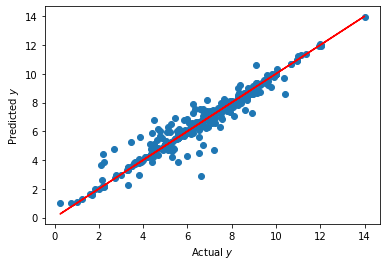

In [198]:
#Average price of apples per kilogram as predicted by an extra trees regression model compared to the actual prices.
plt.scatter(y_test2, y_pred3) # plot the scatter plot.
plt.plot(y_test2, y_test2,"r") # fit a linear model line thought
plt.ylabel("Predicted $y$")
plt.xlabel("Actual $y$")
plt.show()

Make prediction using test data set for submission on Kaggle

In [230]:
#Use the model to make predictions
predicted_prices = etr1.predict(X_test)

Kaggle score etr1: 0.78185


6. AdaBoostRegressor with CatBoost

In [226]:
print("Testing:")
print('MSE:', mean_squared_error(y_te, y_pred2))
print('R_squared:', r2_score(y_te, y_pred2))

Testing:
MSE: 5.756349738162599
R_squared: -0.1648458729303326


Model fitting and evaluation

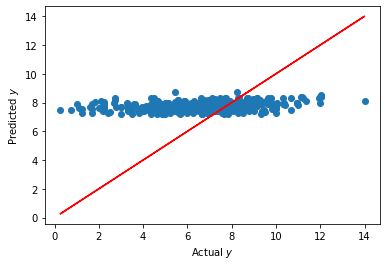

In [227]:
# Average price predicted by a AdaBoosting with a CatBooster. 
plt.scatter(y_te, y_pred2) # We plot a scatter plot the the two variables.
plt.plot(y_te, y_te,"r") # then attempt to fit linear model onto it. 
plt.ylabel("Predicted $y$") 
plt.xlabel("Actual $y$")
plt.show()

Make prediction using test data set for submission on Kaggle

In [229]:
#Use the model to make predictions
predicted_prices = ada1.predict(X_test)

kaggle score boosting_cat: 0.45063


## 11. Conclusion
<a id='conclude'></a>
[Back to table of contents](#toc)

The decision is to go with the StackingRegressor. Few things to consider:
When you use a variety of different model which all make different assumptions about the dataset presented to them The result is a model which has stronger prediction capability then if the models were apart.

A further investigation could have been into feature selection using Back- or Forward stepwise feature selection. Using all the predictors given to us to estimate the price of a kilogram of apples brought us an acceptable result with an root mean squared of about 44c per apple on average as per the Kaggle leaderboard score.    

So after some data cleaning, extensive analysis and hyperparameter tweaking we found our best model to be StackingRegressor.  which was a better score we got compared to other models that we used.

We would suggest further investigation into the predictive relationship between features **High_Price**, **Low_Price**, and **Weight_Kg** as they have the highest correlation with our respinse variable **avg_price_per_kg**.
